<a href="https://colab.research.google.com/github/gawronn91/Fraud_detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## 1.1 Explaining the problem

### 1.1.1 Project scope

Project is solution for "IEEE-CIS Fraud Detection" Competition, which may be found here: <br>
https://www.kaggle.com/competitions/ieee-fraud-detection/overview

IEEE Computational Intelligence Society (IEEE-CIS) wit Vesta corporation are seeking the best solutions for fraud prevention industry.<br>
Thats, why Vesta provided data from their own electronic transaction records to alow competitors build the most efficient model to detect fraud transactions.

### 1.1.2 Data

Provided data consists of 3 sets of data:

<ul>
  <li>Training dataset - provided to train Machine Learning model to properly detect fraud transactions. Consists of:
    <ul>
      <li>train_transaction.csv (590540 rows, 393 columns) - it concerns transactions theirselves. </li>
      <li>train_identity.csv (144233 rows, 40 columns) - it concerns device information, from which transaction were made.</li>
    </ul>
  </li>
  <li>Testing dataset - provided to test previously prepared Machine Learning model. Consists of:
    <ul>
      <li>test_transaction.csv (506691 rows, 392 columns) - it concerns transactions theirselves. There is 1 column less than in test file. It's because lack of binary target variable named 'isFraud'.</li>
      <li>test_identity.csv (141907 rows, 40 columns) - it concerns device information, from which transaction were made.</li>
    </ul>
  </li>
  <li>Submission dataset - It only consists of 506691 rows taking respectively same TransactionID number, as in test_transaction file. It shall be filled with prediced 'isFraud' target variables. After filling those values document shall be uploaded in kaggle website, to get a score.</li>
</ul>

Data is hard to interpret at first glimpse. Mostly because it consists of confidential data, like card details, personal data matters of the transaction, and many others.<br>
That's why data is often split into several columns (for example card columns), encoded to be some int or float number, or have a few categorical variables assigned (for example Product Code).<br>
In later parts of this notebook, I will introduce many variables and explain, how they should be understood.

### 1.1.3 Concept of a Fraud 

There is no definition given during the contest, but we can rely on widely available information. So we can split frauds into:
* Friendly fraud - A transaction cancellation request after the customer makes a purchase
* Offline fraud - When the customer's card is duplicated and a transaction is made in a shop or ATM
* Online fraud - Online transaction with duplicated card information
* Merchant fraud - Item not received by purchaser after successful payment
* Identity stealing - Using someone's ID for conducting online payments
* Data leaks - Preventive blocking of potentially compromised cards
* Unexpected non-payment - Bancruption of a customer with unregulated payments

Unfortunately, it is not only a single fraud division. Those aspects are not standardized and there are plenty of such fraud types, like:
* Card Testing Fraud - When the fraudster illegally obtains one or more credit card numbers. After initial testing, which contains few small transactions, fraudsters can begin making larger purchases
* Account Takeover Fraud - When the fraudster has taken over someone's account
* Interception Fraud - When the fraudster purchases goods using a stolen credit card but avoid certain checks by providing legitimate, matching shipping and billing addresses
* Chargeback Fraud - When a customer purchases a product or service before contacting their credit card company to void the purchase, resulting in a “chargeback.”
* Refund Fraud - A fraudster purchases a product or service using a stolen credit card and then has it refunded onto their credit card.

Another few lists could be placed here, but maybe they will be outdated soon because fraudsters will develop new ways of taking advantage of fraud.<br>
The most important is understanding that there are a lot of fraud types.<br>
So the model gets or gives a plain information about fraud - 0 or 1, but behind the scenes, it must catch all those different fraud types to boost efficiency.<br>
And by all fraud types, I mean all patterns left by fraudsters in the data, which may indicate that a suspicious transaction is a fraud.<br>
For sure all fraud techniques and all fraudsters leave traces, which may be gathered as a pattern. And the main purpose of this kernel is to find those patterns and indicate them.


### 1.1.4 Model purpose

Now the very important question is about the purpose of the model. How to rate the model?<br>
Usually, a good metric is an accuracy - sum of True Negatives and True Positives divided by the number of all observations.<br>
Unfortunately here it won't work due to high class imbalance. Please take look at the plot generated after in this notebook. 

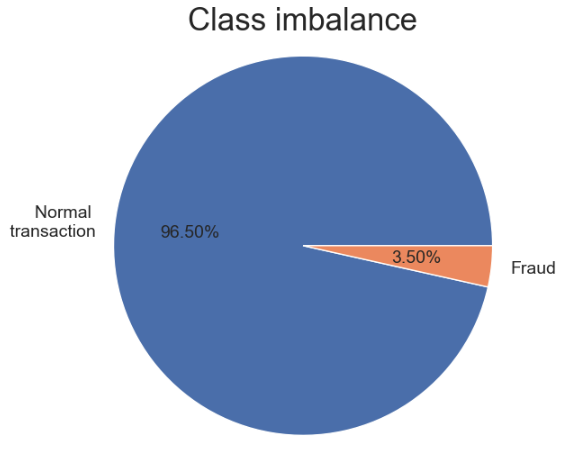

If we used accuracy as an evaluation metric, we could easily obtain 96.5% of accuracy by simply creating a vector full of zeros (non-frauds) with a length of 506691.<br>
Obviously, this solution isn't a point of competition and a project. Some better metrics shall be found to estimate the efficiency of the model.<br>
Those metrics are Precision and Recall:

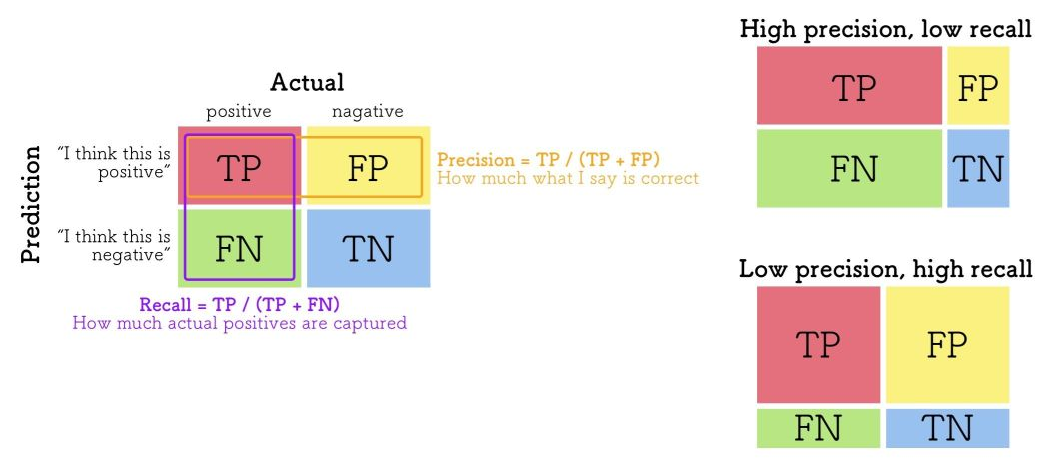

I won't say which one is more useful for this project because any business strategy of Vesta corporation was given.<br><br>
Nevertheless, we can assume that model with high Recall will be very efficient in catching fraudulent transactions.<br>
This approach will be good if our priority is spotting as many frauds as possible.<br>
On the other side, we need to be prepared, so that many normal transactions may be flagged as frauds.<br>
This model would find application when some warning would be needed. For example another level of authentication during a suspicious transaction.<br>

The model with high precision would spot fewer actual frauds, but it would also have a small portion of False Positives here.<br>
So only a very small portion of normal transactions would be marked as frauds.<br>
This application would be useful if we want to block spotted transaction immediately when it is detected.<br>
Take note, that in this case, some fraud transactions would be unspotted.<br>

As mentioned above, there is no perfect metric for the electronic fraud problem.<br>
But we can assume, that we would be interested in models with a high ratio of both - Precision and Recall. Unfortunately sometimes it is impossible.<br>
Nevertheless, we need to remember, that model needs to be balanced. Both approaches have also disadvantages.<br>
So the good approach would be to choose Precision or Recall, which would be a priority. But also keep a high F-score.<br>
F-score is a harmonic mean of Precision and Recall. So a model with one of them on a significantly high level in addition to a high F-score would be satisfying.<br>

### 1.1.5 Project Navigation

The project consists of 4 independent documents named as follows:
1. EDA (Exploratory Data Analysis) - Current document, whose purpose is to understand the data, generate plots to indicate dependencies, and add or change input features to make the model more efficient in detecting fraud transactions
2. CV (Cross Validation) - document, which uses a Machine Learning model to estimate the most efficient Cross Validation method for our dataset. Link for the notebook: [CV](https://drive.google.com/file/d/10iux2mGq0aV49RCueW32Jsa4Q0PtwGQT/view?usp=share_link)
3. FS (Feature Selection) - this document consists of a Machine Learning model, which uses chosen Cross Validation method to estimate a set of features, which have the actual influence for detecting fraud transactions. Link for the notebook: [FS](https://drive.google.com/file/d/1vPB3qOO_ZgsDNJkbP3gkobQT61IoH99r/view?usp=share_link)
4. Model - in this document comparison between several Machine Learning models is made. In the end, there is an analysis of the best-performing model and its results. Link for the notebook: [Model](https://drive.google.com/file/d/19JiAq5irqbGGru1tODVDQuKqRat23zX5/view?usp=sharing)

## 1.2 Importing Necessary Libraries

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np

# Math
import math

#DateTime
from datetime import datetime
from datetime import timedelta

# Data Visualization
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, KFold, GroupKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, recall_score, fbeta_score, confusion_matrix, plot_confusion_matrix, precision_recall_curve, accuracy_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import lightgbm as lgb

# Dimension reduction
from sklearn.decomposition import PCA

#Feature selection
from boruta import BorutaPy

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_theme(style="white")

fill_nan = -999

# 2. Data Loading, Understanding, and Cleaning

## 2.1 Memory reduction and data load

Since the data is big in size, we will use function to reduce its memory for fast processing and consuming less storage.

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

### 2.1.1 Loading the train data:

In [ ]:
# train_transaction table
train_transaction = pd.read_csv('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/train_transaction.csv', index_col='TransactionID')
print(train_transaction.shape)
train_transaction = reduce_mem_usage(train_transaction)


# train_identity table
train_identity = pd.read_csv('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/train_identity.csv', index_col='TransactionID')
print(train_identity.shape)
train_identity = reduce_mem_usage(train_identity)


# Merging the data
train_df = pd.merge(train_transaction, train_identity, how='left', left_index=True, right_index=True)
print(train_df.shape)
len_train_df = len(train_df)
train_df.name = 'Train'
del train_transaction, train_identity

train_df.head()

(590540, 393)
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 489.41 MB
Decreased by 72.4%
(144233, 40)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.55 MB
Decreased by 76.6%
(590540, 433)


isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400            68.5         W  13926    NaN   
2987001              0          86401            29.0         W   2755  404.0   
2987002              0          86469            59.0         W   4663  490.0   
2987003              0          86499            50.0         W  18132  567.0   
2987004              0          86506            50.0         H   4497  514.0   

               card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
TransactionID                                                                 
2987000        150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
2987001        150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2987002        150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
2987003        150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
2987004        150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

              P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
TransactionID                                                                  
2987000                 NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2987001           gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2987002         outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2987003           yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
2987004           gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   

                C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4  \
TransactionID                                                                 
2987000        0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN   
2987001        0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0   
2987002        0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0   
2987003        0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0   
2987004        1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN   

                D5  D6  D7  D8  D9   D10    D11  D12  D13  D14    D15   M1  \
TransactionID                                                                
2987000        NaN NaN NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T   
2987001        NaN NaN NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN   
2987002        NaN NaN NaN NaN NaN   0.0  315.0  NaN  NaN  NaN  315.0    T   
2987003        0.0 NaN NaN NaN NaN  84.0    NaN  NaN  NaN  NaN  111.0  NaN   
2987004        NaN NaN NaN NaN NaN   NaN    NaN  NaN  NaN  NaN    NaN  NaN   

                M2   M3   M4   M5   M6   M7   M8   M9   V1   V2   V3   V4  \
TransactionID                                                               
2987000          T    T   M2    F    T  NaN  NaN  NaN  1.0  1.0  1.0  1.0   
2987001        NaN  NaN   M0    T    T  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2987002          T    T   M0    F    F    F    F    F  1.0  1.0  1.0  1.0   
2987003        NaN  NaN   M0    T    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2987004        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  \
TransactionID                                                               
2987000        1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
2987001        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0  0.0   
2987002        1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
2987003        NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0   
2987004        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

               V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  \
TransactionID                                                             

### 2.1.2 Loading the test data:

In [ ]:
# test_transaction table
test_transaction = pd.read_csv('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/test_transaction.csv', index_col='TransactionID')
print(test_transaction.shape)
test_transaction = reduce_mem_usage(test_transaction)


# test_identity table
test_identity = pd.read_csv('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/train_identity.csv', index_col='TransactionID')
print(test_identity.shape)
test_identity = reduce_mem_usage(test_identity)


# Merging the data
test_df = pd.merge(test_transaction, test_identity, how='left', left_index=True, right_index=True)
print(test_df.shape)
test_df.name= 'Test'
del test_transaction, test_identity

test_df.head()

(506691, 392)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 427.17 MB
Decreased by 71.9%
(144233, 40)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.55 MB
Decreased by 76.6%
(506691, 432)


TransactionDT  TransactionAmt ProductCD  card1  card2  card3  \
TransactionID                                                                 
3663549             18403224       31.953125         W  10409  111.0  150.0   
3663550             18403263       49.000000         W   4272  111.0  150.0   
3663551             18403310      171.000000         W   4476  574.0  150.0   
3663552             18403310      285.000000         W  10989  360.0  150.0   
3663553             18403317       67.937500         W  18018  452.0  150.0   

                    card4  card5  card6  addr1  addr2   dist1  dist2  \
TransactionID                                                          
3663549              visa  226.0  debit  170.0   87.0     1.0    NaN   
3663550              visa  226.0  debit  299.0   87.0     4.0    NaN   
3663551              visa  226.0  debit  472.0   87.0  2636.0    NaN   
3663552              visa  166.0  debit  205.0   87.0    17.0    NaN   
3663553        mastercard  117.0  debit  264.0   87.0     6.0    NaN   

              P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
TransactionID                                                                  
3663549           gmail.com           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0   
3663550             aol.com           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0   
3663551         hotmail.com           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0   
3663552           gmail.com           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0   
3663553           gmail.com           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0   

                C8   C9  C10  C11  C12    C13  C14     D1     D2    D3     D4  \
TransactionID                                                                   
3663549        0.0  6.0  0.0  5.0  1.0  115.0  6.0  419.0  419.0  27.0  398.0   
3663550        0.0  2.0  0.0  1.0  1.0   12.0  2.0  149.0  149.0   7.0  634.0   
3663551        0.0  4.0  0.0  2.0  0.0   22.0  2.0  137.0  137.0  10.0   97.0   
3663552        0.0  2.0  0.0  2.0  0.0    7.0  4.0   42.0   42.0  41.0  242.0   
3663553        0.0  5.0  0.0  6.0  0.0   14.0  6.0   22.0   22.0   0.0   22.0   

                 D5  D6  D7  D8  D9    D10    D11  D12  D13  D14    D15 M1 M2  \
TransactionID                                                                   
3663549        27.0 NaN NaN NaN NaN  418.0  203.0  NaN  NaN  NaN  409.0  T  T   
3663550         7.0 NaN NaN NaN NaN  231.0  634.0  NaN  NaN  NaN  634.0  T  F   
3663551        10.0 NaN NaN NaN NaN  136.0  136.0  NaN  NaN  NaN   97.0  T  T   
3663552        41.0 NaN NaN NaN NaN  242.0  242.0  NaN  NaN  NaN  242.0  T  T   
3663553         0.0 NaN NaN NaN NaN   22.0   22.0  NaN  NaN  NaN   22.0  T  T   

              M3   M4   M5 M6   M7   M8   M9   V1   V2   V3   V4   V5   V6  \
TransactionID                                                                
3663549        F  NaN  NaN  F    T    T    T  1.0  1.0  1.0  1.0  1.0  1.0   
3663550        F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0   
3663551        F   M0    F  F    F    F    F  1.0  1.0  1.0  1.0  1.0  1.0   
3663552        T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0   
3663553        T  NaN  NaN  F    F    T    T  1.0  1.0  1.0  1.0  1.0  1.0   

                V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
TransactionID                                                               
3663549        1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3663550        1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3663551        1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3663552        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3663553        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

               V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
TransactionID                                                               
3663549        0.0

## 2.2 List of columns based on their type

In [ ]:
data_types = ['int8', 'int16', 'int32', 'float16', 'float32', 'category']
for dt in data_types:
    print('{} columns: '.format(dt), list(train_df.columns[train_df.dtypes == dt]), sep='\n', end='\n\n')

int8 columns: 
['isFraud']

int16 columns: 
['card1']

int32 columns: 
['TransactionDT']

float16 columns: 
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91

# 3. Imbalance of dataset

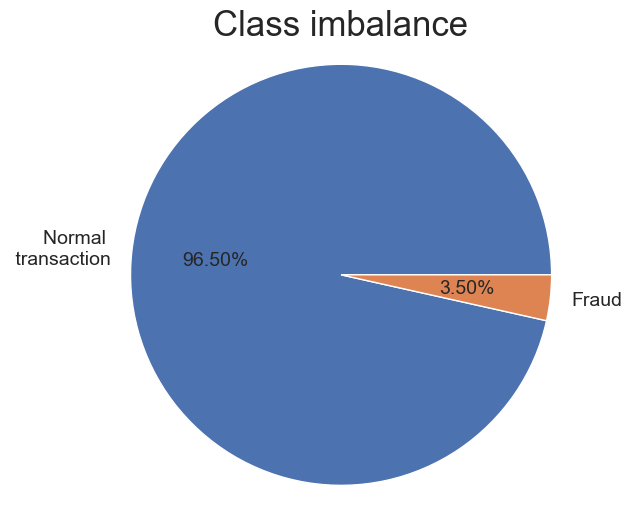

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(train_df.isFraud.value_counts(), labels=['Normal \n transaction', 'Fraud'], autopct='%.2f%%', textprops={'fontsize': 14})
plt.axis('equal')
plt.title("Class imbalance", size=25)
#plt.lab
plt.show()

It was easy to notice that there is some imbalance in the dataset. The plot above shows that this imbalance is in the 1:27 ratio.<br>
That means that some technique of dealing with imbalanced data (SMOTE or undersampling) shall be used.<br>
A good solution here could be using an algorithm, which deals with imbalanced datasets, like XGBoost.

# 4. Key Variables

## 4.1 TransactionDT (Date/Time)

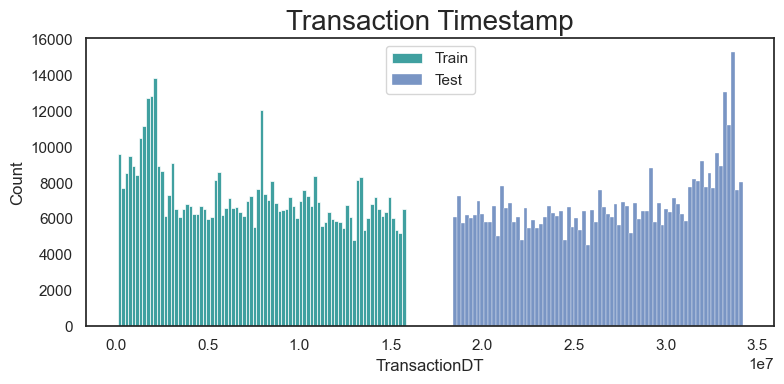

In [ ]:
# Timestamp of train and test data
plt.figure(figsize=(8, 4))

sns.histplot(train_df['TransactionDT'], label='Train',color="teal")
sns.histplot(test_df['TransactionDT'], label='Test')

plt.title('Transaction Timestamp', size = 20)
plt.legend()
plt.tight_layout()
plt.show()

The plot above explains that the train and test datasets are split by time with a small gap between them. TransactionDT values start with 86400, which corresponds with the number of seconds in a day. <br>
The last value of the test dataset is 34214345 and it corresponds to a day, which is over one year after the first record. It means that we are dealing here with data gathered for a settled period of time.

Some research helped to gather the unofficial date of the first transaction. And it is 2017-12-01.<br>
This information can be used to make this plot a little bit more clear.

In [ ]:
def time_columns(df, startdate):
    timedelta = pd.to_timedelta(df['TransactionDT'], unit='s')
    df['TransactionMinute'] = (timedelta.dt.components.minutes).astype(int)
    df['TransactionHour'] = (timedelta.dt.components.hours).astype(int)
    df['TransactionDay'] = (timedelta.dt.components.days).astype(int)
    df['TransactionWeekDay'] = pd.to_datetime(df['TransactionDT'],unit='s').dt.weekday
    df['TransactionDTMonth'] = pd.to_datetime(startdate + timedelta,unit='s').dt.month
    df['TransactionDT_old'] = df['TransactionDT']
    df['TransactionDT'] = startdate + timedelta

Code here changes the TransactionDT column and creates columns responsible for day, hour, and minute of transactions.

In [ ]:
startdate = datetime.strptime('2017-12-01', '%Y-%m-%d')
time_columns(train_df, startdate)
time_columns(test_df, startdate)

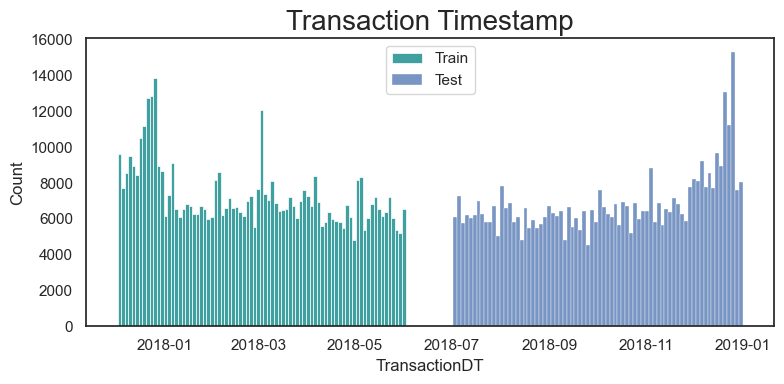

In [ ]:
# Timestamp of train and test data
plt.figure(figsize=(8, 4))

sns.histplot(train_df['TransactionDT'], label='Train',color="teal")
sns.histplot(test_df['TransactionDT'], label='Test')

plt.title('Transaction Timestamp', size = 20)
plt.legend()
plt.tight_layout()
plt.show()

The plot above seems to give a little bit more information about time in our dataset.

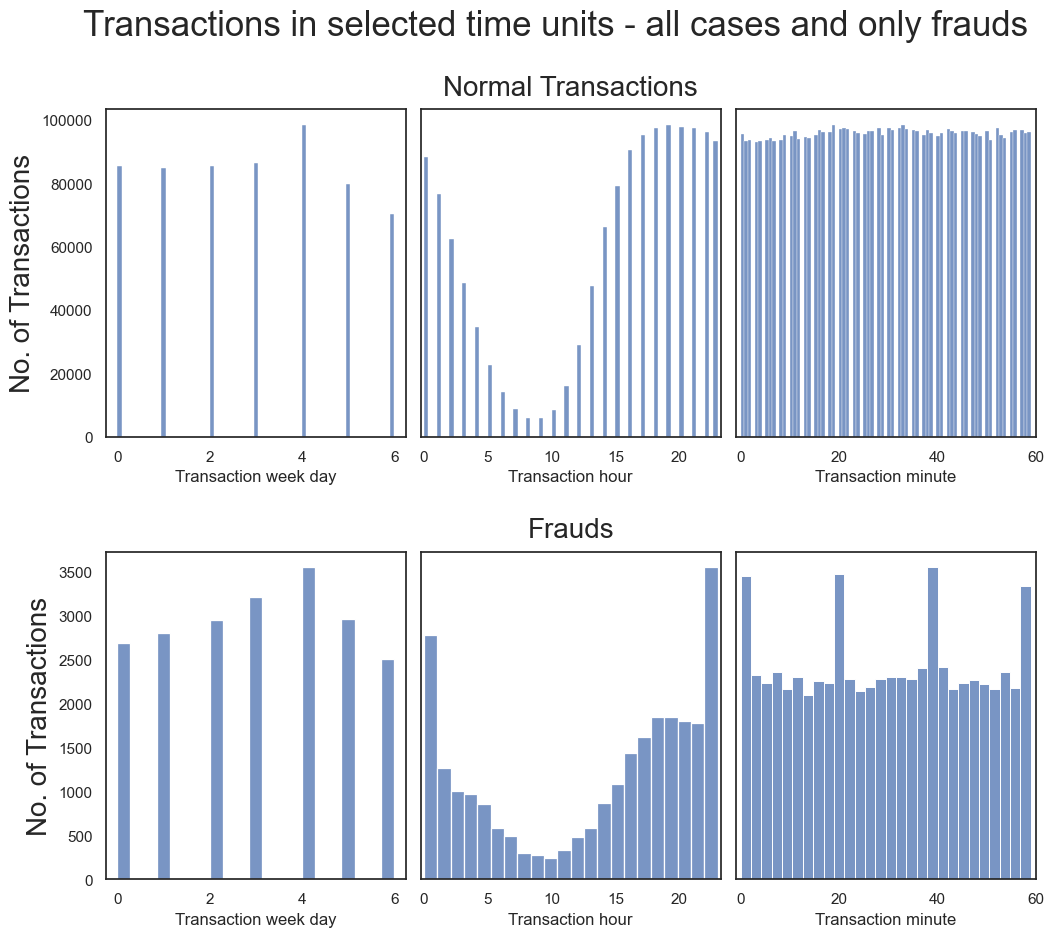

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))

plt.suptitle('Transactions in selected time units - all cases and only frauds', size=25)
plt.subplots_adjust(wspace=0.05, hspace=0.35)

sns.histplot(train_df['TransactionWeekDay'], ax=ax[0, 0])
ax[0, 0].set_xlabel('Transaction week day')
ax[0, 0].set_ylabel('No. of Transactions', size = 20)
ax[0, 0].set_xlim(-0.25, 6.25)

sns.histplot(train_df['TransactionHour'], ax=ax[0, 1])
ax[0, 1].set_xlabel('Transaction hour')
ax[0, 1].set_ylabel('')
ax[0, 1].set_xlim(-0.25, 23.25)
ax[0, 1].set_yticks([])
ax[0, 1].set_title('Normal Transactions', size = 20, pad=10)

sns.histplot(train_df['TransactionMinute'], ax=ax[0, 2])
ax[0, 2].set_xlabel('Transaction minute')
ax[0, 2].set_ylabel('')
ax[0, 2].set_xlim(-1, 60)
ax[0, 2].set_yticks([])

sns.histplot(train_df[train_df["isFraud"]==1]['TransactionWeekDay'], ax=ax[1, 0])
ax[1, 0].set_xlabel('Transaction week day')
ax[1, 0].set_ylabel('No. of Transactions', size = 20)
ax[1, 0].set_xlim(-0.25, 6.25)

sns.histplot(train_df[train_df["isFraud"]==1]['TransactionHour'], ax=ax[1, 1])
ax[1, 1].set_xlabel('Transaction hour')
ax[1, 1].set_ylabel('')
ax[1, 1].set_xlim(-0.25, 23.25)
ax[1, 1].set_yticks([])
ax[1, 1].set_title('Frauds', size = 20, pad=10)

sns.histplot(train_df[train_df["isFraud"]==1]['TransactionMinute'], ax=ax[1, 2])
ax[1, 2].set_xlabel('Transaction minute')
ax[1, 2].set_ylabel('')
ax[1, 2].set_xlim(-1, 60)
ax[1, 2].set_yticks([])

plt.show()

The plot above gives us information, that Transaction on weekday, hour and minute may be useful in predicting fraud.<br>
Transaction day or month could be useful, but our data is from only one year. No days or months will be repeated here, so it will be impossible to catch any pattern.<br>
As the data is gathered over a year - days will not be repeated. So this value will not be used.

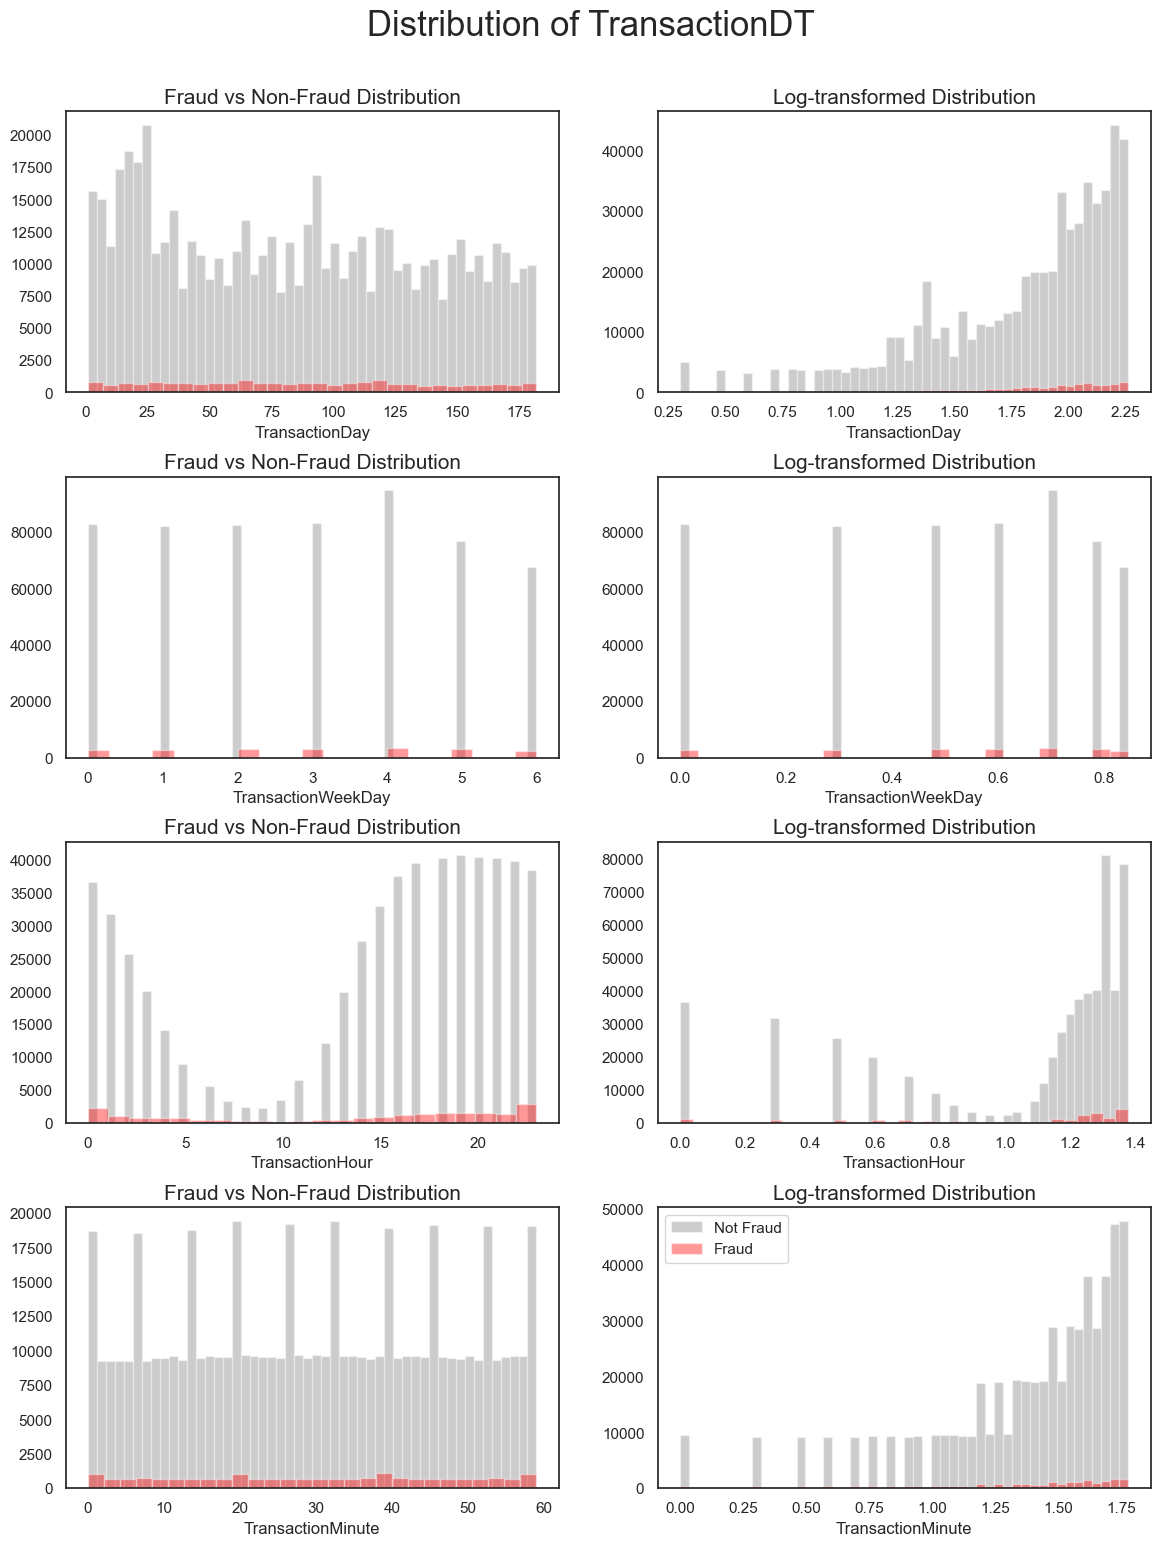

In [ ]:
time_cols = ['TransactionDay', 'TransactionWeekDay', 'TransactionHour', 'TransactionMinute']

fig, ax = plt.subplots(len(time_cols), 2, figsize=(14, 17))

plt.suptitle('Distribution of TransactionDT', size=25)
plt.subplots_adjust(hspace=0.3, top=0.92)

for i, col in enumerate(time_cols):
    sns.distplot(train_df[train_df['isFraud'] == 0][col], color = 'grey', kde= False, label = 'Not Fraud', ax=ax[i, 0])
    sns.distplot(train_df[train_df['isFraud'] == 1][col], color = 'red', kde= False , label = 'Fraud', ax=ax[i, 0])
    ax[i, 0].set_title('Fraud vs Non-Fraud Distribution', fontsize = 15)

    sns.distplot(np.log10(train_df[train_df['isFraud'] == 0][col] + 1), color = 'grey', kde= False, label = 'Not Fraud', ax=ax[i, 1])
    sns.distplot(np.log10(train_df[train_df['isFraud'] == 1][col] + 1), color = 'red', kde= False , label = 'Fraud', ax=ax[i, 1])
    ax[i, 1].set_title('Log-transformed Distribution', fontsize = 15)
    
plt.legend()
plt.show()

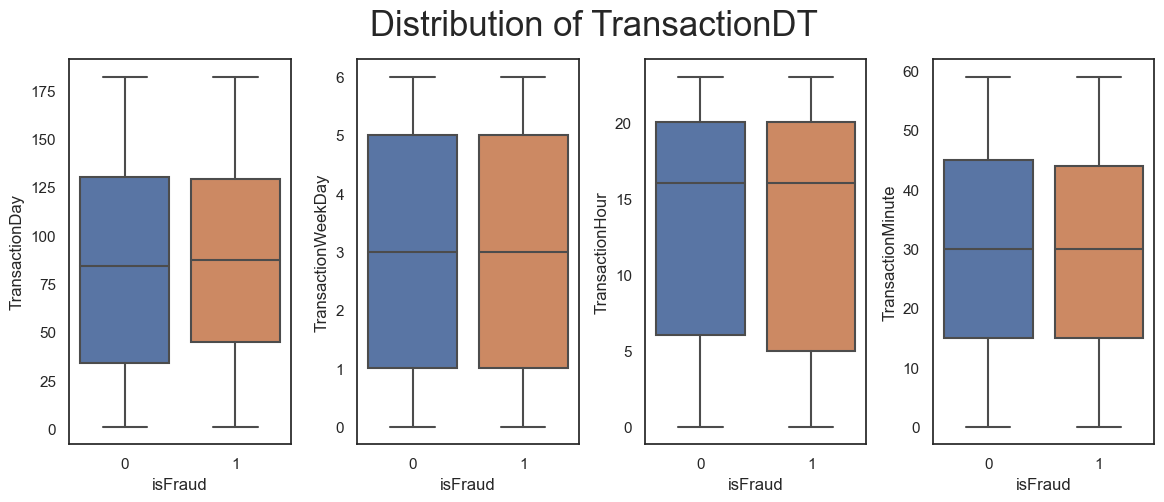

In [ ]:
fig, ax = plt.subplots(1, len(time_cols), figsize=(14, 5))

plt.suptitle('Distribution of TransactionDT', size=25)
plt.subplots_adjust(wspace=0.3)

for i, col in enumerate(time_cols):
    sns.boxplot(x = 'isFraud', y = col, data = train_df, ax=ax[i])
    
plt.show()

The plots above give some answers about the time factor in our data. There are slight differences between frauds and normal transactions here.<br> 
Those differences may be seen in regular data and logs of data

## 4.2 Transaction Amount

In [ ]:
#Feature engineering to a better visualization of the values
train_df['TransactionAmt_log'] = np.log(train_df.TransactionAmt)

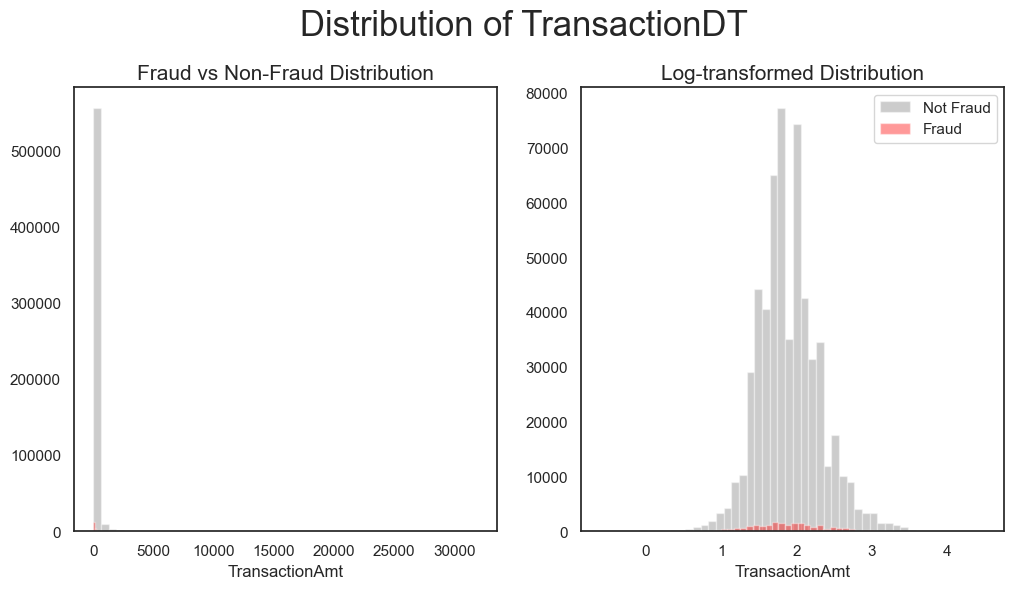

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Distribution of TransactionDT', size=25)
plt.subplots_adjust(hspace=0.2, top=0.85)

sns.distplot(train_df[train_df['isFraud'] == 0]['TransactionAmt'], color = 'grey', kde= False, label = 'Not Fraud', ax=ax[0])
sns.distplot(train_df[train_df['isFraud'] == 1]['TransactionAmt'], color = 'red', kde= False , label = 'Fraud', ax=ax[0])
ax[0].set_title('Fraud vs Non-Fraud Distribution', fontsize = 15)

sns.distplot(np.log10(train_df[train_df['isFraud'] == 0]['TransactionAmt']), color = 'grey', kde= False, label = 'Not Fraud', ax=ax[1])
sns.distplot(np.log10(train_df[train_df['isFraud'] == 1]['TransactionAmt']), color = 'red', kde= False , label = 'Fraud', ax=ax[1])
ax[1].set_title('Log-transformed Distribution', fontsize = 15)
    
plt.legend()
plt.show()

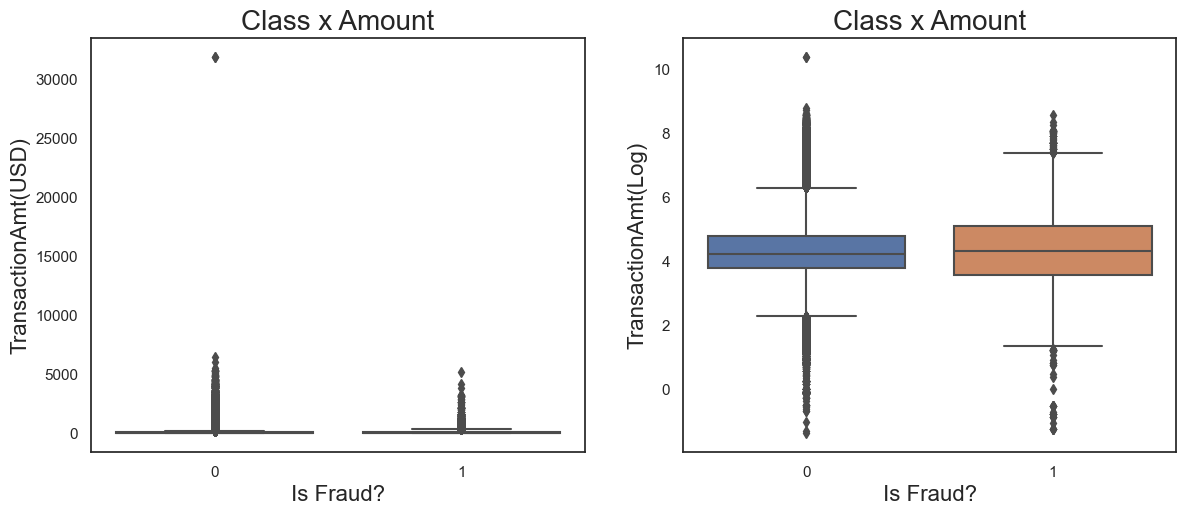

In [ ]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="isFraud",y="TransactionAmt",
                 data=train_df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("TransactionAmt(USD)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="isFraud",y="TransactionAmt_log", data=train_df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("TransactionAmt(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

The plots above show that analysis based on the regular Transaction amount factor may not be the best option. Much better insight will be achieved by using the logarithm of that value.

In [ ]:
price_range = pd.cut(train_df["TransactionAmt"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, train_df["TransactionAmt"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140-160", "160-180", "180-200", "220+"])
train_df["TransactionAmtRange"] = price_range 
test_df["TransactionAmtRange"] = price_range 

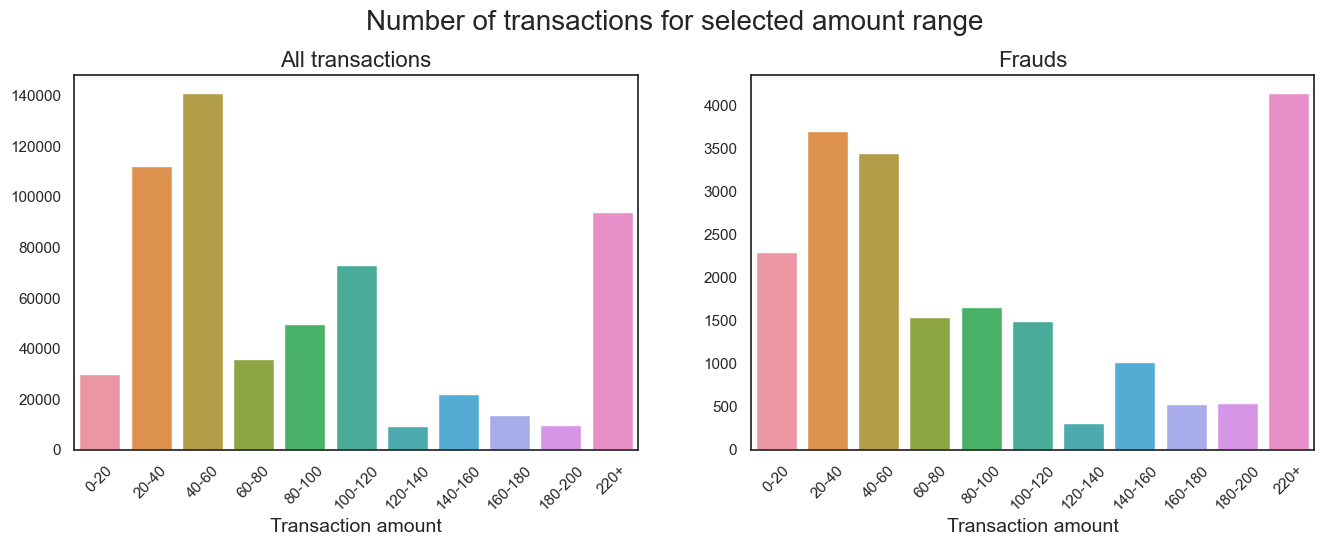

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.suptitle('Number of transactions for selected amount range', size=20)
plt.subplots_adjust(top=0.85, bottom=0.1, wspace=0.2)

#Here we get the data
plt_data = train_df["TransactionAmtRange"].value_counts().sort_index()
plt_data_F = train_df[train_df["isFraud"]==1]["TransactionAmtRange"].value_counts().sort_index()

plt_vals = plt_data.values
plt_idx = plt_data.index
plt_vals_F = plt_data_F.values
plt_idx_F = plt_data_F.index

#sns.set_style("dark")
#sns.set()
sns.barplot(plt_idx, plt_vals, ax=ax[0])
ax[0].set_xlabel('Transaction amount', size=14)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title('All transactions', size = 16)

#sns.set_theme()
sns.barplot(plt_idx_F, plt_vals_F, ax=ax[1])
ax[1].set_xlabel('Transaction amount', size=14)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Frauds', size = 16)



plt.show()

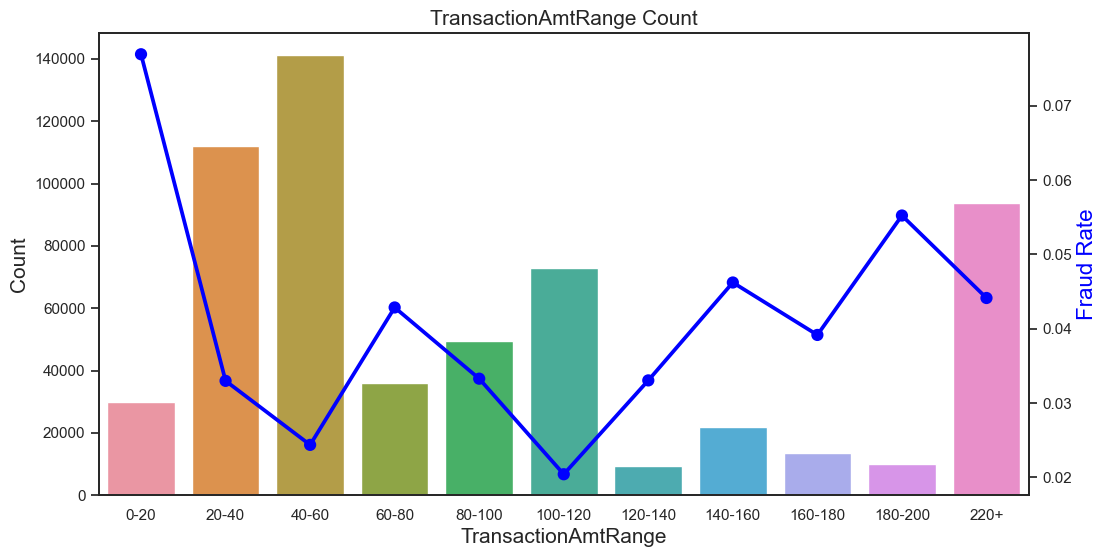

In [ ]:

variable_fraud_rate = train_df.groupby('TransactionAmtRange')['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]
        
plt.figure(figsize=(12,6))

g = sns.countplot(x = 'TransactionAmtRange', data = train_df, order = variable_fraud_rate.index)
g.set_title('{} Count'.format('TransactionAmtRange'), fontsize = 15)
g.set_xlabel("{}".format('TransactionAmtRange'), fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.xticks(rotation = 'horizontal')

r = g.twinx()
r = sns.pointplot(x = list(variable_fraud_rate.index), y = variable_fraud_rate, color = "blue")
r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")

plt.show()

This plot gives information that splitting transaction amounts into independent bins may introduce some insight.<br> 
There is a significant difference in fraud rate between different ranges. Nevertheless, it never crosses 8%.

## 4.3 Card features

In [ ]:
card_columns = train_df.loc[:,'card1':'card6'].columns

In [ ]:
pd.DataFrame(train_df.loc[:,card_columns].nunique()).rename(columns={0: 'unique_values'})

unique_values
card1          13553
card2            500
card3            114
card4              4
card5            119
card6              4

Card 1 contains 8499 unique values. So this parameter may be the ID of the card (or a part of the ID, which occurred to be a fact). Card 2, 3, and 5 have much fewer unique values, so they could be a card expiration date or other parameters.<br>
We may look at patterns generated by the encryption algorithm.

Card 4 and 6 are categorical, transparent columns with information about card issuers and the type of card.

In [ ]:
def numerical_plots(df, column):

    train_df['{}_log'.format(column)] = np.log(train_df[column])
    fig, ax = plt.subplots(2, 2, figsize=(12, 11))

    plt.suptitle('Distribution of {}'.format(column), size=25)
    plt.subplots_adjust(hspace=0.25, top=0.9)

    sns.distplot(df[df['isFraud'] == 0][column], color = 'grey', kde= False, label = 'Not Fraud', ax=ax[0, 0])
    sns.distplot(df[df['isFraud'] == 1][column], color = 'red', kde= False , label = 'Fraud', ax=ax[0, 0])
    ax[0, 0].set_title('Fraud vs Non-Fraud Distribution', fontsize = 15)
    ax[0, 0].legend()

    sns.distplot(np.log10(df[df['isFraud'] == 0][column]+1), color = 'grey', kde= False, label = 'Not Fraud', ax=ax[0, 1])
    sns.distplot(np.log10(df[df['isFraud'] == 1][column]+1), color = 'red', kde= False , label = 'Fraud', ax=ax[0, 1])
    ax[0, 1].set_title('Log-transformed Distribution', fontsize = 15)
    
    sns.boxplot(x ="isFraud",y=column, data=df, ax=ax[1, 0])
    ax[1, 0].set_title("Class x Amount", fontsize=20)
    ax[1, 0].set_xlabel("Is Fraud?", fontsize=16)
    ax[1, 0].set_ylabel(column, fontsize = 16)

    sns.boxplot(x ="isFraud",y='{}_log'.format(column), data=df, ax=ax[1, 1])
    ax[1, 1].set_title("Class x Amount", fontsize=20)
    ax[1, 1].set_xlabel("Is Fraud?", fontsize=16)
    ax[1, 1].set_ylabel("{}(Log)".format(column), fontsize = 16)


    plt.show()

In [ ]:
train_df_cat = train_df.filter(regex='id|card|ProductCD|addr|email|M|DeviceType|DeviceInfo')

### 4.3.1 Card 1

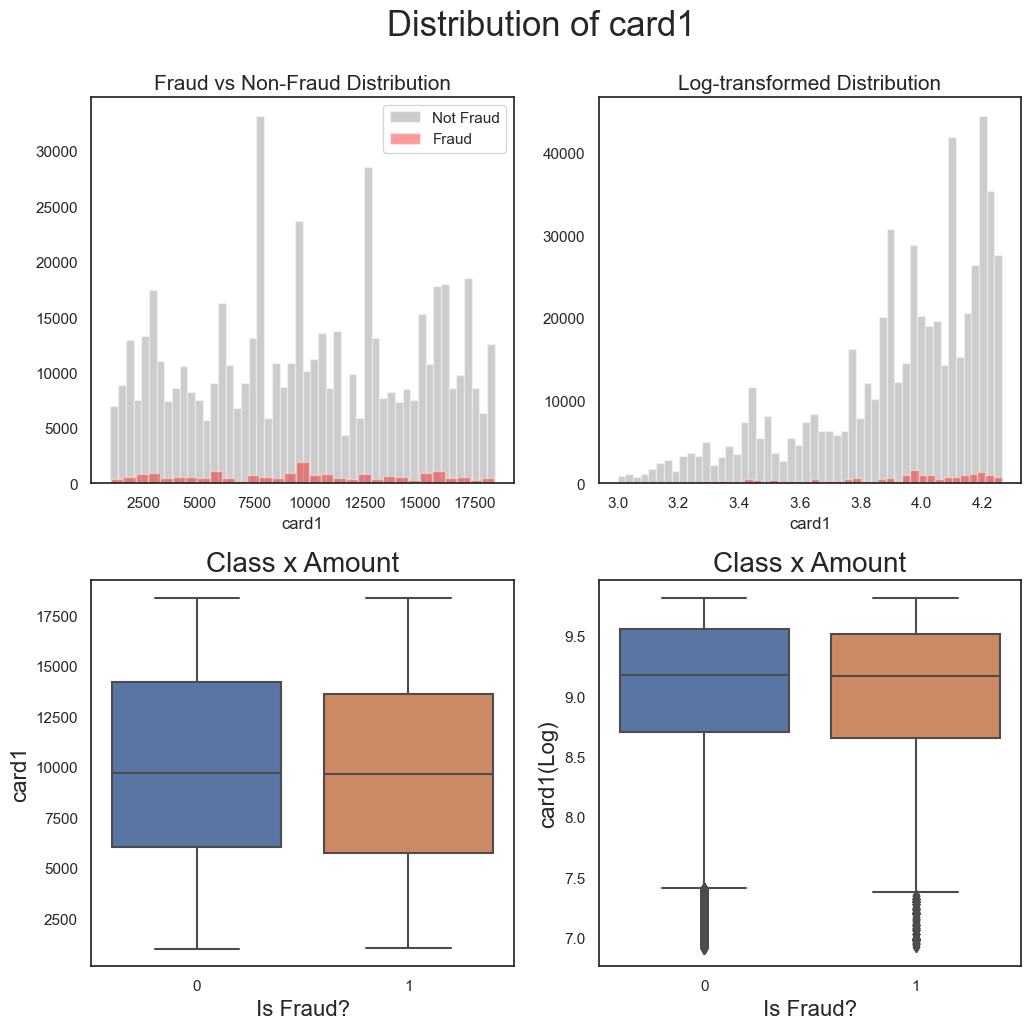

In [ ]:
numerical_plots(df=train_df, column='card1')

Card1 variable with its 13553 unique values, no nulls, and such distribution shall be part of the identity factor (like encoded first 4 digits of card number).<br>
This factor won't say much alone, but maybe when joined with another column will give information about the card (or purchaser) ID.

### 4.3.2 Card 2

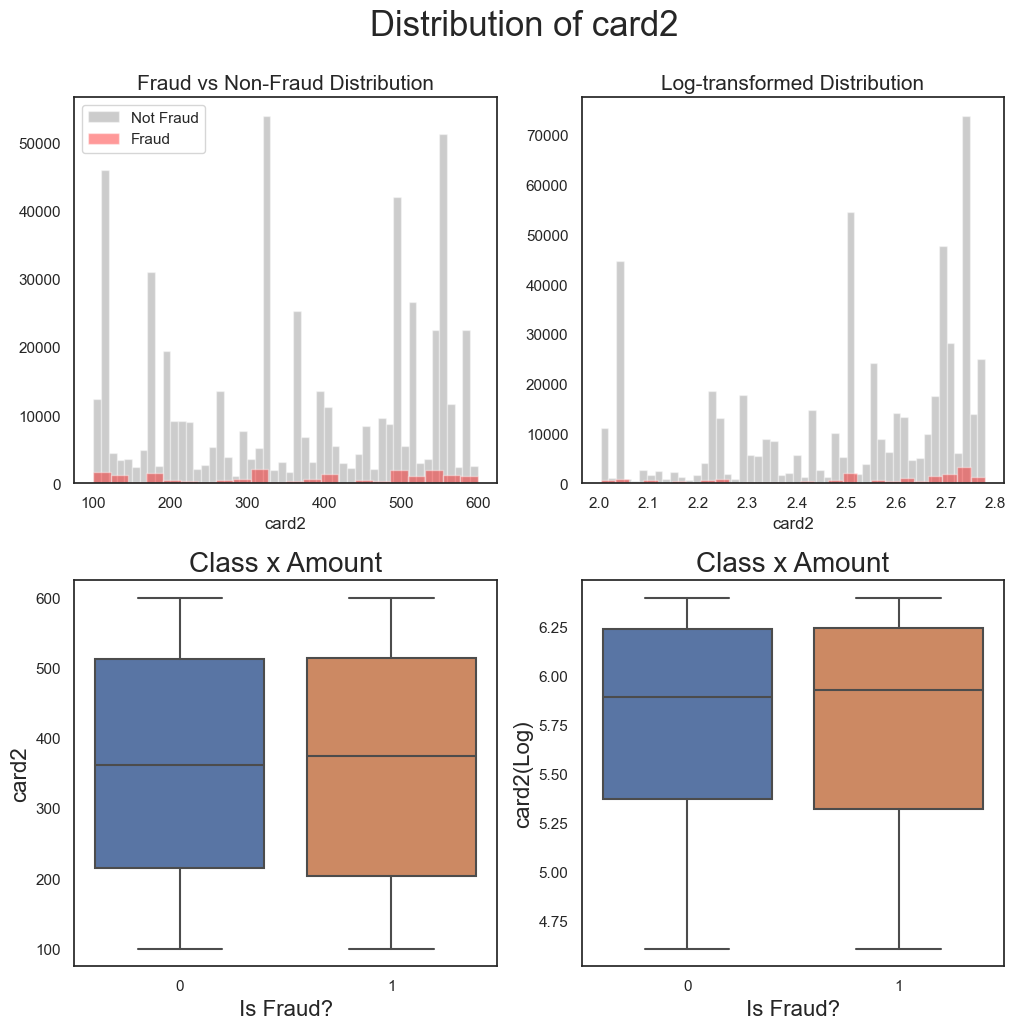

In [ ]:
numerical_plots(df=train_df, column='card2')

The basic column alone seems to be a weak estimator, but maybe in comparison with another column, it will have a better use.

### 4.3.3 Card 3

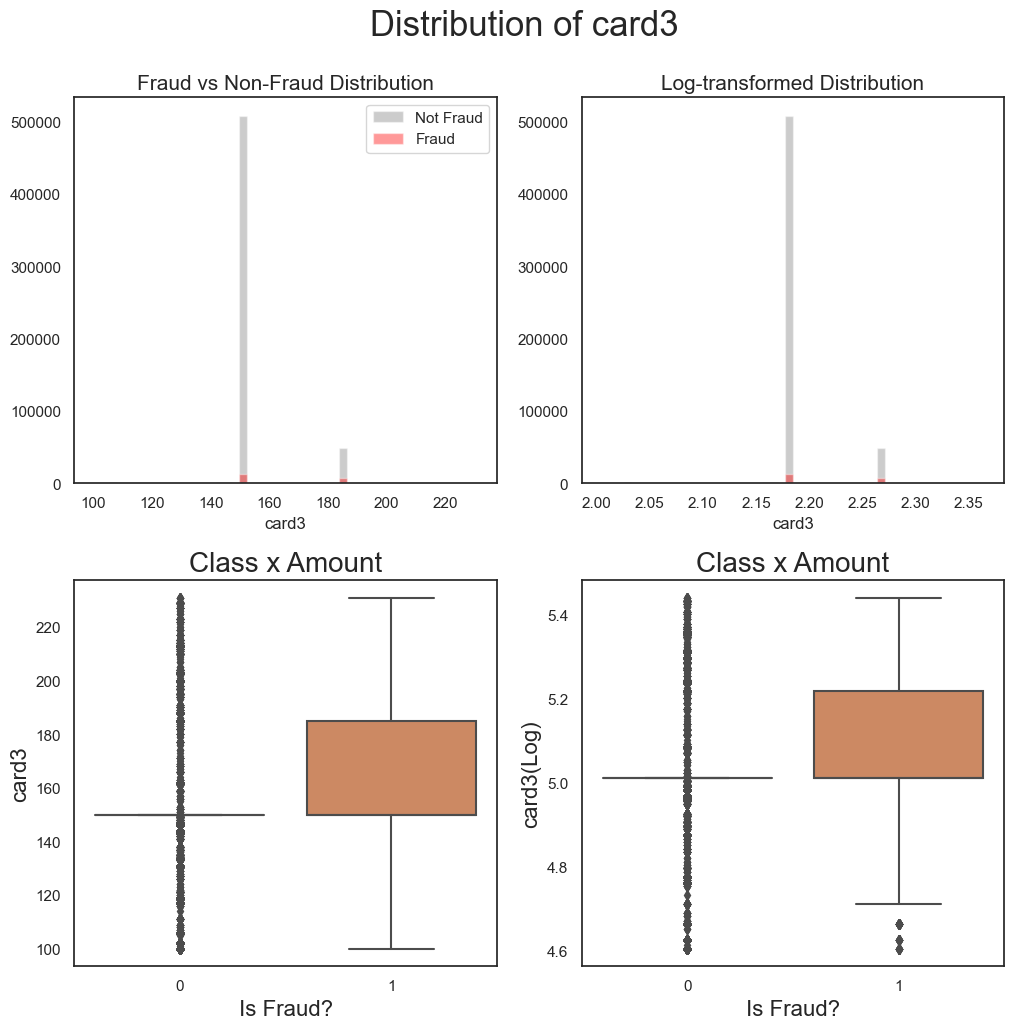

In [ ]:
numerical_plots(df=train_df, column='card3')

The basic column alone seems to be a good estimator.

### 4.3.4 Card 4

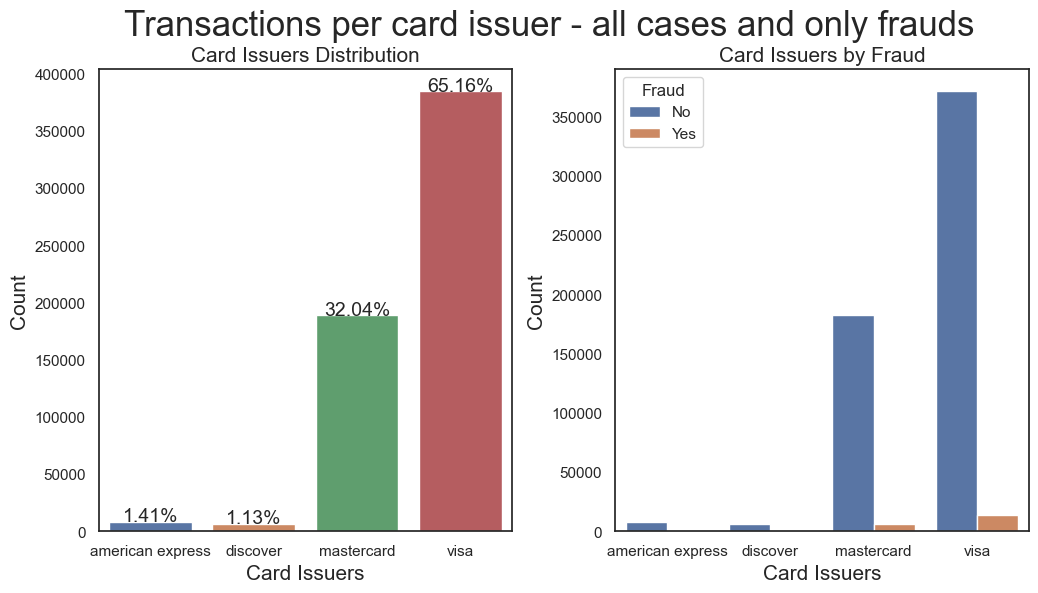

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Transactions per card issuer - all cases and only frauds', size=25)
plt.subplots_adjust(wspace=0.25, hspace=0.25)


sns.countplot(x = 'card4', data = train_df_cat, ax=ax[0])
ax[0].set_title('Card Issuers Distribution', fontsize = 15)
ax[0].set_xlabel("Card Issuers", fontsize=15)
ax[0].set_ylabel("Count", fontsize=15)
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train_df_cat)*100),
            ha="center", fontsize=14) 

sns.countplot(x='card4', hue='isFraud', data=train_df, ax=ax[1])
ax[1].set_title('Card Issuers by Fraud', fontsize = 15)
ax[1].set_xlabel("Card Issuers", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)

plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

plt.show()

From this plot, we may only say that visa is the most popular card type and has the most fraud cases. The second one is MasterCard.<br>
American express and discover have over 1% of transactions.

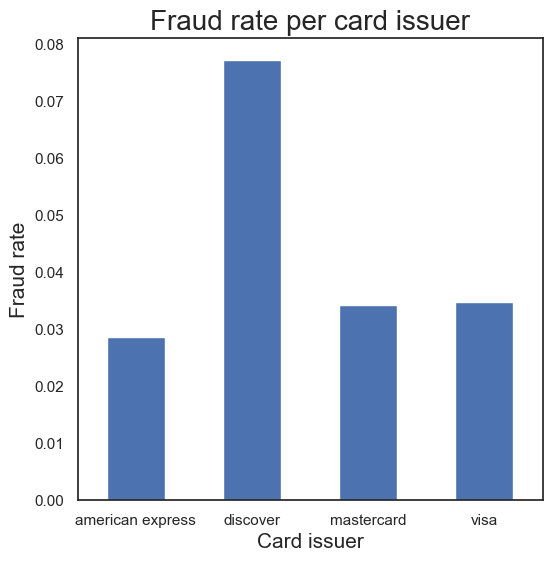

In [ ]:
plt.figure(figsize=(6, 6))

train_df.groupby('card4')['isFraud'].value_counts(normalize = True)[:, 1].plot.bar()
plt.title('Fraud rate per card issuer', size=20)
plt.tick_params(axis='x', labelrotation=0)
plt.ylabel("Fraud rate", fontsize=15)
plt.xlabel("Card issuer", fontsize=15)

plt.show()

This plot gives information about rate of fraud transactions. All issuers have fraud rate at level of 3%, but discover have almost 8% fraud rate!

### 4.3.5 Card 5

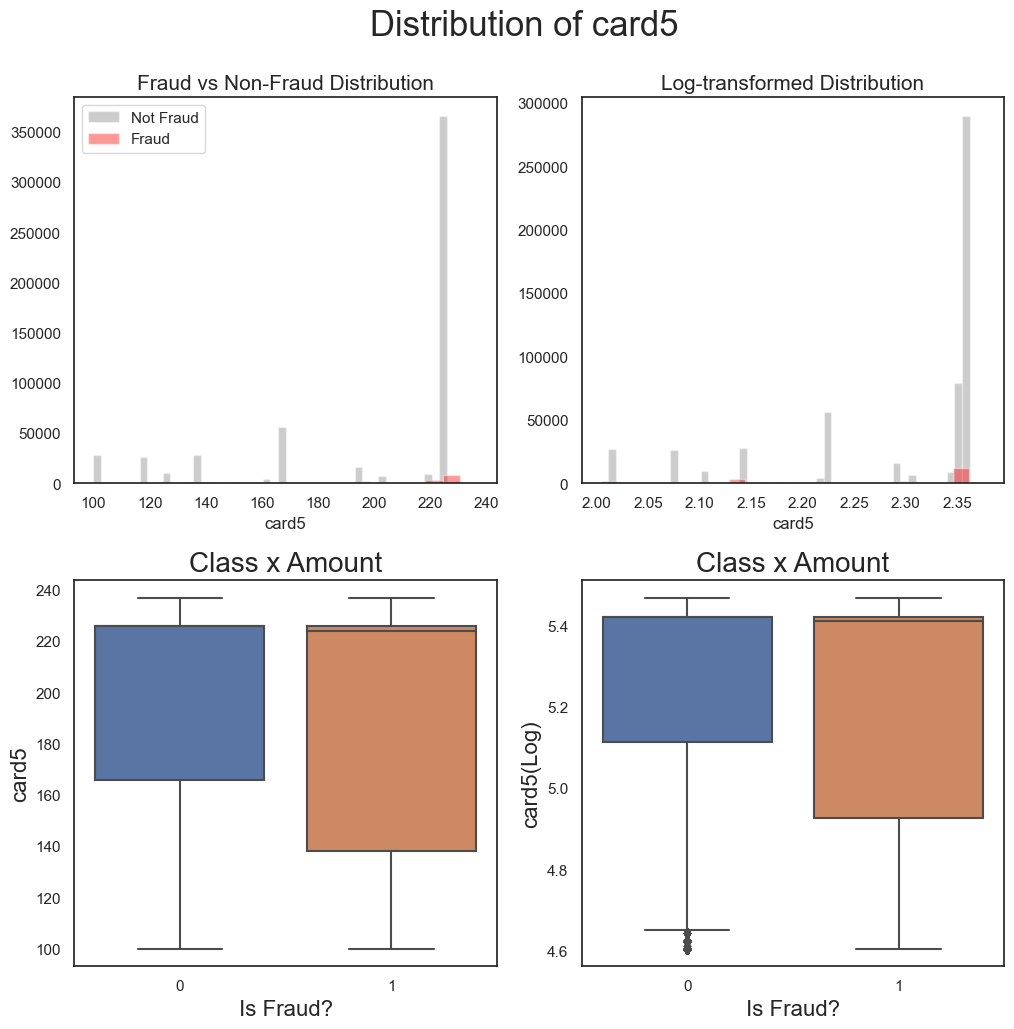

In [ ]:
numerical_plots(df=train_df, column='card5')

The basic column alone seems to be a good estimator.

### 4.3.6 Card 6

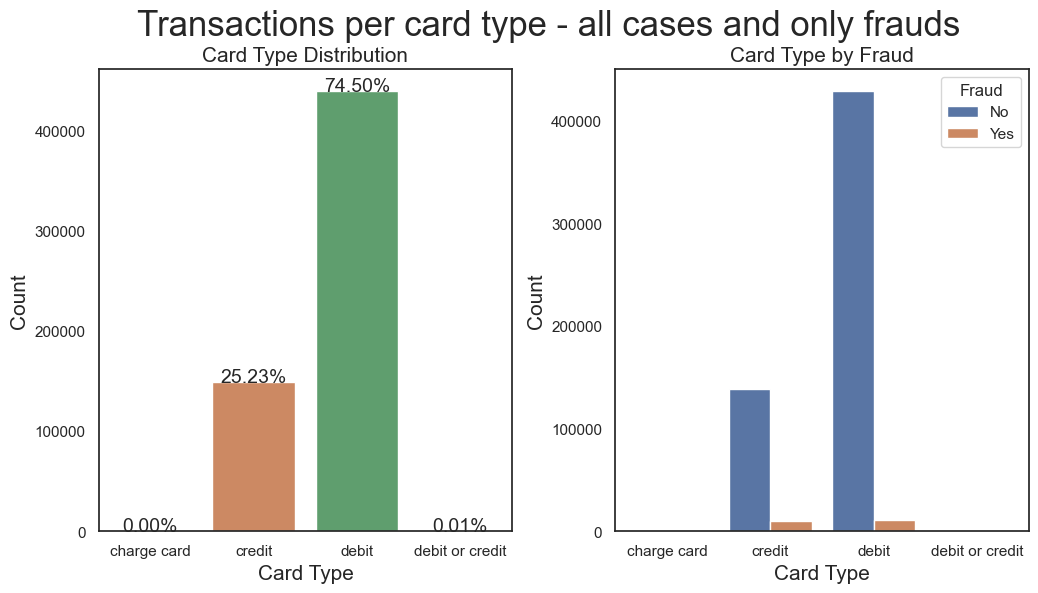

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Transactions per card type - all cases and only frauds', size=25)
plt.subplots_adjust(wspace=0.25, hspace=0.25)


sns.countplot(x = 'card6', data = train_df_cat, ax=ax[0])
ax[0].set_title('Card Type Distribution', fontsize = 15)
ax[0].set_xlabel("Card Type", fontsize=15)
ax[0].set_ylabel("Count", fontsize=15)
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train_df_cat)*100),
            ha="center", fontsize=14) 

sns.countplot(x='card6', hue='isFraud', data=train_df, ax=ax[1])
ax[1].set_title('Card Type by Fraud', fontsize = 15)
ax[1].set_xlabel("Card Type", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)

plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

It is easy to note that debit cards are responsible for almost 75% of transactions.

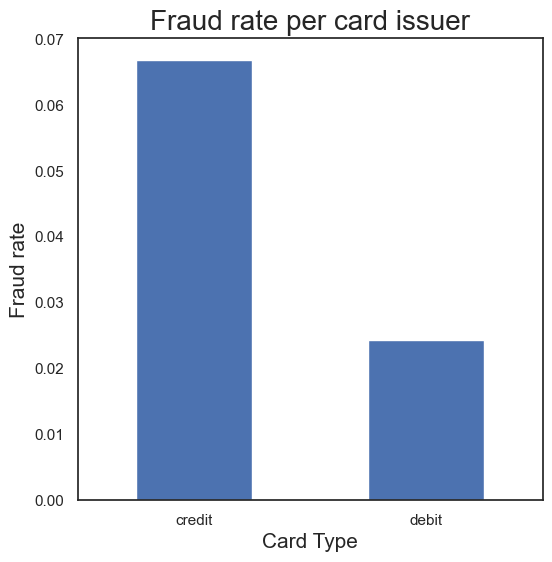

In [ ]:
plt.figure(figsize=(6, 6))

train_df.groupby('card6')['isFraud'].value_counts(normalize = True)[:, 1].plot.bar()
plt.title('Fraud rate per card issuer', size=20)
plt.tick_params(axis='x', labelrotation=0)
plt.ylabel("Fraud rate", fontsize=15)
plt.xlabel("Card Type", fontsize=15)

plt.show()

Credit cards have a Fraud rate of almost 7%, which is 3 times higher than a debit cards.

# 5. Missing data

## 5.1 Heatmaps explaining regularity in missing values

The heatmap below describes the null distribution among the categorical data. Nulls are marked in blue color.

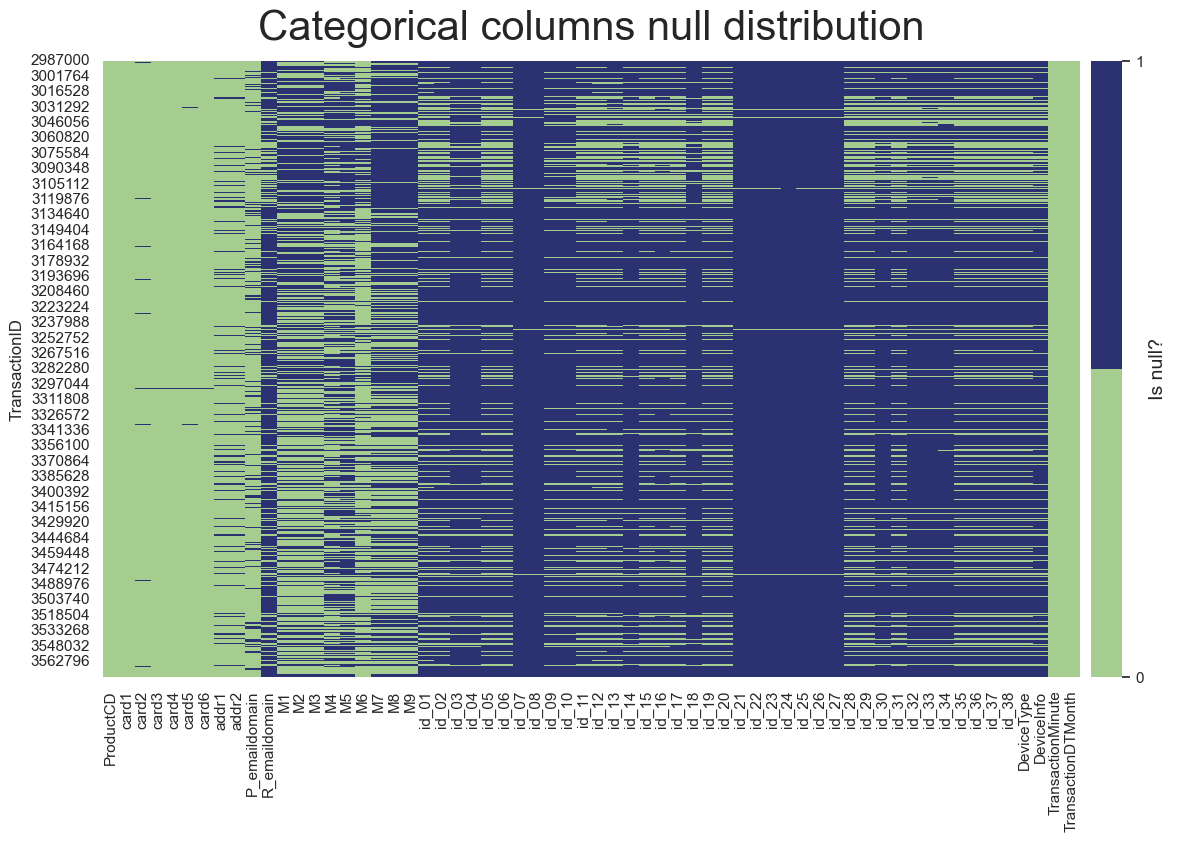

In [ ]:
plt.figure(figsize=(15,8))
cmap = plt.get_cmap('crest',2)
ax = sns.heatmap(train_df_cat.isnull(), cbar_kws={'ticks': [0, 1], 'pad': 0.01}, cmap=cmap)
plt.title('Categorical columns null distribution', size=30, pad=15)
ax.collections[0].colorbar.set_label('Is null?', size=14)
plt.show()

By looking at the heatmap, we may say that the id columns are missing most of the data. On the other hand product and card information, columns have almost all columns filled.

The heatmap below describes the null distribution among the numeric data. Nulls are marked in blue color.

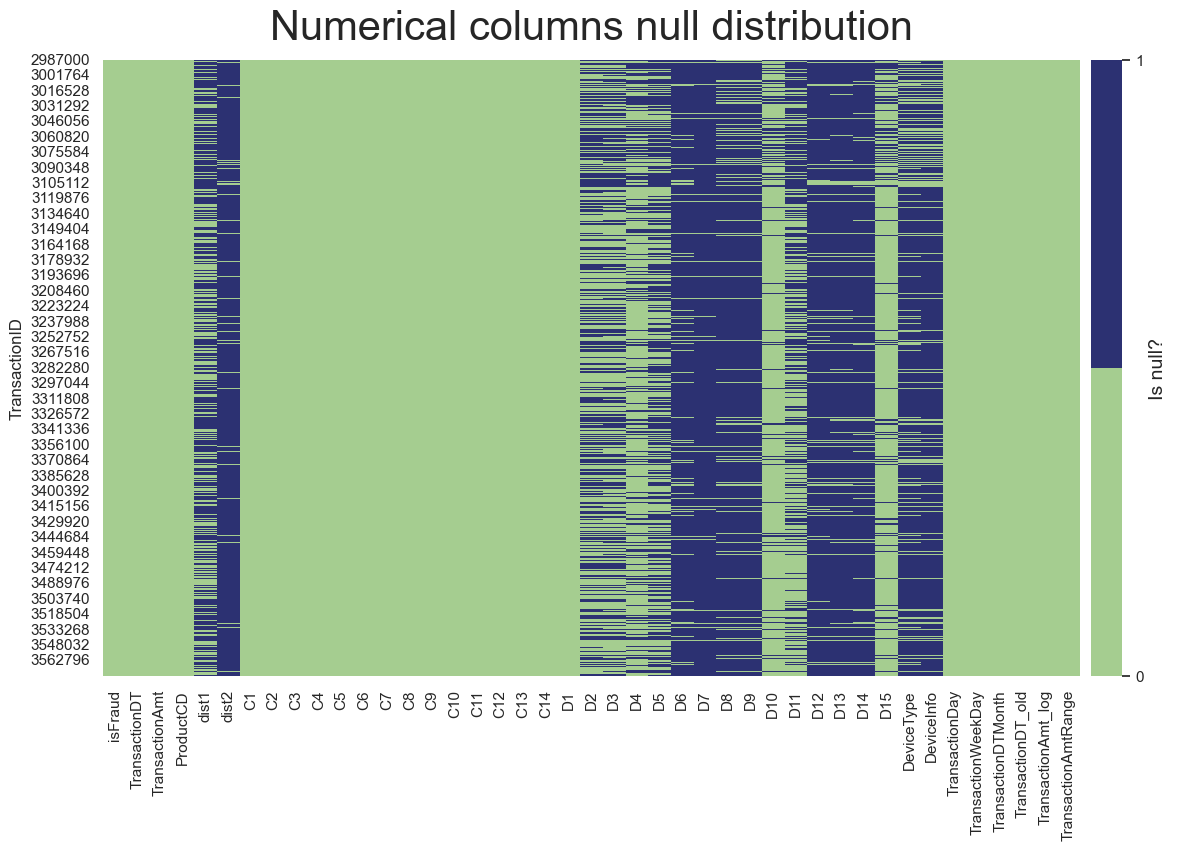

In [ ]:
train_full_num = train_df.filter(regex='isFraud|TransactionDT|TransactionAmt|dist|C|D')

cmap = plt.get_cmap('crest',2)
plt.figure(figsize=(15,8))
ax = sns.heatmap(train_full_num.isnull(), cbar_kws={'ticks': [0, 1], 'pad': 0.01}, cmap=cmap)
plt.title('Numerical columns null distribution', size=30, pad=15)
ax.collections[0].colorbar.set_label('Is null?', size=14)
plt.show()

By looking at the heatmap, we may say that D7-D9 and D12-D14 columns are missing most of the data. On the other hand C columns, TransactionDT, and card information columns have almost all columns filled.

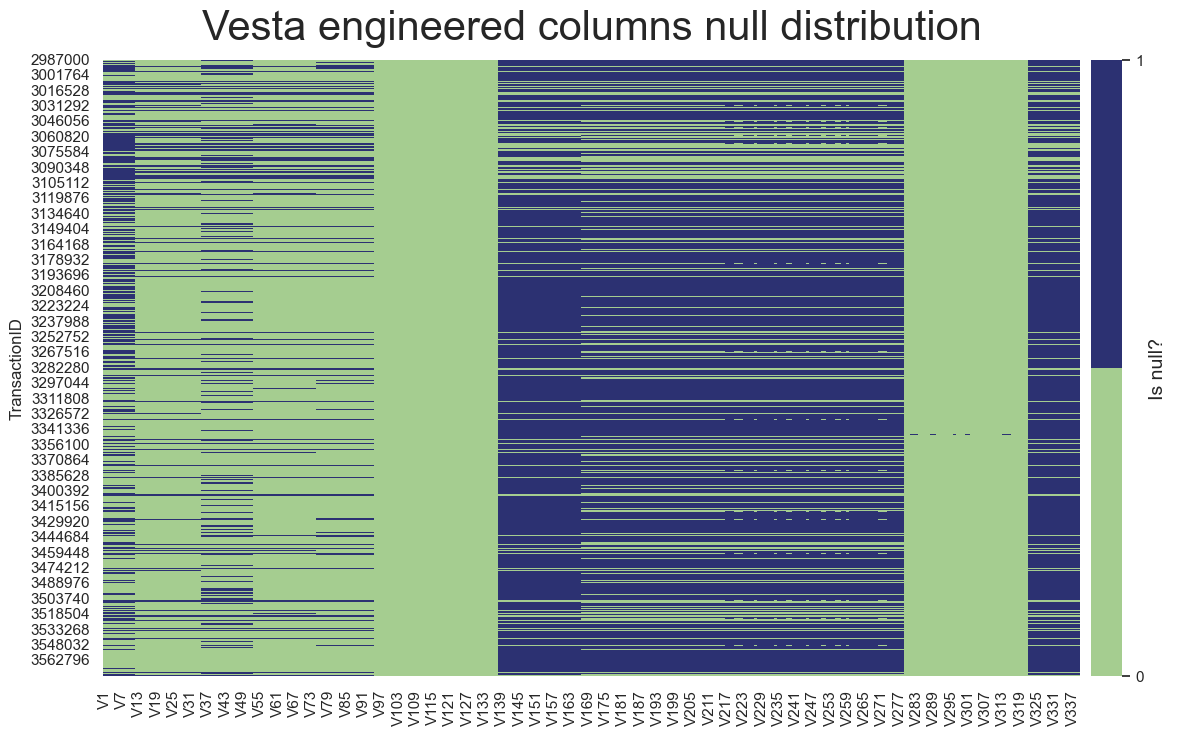

In [ ]:
train_full_Vesta = train_df.filter(regex='V')

cmap = plt.get_cmap('crest',2)
plt.figure(figsize=(15,8))
ax = sns.heatmap(train_full_Vesta.isnull(), cbar_kws={'ticks': [0, 1], 'pad': 0.01}, cmap=cmap)
plt.title('Vesta engineered columns null distribution', size=30, pad=15)
ax.collections[0].colorbar.set_label('Is null?', size=14)
plt.show()

The pattern here shows us that many V columns are related to each other. The reason for that is that there are Vesta-engineered features based on the same data.

All those heatmaps tell us one important thing. There are some patterns in the distribution of missing values and the shape of that distribution may be an indicator of fraud detection.

## 5.2. Filling NaNs in Card columns

In [ ]:
pd.concat([train_df[card_columns].isna().sum(), test_df[card_columns].isna().sum()], axis=1).rename(columns={0: 'train_NaNs', 1: 'test_NaNs'})

train_NaNs  test_NaNs
card1           0          0
card2        8933       8654
card3        1565       3002
card4        1577       3086
card5        4259       4547
card6        1571       3007

There are a lot of nulls in card columns. Maybe there is a way to fill them, by finding some dependencies.<br> 
Card1 is a key parameter, so other columns may be compared to Card1.

### 5.2.1 Card2

In [ ]:
pd.concat([train_df[train_df['card1'] == 15066][['card1', 'card2']].head(5), 
            train_df[train_df['card1'] == 7919][['card1', 'card2']].head(5), 
            train_df[train_df['card1'] == 9500][['card1', 'card2']].head(5)], axis=0, ignore_index=True)

card1  card2
0   15066  170.0
1   15066  170.0
2   15066  170.0
3   15066  170.0
4   15066  170.0
5    7919  194.0
6    7919  194.0
7    7919  194.0
8    7919  194.0
9    7919  194.0
10   9500  321.0
11   9500  321.0
12   9500  321.0
13   9500  321.0
14   9500  321.0

3 example values (15066, 7919, and 9500) of the 'card1' column were taken into consideration. For every given value of 'card1', 'card2' takes only one significant value.<br>
So we can assume that there are pairs of 'card1' and 'card2' values.<br>
Maybe there are exceptions to that rule in the data and to some 'card1' values instead of significant 'card2' values, a null is assigned.

In [ ]:
train_df[train_df['card2'].isna()][['card1', 'card2']].head()

card1  card2
TransactionID              
2987000        13926    NaN
2987123         6550    NaN
2987135         2616    NaN
2987213         6957    NaN
2987223         2616    NaN

The table above shows 5 example card1 values with respectively null assigned in card2.

In [ ]:
train_df[train_df['card1'] == 13926][['card1', 'card2']].head(10)

card1  card2
TransactionID              
2987000        13926    NaN
3023492        13926  327.0
3026562        13926  327.0
3033460        13926  327.0
3042544        13926  327.0
3079759        13926  327.0
3091924        13926    NaN
3123584        13926  327.0
3123766        13926  327.0
3146934        13926    NaN

It is a success! Usually 'card1' and 'card2' go in pairs, but sometimes null appears in 'card2'. Those null values can be replaced.

In [ ]:
def replace_nans(df, col2, col1='card1'):
    pair_dict = {}
    pair = [col1, col2]

    paired_df = df[pair].groupby(pair).count().reset_index() # Dataframe with 2 columns - 'card1' and 'card2' consists of distinct pairs of values
    single_pairs = paired_df[pair[0]].value_counts()[paired_df[pair[0]].value_counts()==1].index # Limiting list of 'card1' values to ones with only 1 corresponding value
    paired_df = paired_df[paired_df[pair[0]].isin(single_pairs)]

    for i in paired_df.values:
        pair_dict[i[0].astype(int)] = i[1] # Filling dictionary to map values

    print('Number of nulls in {} column: {} before replacement in {} dataset'.format(pair[1], df[pair[1]].isna().sum(), df.name))
    df[pair[1]][df[pair[1]].isna()] = df[pair[0]].map(pair_dict)
    print('Number of nulls in {} column: {} after replacement in {} dataset'.format(pair[1], df[pair[1]].isna().sum(), df.name))

In [ ]:

replace_nans(df=train_df, col2='card2')
replace_nans(df=test_df, col2='card2')

Number of nulls in card2 column: 8933 before replacement in Train dataset
Number of nulls in card2 column: 4780 after replacement in Train dataset
Number of nulls in card2 column: 8654 before replacement in Test dataset
Number of nulls in card2 column: 5511 after replacement in Test dataset


The algorithm has managed to reduce the number of nulls in the 'card2' column from 8933 to 4780.

### 5.2.2 Card3

The next step is checking the 'card3' column in the same way.<br>
There are some nulls assigned to 'card1' values. Same as previously.

In [ ]:
train_df[train_df['card1'] == 10370][['card1', 'card3']].loc[:3512866].tail(10)

card1  card3
TransactionID              
3405320        10370  150.0
3405322        10370  150.0
3416941        10370  150.0
3430836        10370  150.0
3445712        10370  150.0
3472643        10370  150.0
3482482        10370  150.0
3482486        10370  150.0
3487406        10370  150.0
3512866        10370    NaN

This slice of data suggests that indicated null in the 'card3' column may be replaced with 150.0.

In [ ]:
replace_nans(df=train_df, col2='card3')
replace_nans(df=test_df, col2='card3')

Number of nulls in card3 column: 1565 before replacement in Train dataset
Number of nulls in card3 column: 17 after replacement in Train dataset
Number of nulls in card3 column: 3002 before replacement in Test dataset
Number of nulls in card3 column: 48 after replacement in Test dataset


The algorythm have managed to reduce number of nulls in 'card3' column from 1565 to 17.

### 5.2.3 Card4

Next step is checking 'card4' column in the same way.

In [ ]:
train_df[train_df['card3'].isna()][['card1', 'card4']].head()

card1 card4
TransactionID             
2996686        16794   NaN
3015994         5178   NaN
3016013         5178   NaN
3270428         5224   NaN
3301059        13708   NaN

In [ ]:
replace_nans(df=train_df, col2='card4')
replace_nans(df=test_df, col2='card4')

Number of nulls in card4 column: 1577 before replacement in Train dataset
Number of nulls in card4 column: 1577 after replacement in Train dataset
Number of nulls in card4 column: 3086 before replacement in Test dataset
Number of nulls in card4 column: 3086 after replacement in Test dataset


Despite we have the same problem with 'card4' this approach didn't work and no null was replaced.

### 5.2.4 Card5

Next step is checking the 'card5' column in the same way.

In [ ]:
train_df[train_df['card3'].isna()][['card1', 'card5']].head()

card1  card5
TransactionID              
2996686        16794    NaN
3015994         5178    NaN
3016013         5178    NaN
3270428         5224    NaN
3301059        13708    NaN

In [ ]:
replace_nans(df=train_df, col2='card5')
replace_nans(df=test_df, col2='card5')

Number of nulls in card5 column: 4259 before replacement in Train dataset
Number of nulls in card5 column: 939 after replacement in Train dataset
Number of nulls in card5 column: 4547 before replacement in Test dataset
Number of nulls in card5 column: 1449 after replacement in Test dataset


Another success with 'card5'! The algorithm has managed to reduce the number of nulls from 4259 to 939.

### 5.2.5 Card6

Next step is checking 'card6' column in the same way.

In [ ]:
train_df[train_df['card3'].isna()][['card1', 'card5']].head()

card1  card5
TransactionID              
2996686        16794    NaN
3015994         5178    NaN
3016013         5178    NaN
3270428         5224    NaN
3301059        13708    NaN

In [ ]:
replace_nans(df=train_df, col2='card6')
replace_nans(df=test_df, col2='card6')

Number of nulls in card6 column: 1571 before replacement in Train dataset
Number of nulls in card6 column: 1571 after replacement in Train dataset
Number of nulls in card6 column: 3007 before replacement in Test dataset
Number of nulls in card6 column: 3007 after replacement in Test dataset


Despite we have the same problem with 'card6' this approach didn't work and no null was replaced.

# 6. Categorical Variables

## 6.1 Product Code

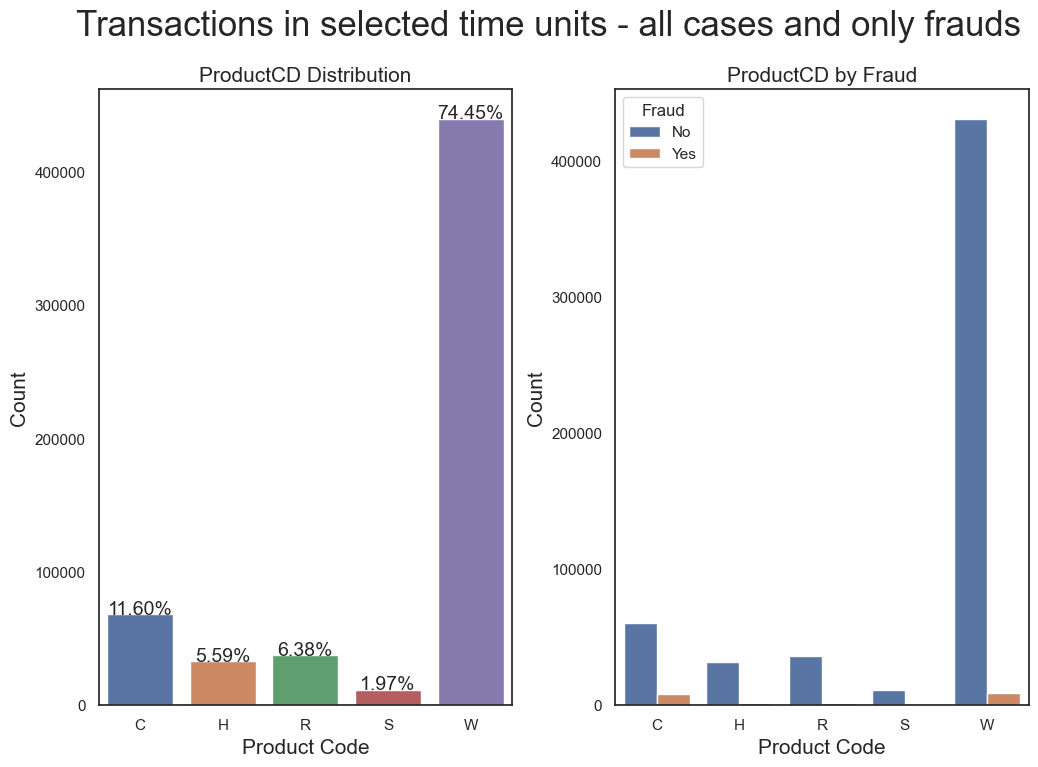

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

plt.suptitle('Transactions in selected time units - all cases and only frauds', size=25)
plt.subplots_adjust(wspace=0.25, hspace=0.25)


sns.countplot(x = 'ProductCD', data = train_df_cat, ax=ax[0])
ax[0].set_title('ProductCD Distribution', fontsize = 15)
ax[0].set_xlabel("Product Code", fontsize=15)
ax[0].set_ylabel("Count", fontsize=15)
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train_df_cat)*100),
            ha="center", fontsize=14) 

sns.countplot(x='ProductCD', hue='isFraud', data=train_df, ax=ax[1])
ax[1].set_title('ProductCD by Fraud', fontsize = 15)
ax[1].set_xlabel("Product Code", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)

plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

The plot above and Table below says that W is most frequent product category, but only 2% of associated transactions are frauds.<br>
On the other hand C has the biggest ratio of frauds compared to normal transactions, which is over 11%.

In [ ]:
train_df.groupby('ProductCD')['isFraud'].value_counts(normalize = True).unstack()

isFraud           0         1
ProductCD                    
C          0.883127  0.116873
H          0.952338  0.047662
R          0.962174  0.037826
S          0.941004  0.058996
W          0.979601  0.020399

<Figure size 800x400 with 0 Axes>

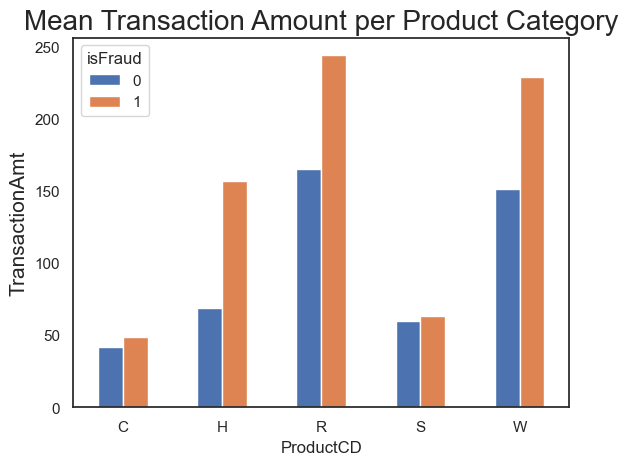

In [ ]:
plt.figure(figsize=(8, 4))

train_df.pivot_table('TransactionAmt', index='ProductCD', columns='isFraud').plot.bar()
plt.title('Mean Transaction Amount per Product Category', size=20)
plt.tick_params(axis='x', labelrotation=0)
plt.ylabel("TransactionAmt", fontsize=15)

plt.show()


From plot above we may observe curious regularity. For categories R, H and W fraud trtansactions ar much higher than normal transactions.<br>
For categories C and S transactions were on the same level.<br>
It gives the idea, that additional columns with aggregated amount values may be useful for proper fraud estimation.<br>
But to make it work,  first user ID column needs to be found.

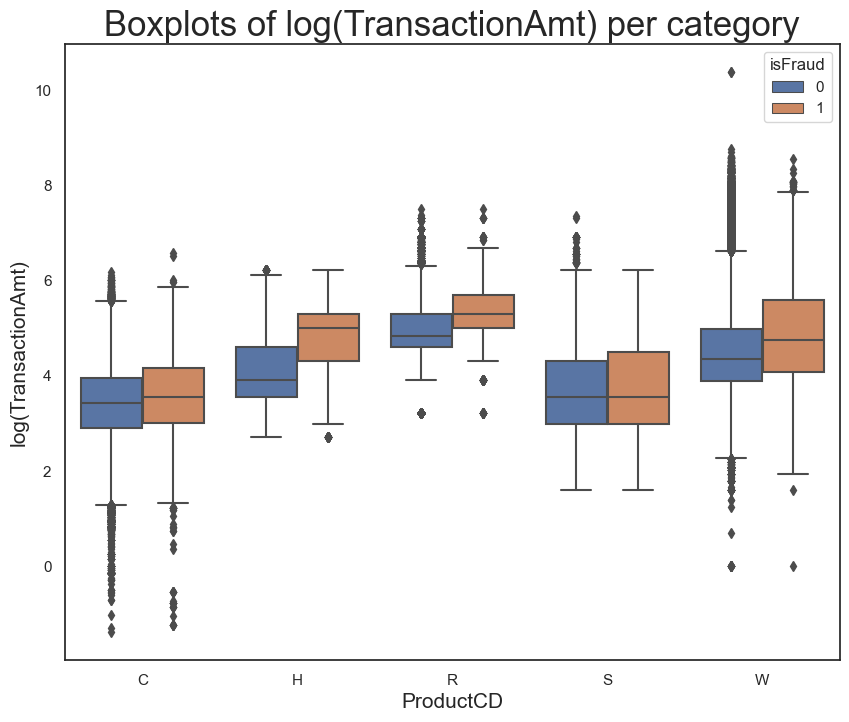

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'ProductCD', y = 'TransactionAmt_log', hue = 'isFraud', data = train_df)
plt.title('Boxplots of log(TransactionAmt) per category', size=25)
plt.ylabel("log(TransactionAmt)", fontsize=15)
plt.xlabel("ProductCD", fontsize=15)
plt.show()

## 6.2. Card parameters

In [ ]:
def count_fraud_rate_plot(df, column, rotation, limit_categories=False, n_count=0):
    if not any(df[column].cat.categories == 'NA'):
        df[column].cat.add_categories("NA", inplace=True)
    df[column].fillna("NA", inplace=True)
    if limit_categories:
        devicelist = list(df.groupby(column).filter(lambda x: len(x) >n_count)[column].unique())[1:]
        df = df[df[column].isin(devicelist)]
        variable_fraud_rate = train_df.groupby(column)['isFraud'].value_counts(normalize = True).unstack().loc[devicelist, 1]
    else:
        variable_fraud_rate = df.groupby(column)['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]
        
    plt.figure(figsize=(12,6))
    
    g = sns.countplot(x = column, data = df, order = variable_fraud_rate.index)
    g.set_title('{} Count'.format(column), fontsize = 25)
    g.set_xlabel("{}".format(column), fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    plt.xticks(rotation = rotation)

    r = g.twinx()
    r = sns.pointplot(x = list(variable_fraud_rate.index), y = variable_fraud_rate, color = "blue")
    r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")
    #plt.grid()
    plt.show()

### 6.2.1 Card 4 

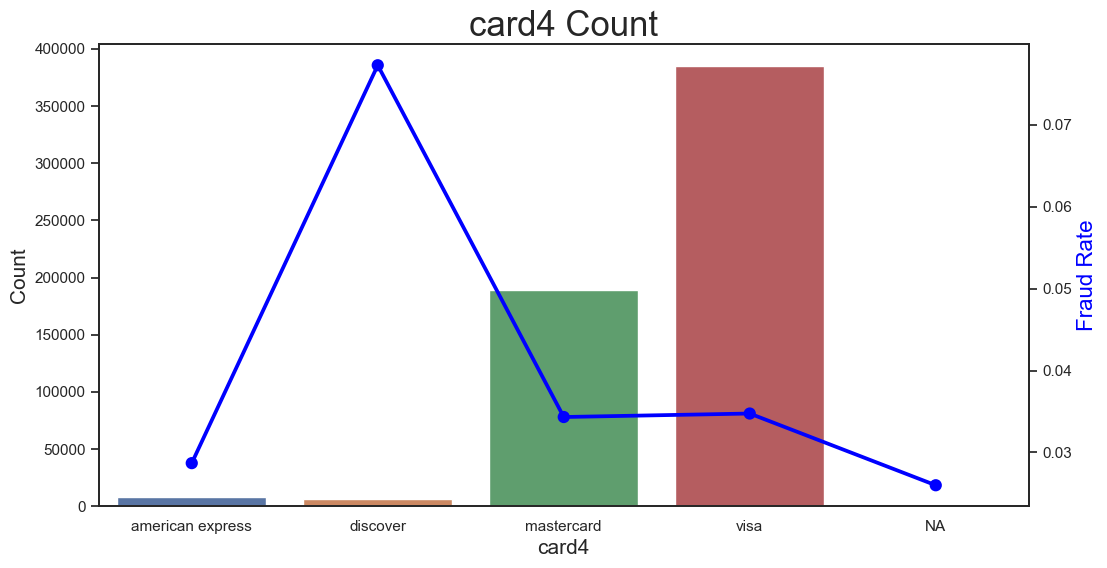

In [ ]:
count_fraud_rate_plot(df=train_df, column='card4', rotation='horizontal')

From the plot above we can see that visa is the most popular card provider.<br>
On the other side discover is the company with the most Fraud rate.

### 6.2.2 Card 6

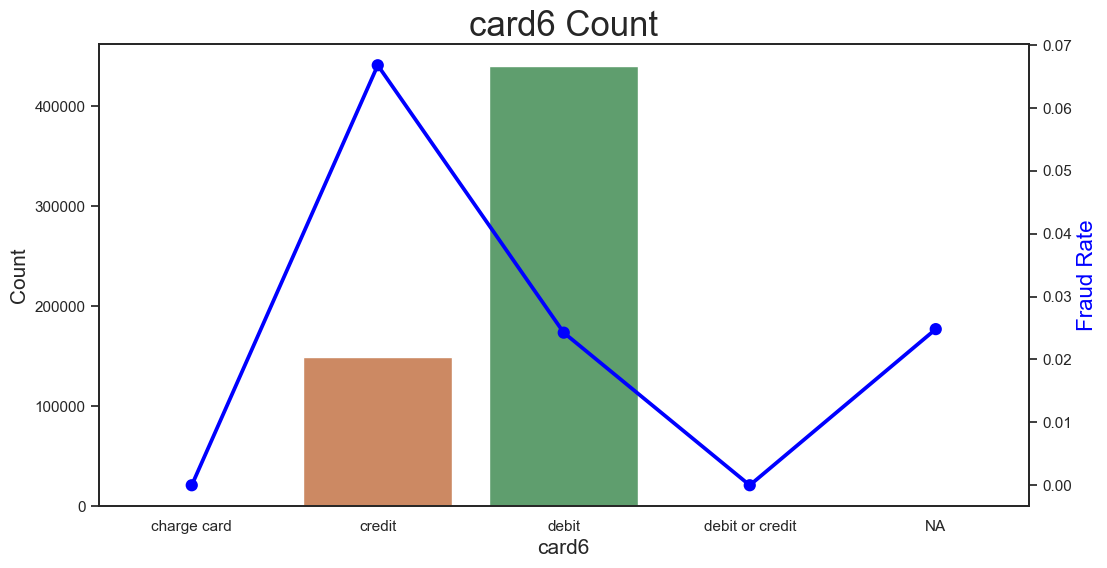

In [ ]:
count_fraud_rate_plot(df=train_df, column='card6', rotation='horizontal')

As we can see debit cards are the most popular ones, but credit cards are those with the highest Fraud Rates.

## 6.3 Email domains

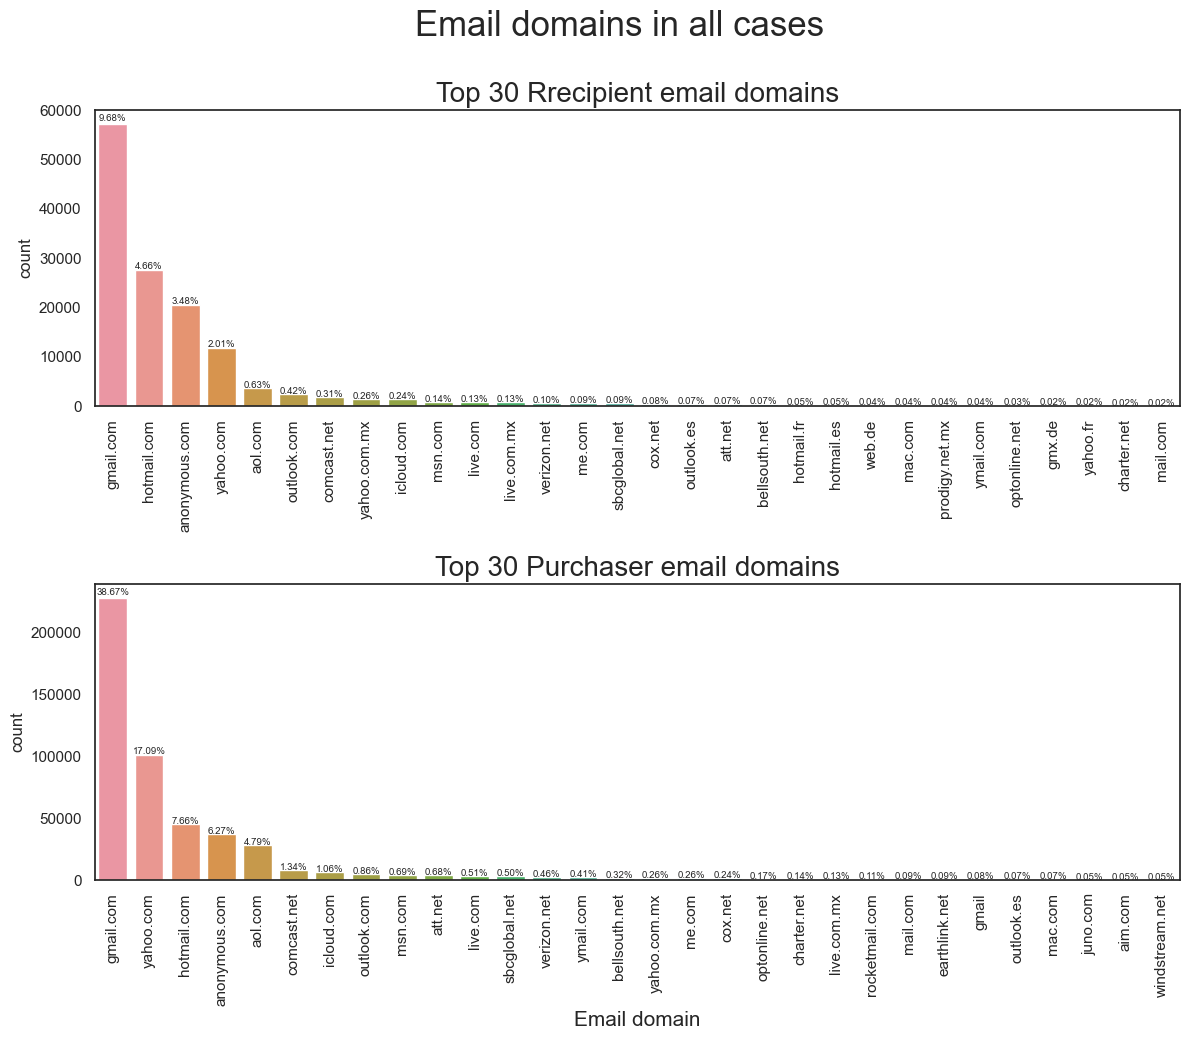

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

plt.suptitle('Email domains in all cases', size=25) #Main title
plt.subplots_adjust(hspace=0.6) #Set spacing between plots

sns.countplot(x="R_emaildomain", data=train_df, order=train_df['R_emaildomain'].value_counts().iloc[:30].index, ax=ax[0])
ax[0].set_title('Top 30 Rrecipient email domains', size=20)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_xlabel(" ", fontsize=15)
for p in ax[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax[0].text(x+width/2,
             y+height*1.01,
             '{:1.2f}%'.format(height/len(train_df_cat)*100),
             ha='center', 
             fontsize=7)


sns.countplot(x="P_emaildomain", data=train_df, order=train_df['P_emaildomain'].value_counts().iloc[:30].index, ax=ax[1])
ax[1].set_title('Top 30 Purchaser email domains', size=20)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_xlabel("Email domain", fontsize=15)
for p in ax[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax[1].text(x+width/2,
             y+height*1.01,
             '{:1.2f}%'.format(height/len(train_df_cat)*100),
             ha='center', 
             fontsize=7)

plt.show()

The first thing, which comes to mind is the number of domains.<br> 
We could try to reduce it by analyzing only domain names, without suffixes like 'com', 'es' etc. But we need to check first, do they have large differences in fraud rate.

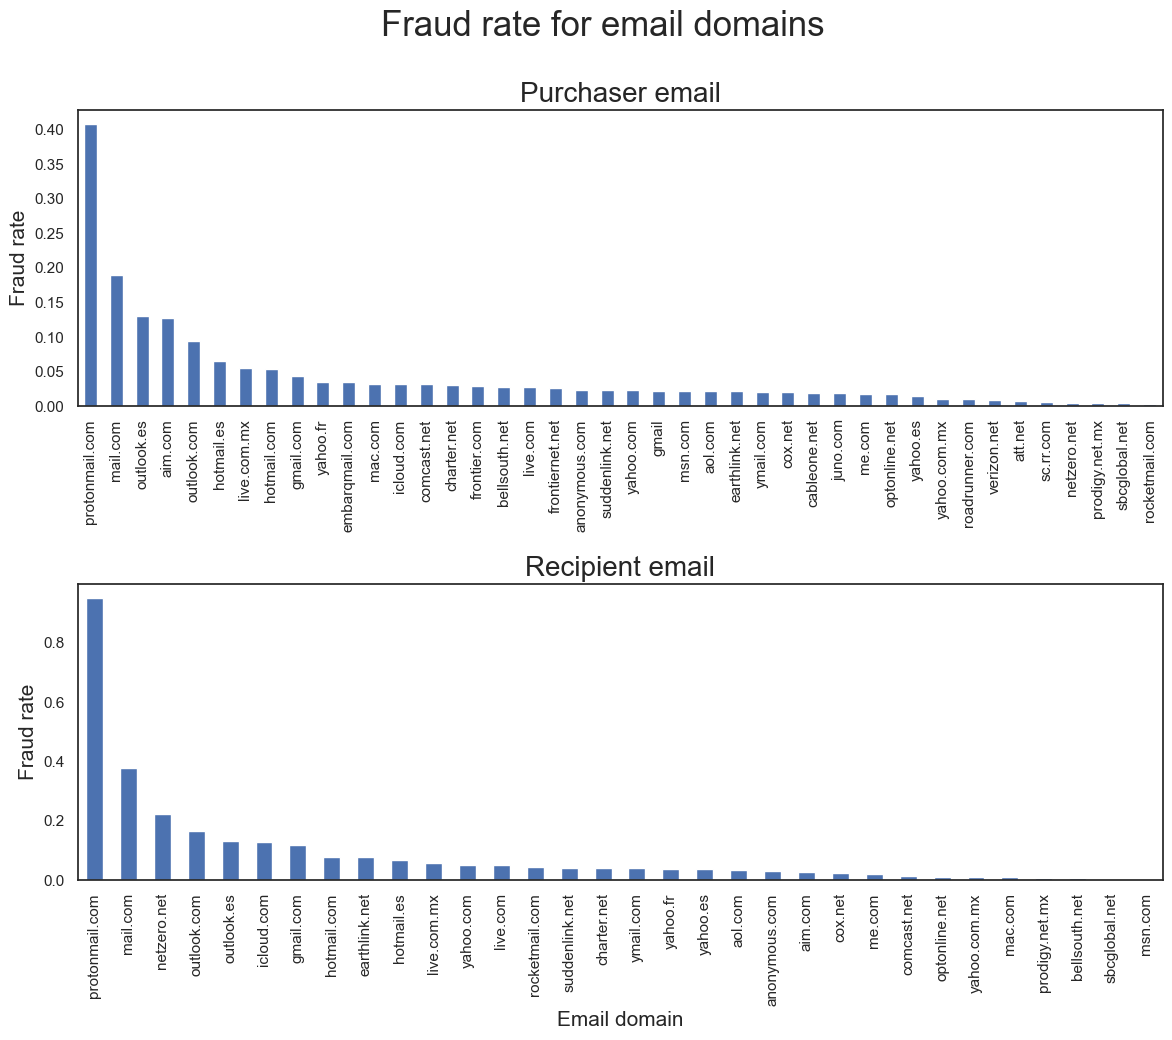

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

plt.suptitle('Fraud rate for email domains', size=25) #Main title
plt.subplots_adjust(hspace=0.6) #Set spacing between plots

train_df.groupby('P_emaildomain')['isFraud'].value_counts(normalize = True)[:, 1].sort_values(ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('Purchaser email', size=20)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Fraud rate", fontsize=15)
ax[0].set_xlabel(" ", fontsize=15)


train_df.groupby('R_emaildomain')['isFraud'].value_counts(normalize = True)[:, 1].sort_values(ascending=False).plot.bar(ax=ax[1])
ax[1].set_title('Recipient email', size=20)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Fraud rate", fontsize=15)
ax[1].set_xlabel("Email domain", fontsize=15)

plt.show()

Thanks to the plot above we may observe 2 important things. <br>
Firstly, there are email domains with very high fraud rates.
protonmail.com have a 90% fraud rate for Recipient email! <br>
And secondly, there is no big difference in fraud rate between domains with different suffixes like 'outlook.com' and 'outlook.fr'. So the next step is to cancel the suffix.

In [ ]:
for df in [train_df, test_df]:
    df["P_emaildomain_no_suffix"] = df["P_emaildomain"].str.split('.', expand = True)[[0]]
    df["R_emaildomain_no_suffix"] = df["R_emaildomain"].str.split('.', expand = True)[[0]]
    df['P_emaildomain_no_suffix'] = df['P_emaildomain_no_suffix'].astype('category')
    df['R_emaildomain_no_suffix'] = df['R_emaildomain_no_suffix'].astype('category')


In [ ]:
P_emaildomain_fraud_rate = train_df.groupby('P_emaildomain_no_suffix')['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]
R_emaildomain_fraud_rate = train_df.groupby('R_emaildomain_no_suffix')['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]

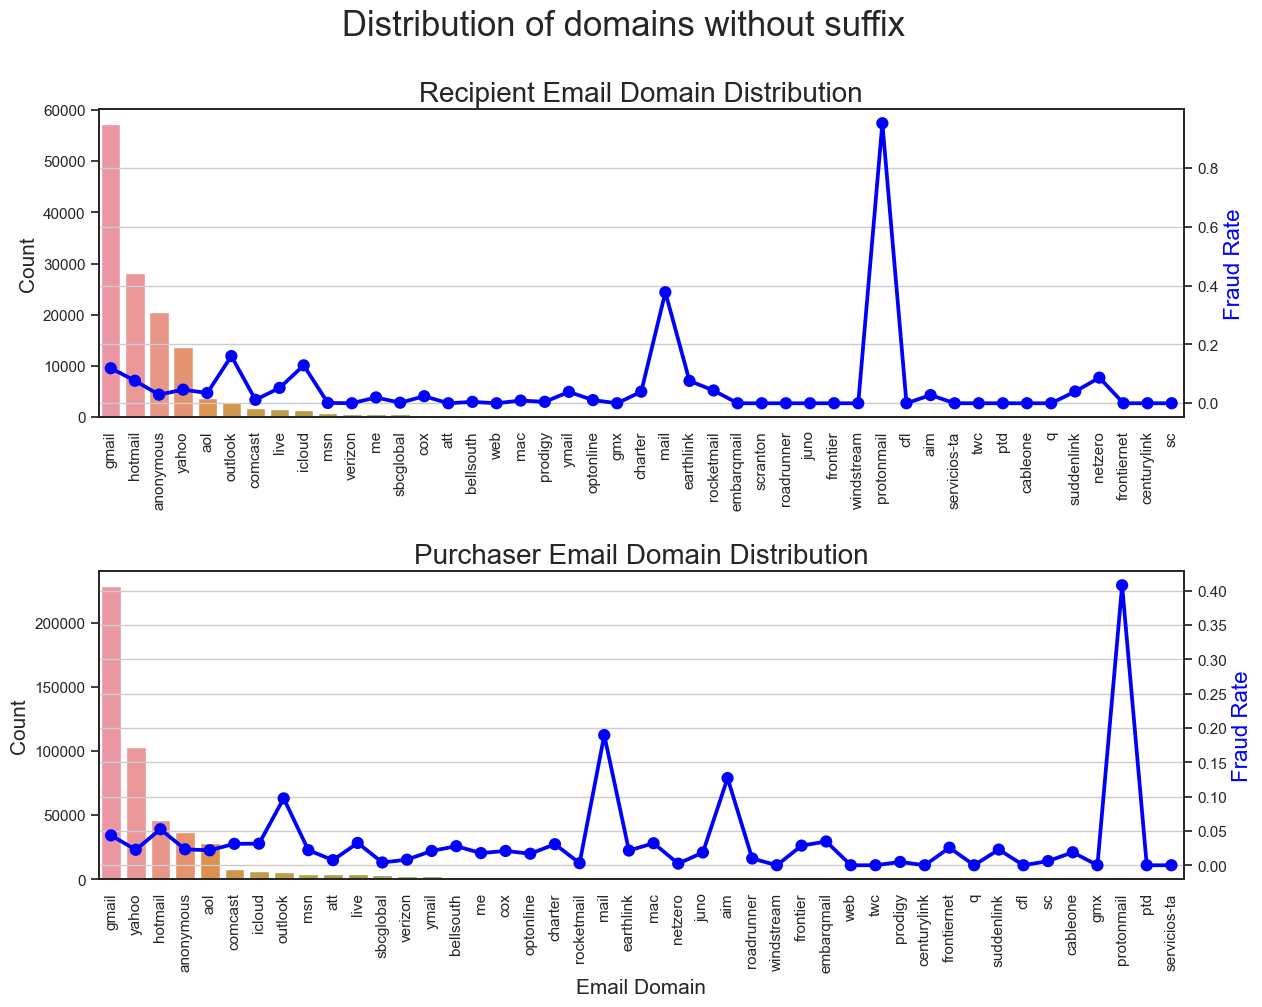

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

plt.suptitle('Distribution of domains without suffix', size=25) #Main title
plt.subplots_adjust(hspace=0.5) #Set spacing between plots

sns.countplot(x = 'R_emaildomain_no_suffix', data = train_df, order=train_df['R_emaildomain_no_suffix'].value_counts().index, ax=ax[0])
ax[0].set_title('Recipient Email Domain Distribution', size=20)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Count", fontsize=15)
ax[0].set_xlabel(" ", fontsize=15)
r = ax[0].twinx()
r = sns.pointplot(x = R_emaildomain_fraud_rate.index, y = R_emaildomain_fraud_rate, color = 'blue', order=train_df['R_emaildomain_no_suffix'].value_counts().index)
r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")
plt.grid()

sns.countplot(x = 'P_emaildomain_no_suffix', data = train_df, order=train_df['P_emaildomain_no_suffix'].value_counts().index, ax=ax[1])
ax[1].set_title('Purchaser Email Domain Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Count", fontsize=15)
ax[1].set_xlabel("Email Domain", fontsize=15)
r = ax[1].twinx()
r = sns.pointplot(x = P_emaildomain_fraud_rate.index, y = P_emaildomain_fraud_rate, color = 'blue', order=train_df['P_emaildomain_no_suffix'].value_counts().index)
r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue") 
plt.grid()

plt.show()

The plot above gives insight into email information. It is definitely valuable for an analyst.

## 6.4 M columns

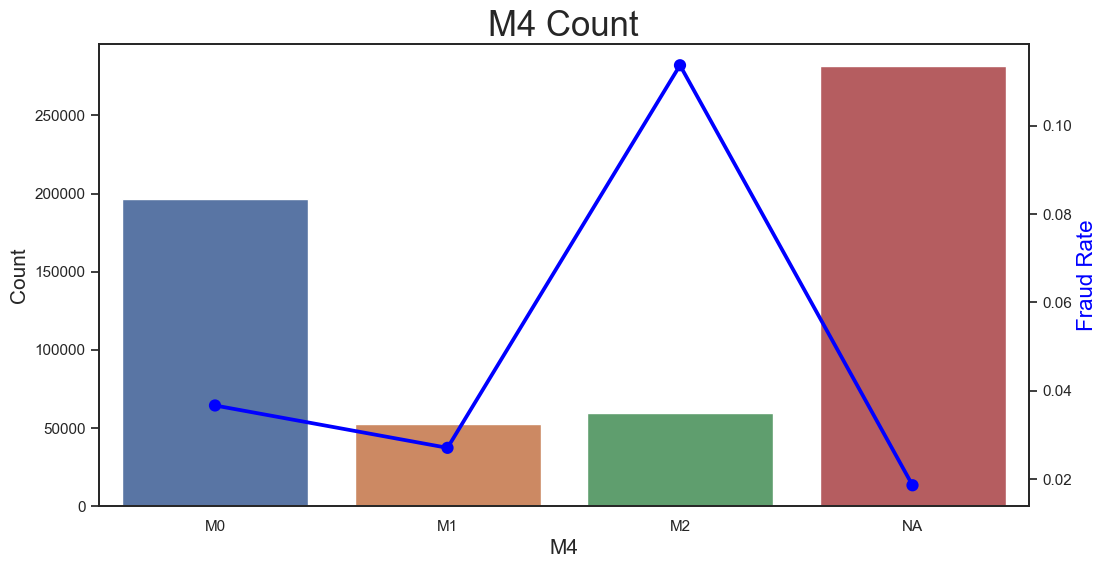

In [ ]:
count_fraud_rate_plot(df=train_df, column='M4', rotation='horizontal')

An interesting M column, which is worthy to look at is "M4'. We can notice here Fraud rate spiking over 10% for the M2 variable.

## 6.5 Devices 

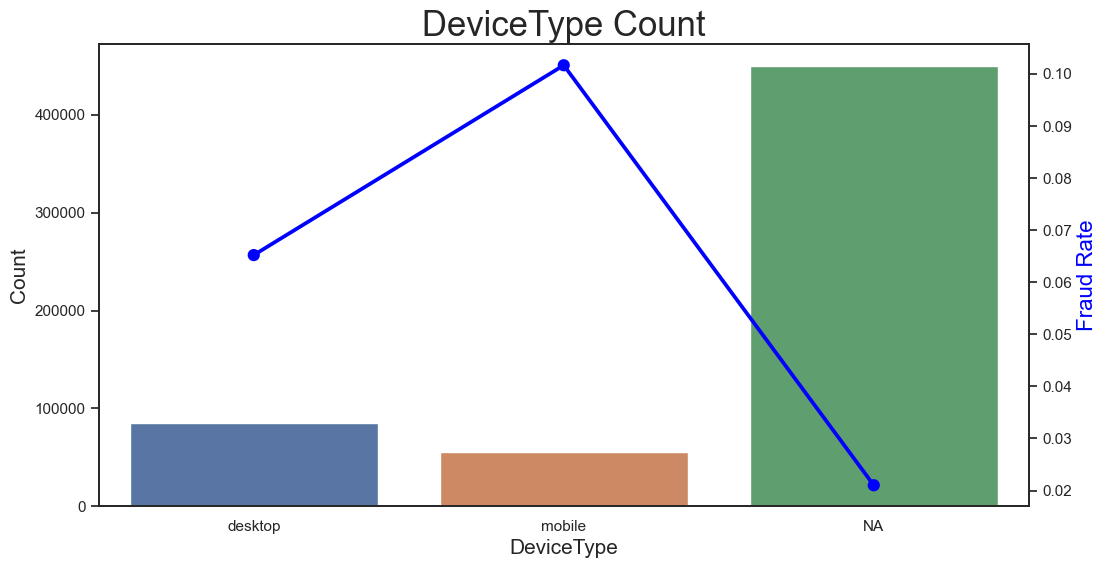

In [ ]:
count_fraud_rate_plot(df=train_df, column='DeviceType', rotation='horizontal')

The plot above gives important information that mobile devices have a significantly higher fraud rate.

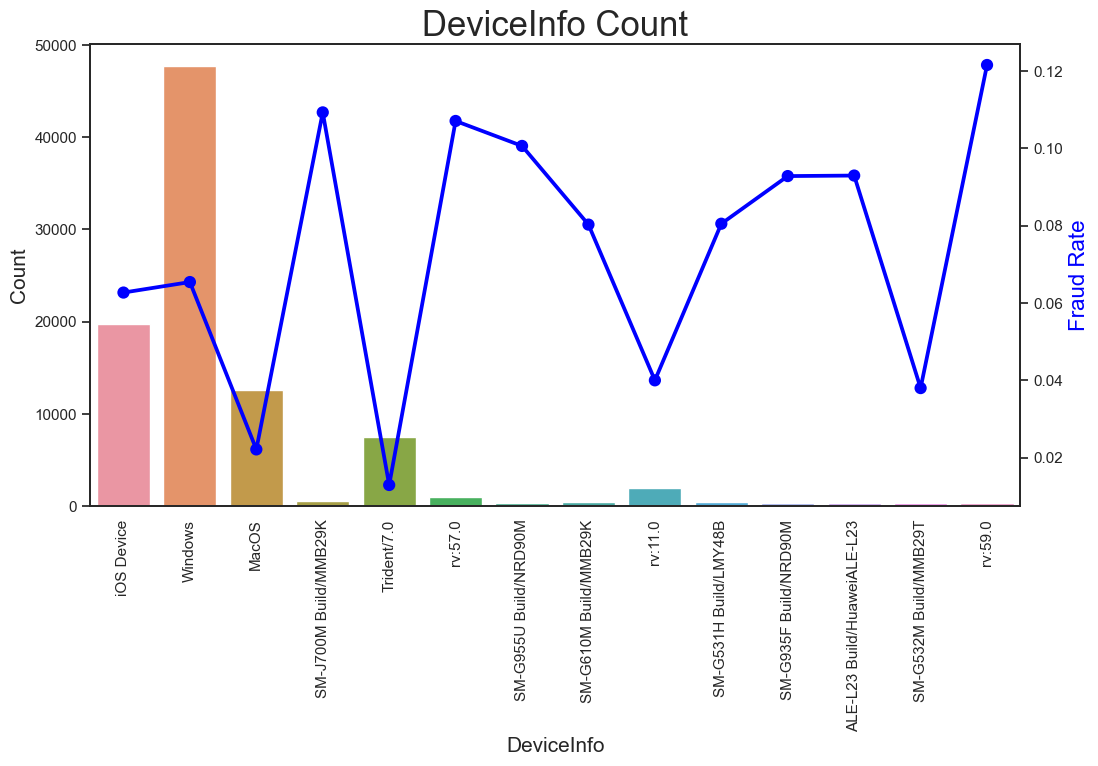

In [ ]:
count_fraud_rate_plot(df=train_df, column='DeviceInfo', rotation='vertical', limit_categories=True, n_count=300)

The plot above gives information, that we both have devices with significantly high Fraud Rate and ones with very small Fraud Rate. Especially there are various results with mostly used devices.

## 6.6 Categorical Id columns

Now is the moment to analyze categorical ID columns. I have picked a few most interesting columns to display:

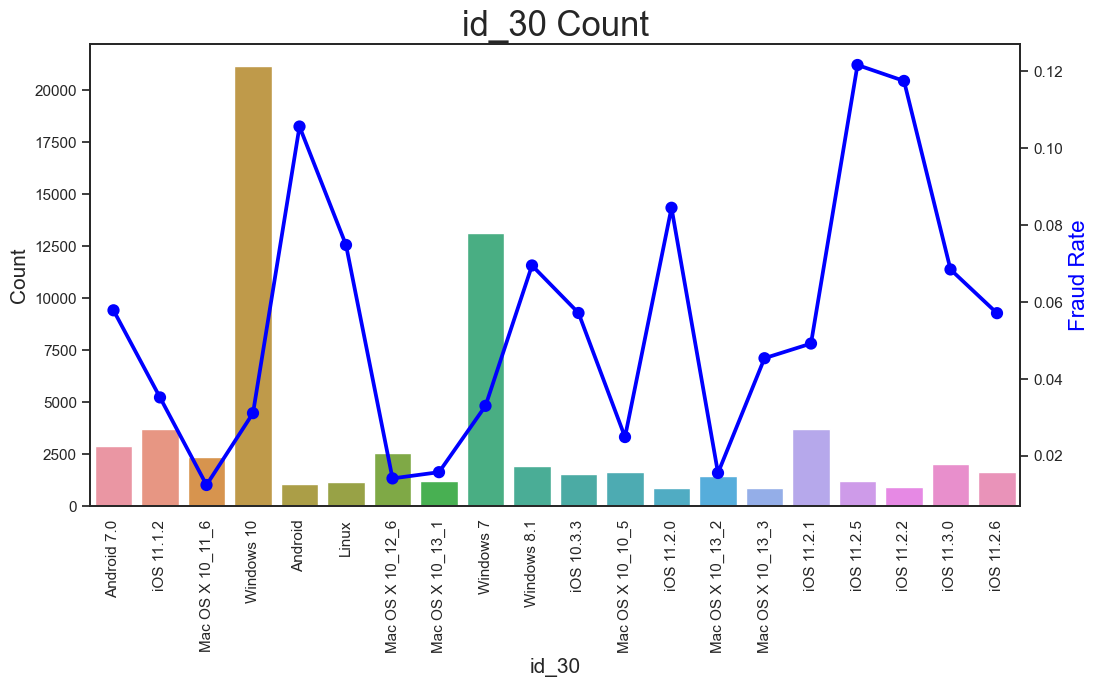

In [ ]:
# All id categorical columns: 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'
count_fraud_rate_plot(df=train_df, column='id_30', rotation='vertical', limit_categories=True, n_count=800)

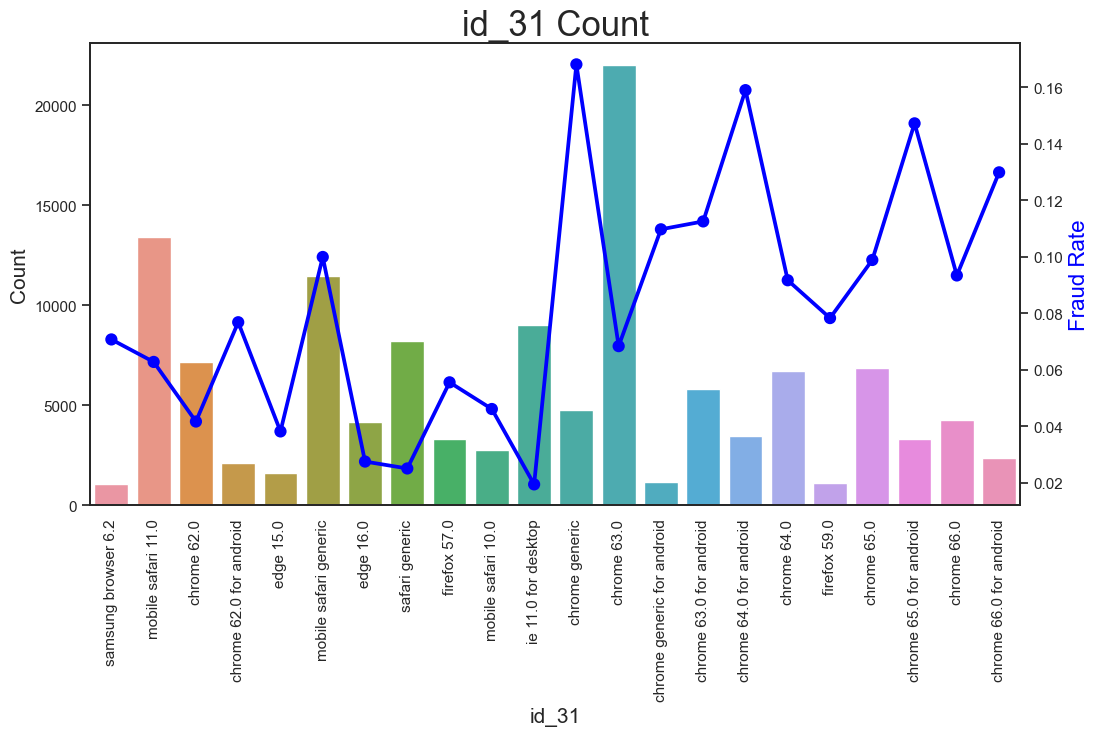

In [ ]:
count_fraud_rate_plot(df=train_df, column='id_31', rotation='vertical', limit_categories=True, n_count=1000)

The plots above give information about web browsers and the operating system of the device. It can be easily seen that those columns may be valuable for the estimation of fraud predictions.<br>
I see here a deeper analysis, to estimate some grouping. For example group all chrome desktop versions together - as with email domains.<br>
Nevertheless, it needs to be done with proper care. For example 'chrome 64.0 for android' has Fraud Rate at a level of 16% and 'chrome 62.0 for android' has an 8% Fraud Rate.<br>
It wouldn't be wise to group them together. Below is a try for OS.

In [ ]:
for df in [train_df, test_df]:
    df['OS'] = df["id_30"].str.split(' ', expand = True)[[0]]
    df['OS'] = df['OS'].astype('category')

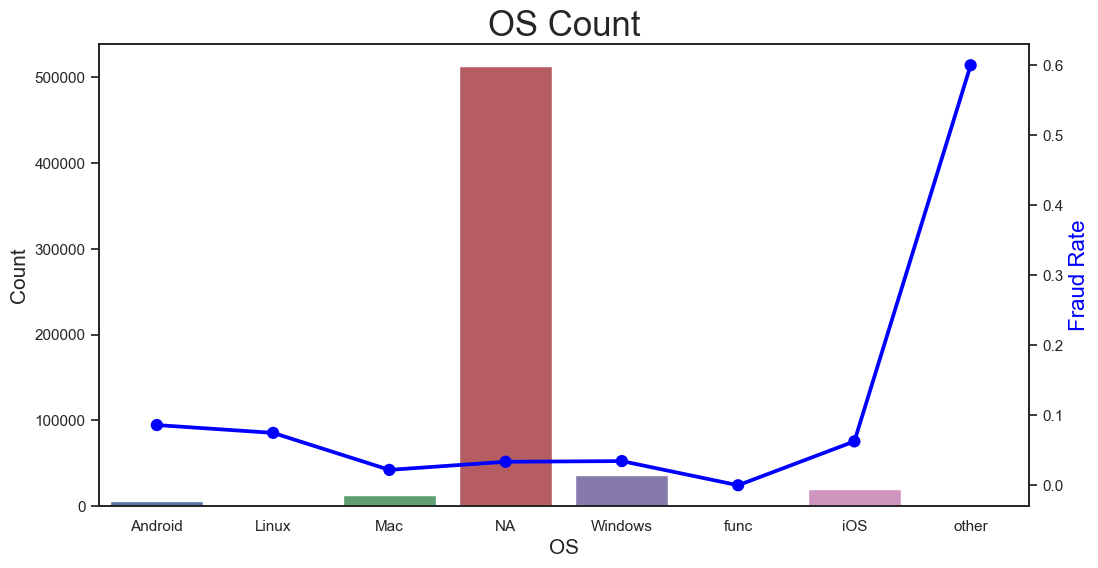

In [ ]:
count_fraud_rate_plot(df=train_df, column='OS', rotation='horizontal')

As we can see this grouped OS plot has much less variance of Fraud Rates among Operating System Families. <br>
It may be a sign that this grouping won't have any positive influence on the model.

In [ ]:
for df in [train_df, test_df]:
    df['Browser'] = df["id_31"].str.split(' ', expand = True)[[0]]
    df['Browser'] = df['Browser'].astype('category')

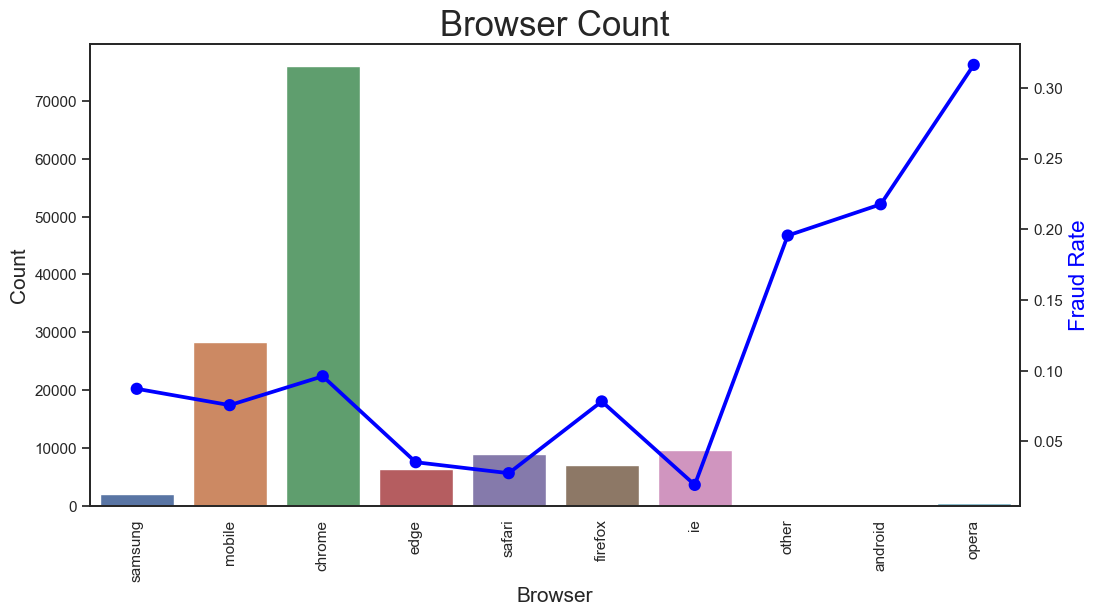

In [ ]:
count_fraud_rate_plot(df=train_df, column='Browser', rotation='vertical', limit_categories=True, n_count=300)

Despite some information having been lost by grouping all chrome versions, we are able to note a 30% Fraud Rate spike for Opera. <br>
I still see a place for improvement here by dividing those browsers into smaller groups.

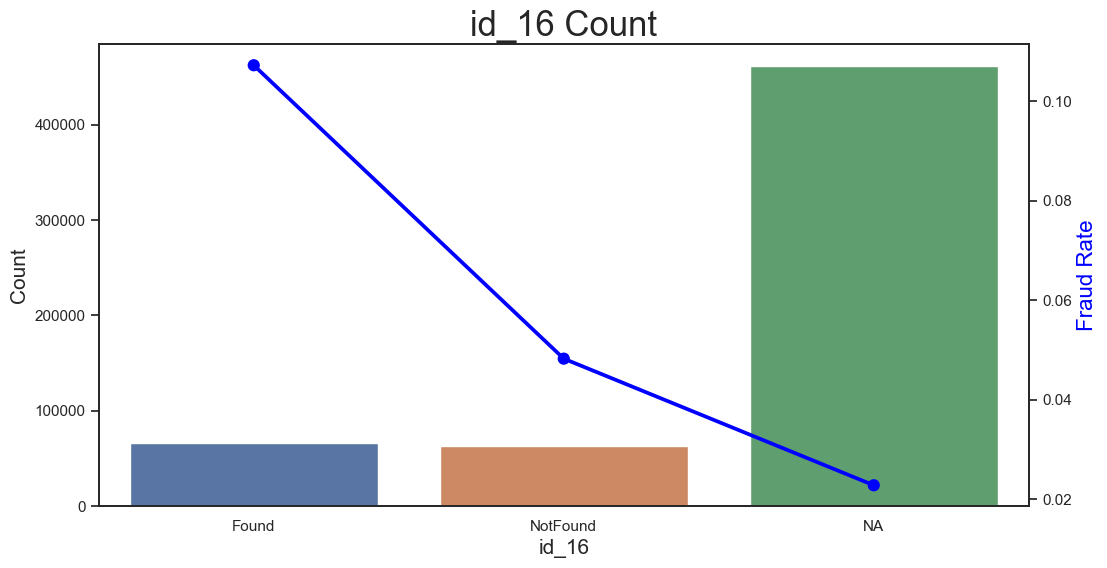

In [ ]:
count_fraud_rate_plot(df=train_df, column='id_16', rotation='horizontal')

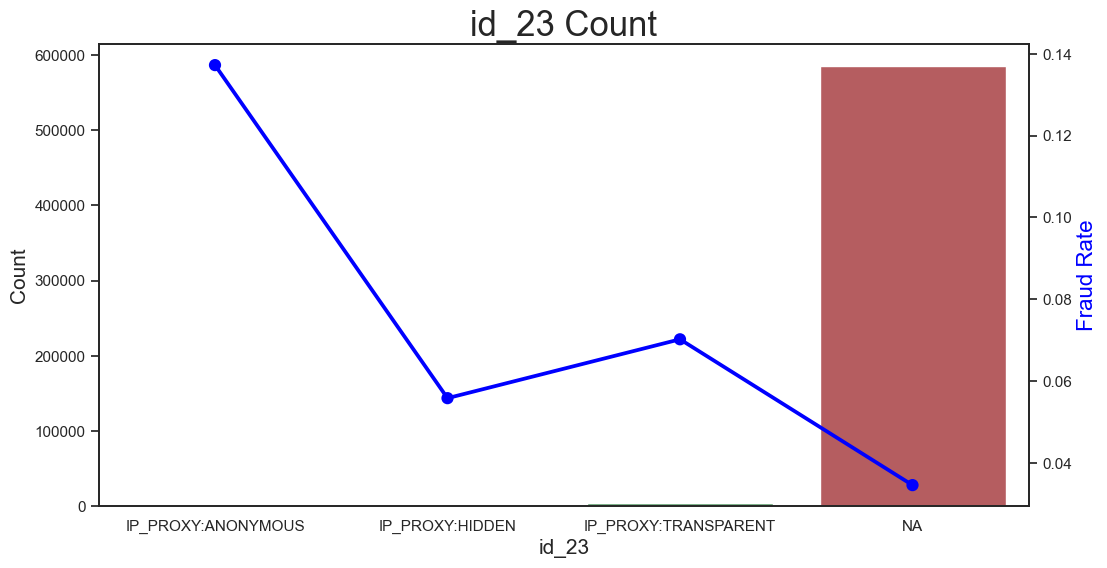

In [ ]:
count_fraud_rate_plot(df=train_df, column='id_23', rotation='horizontal')

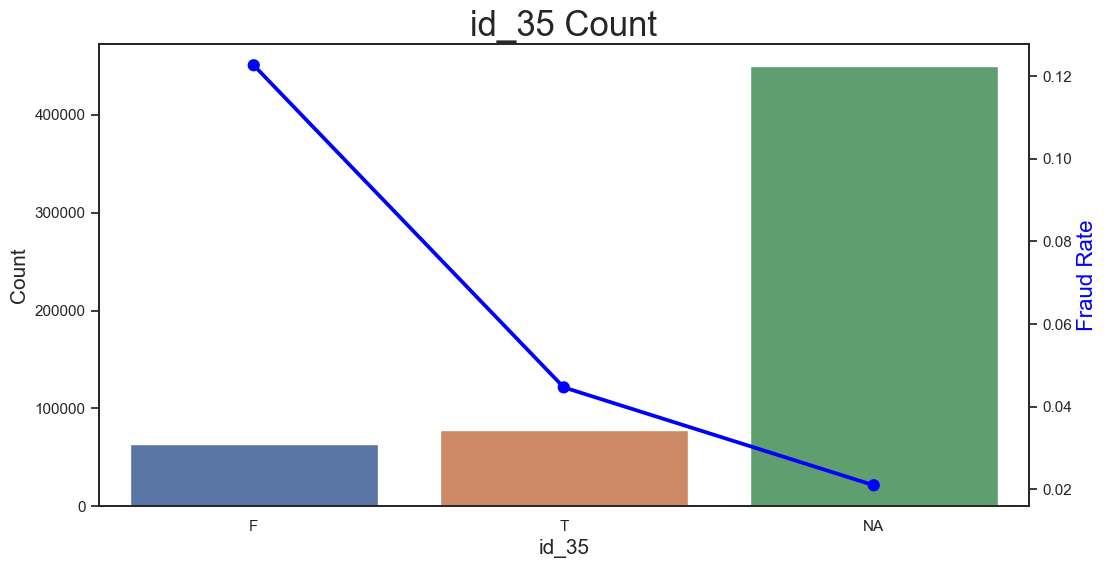

In [ ]:
count_fraud_rate_plot(df=train_df, column='id_35', rotation='horizontal')

The factors analyzed above are another proof that Id columns may provide valuable information. <br>
14% of transactions with Anonymous IP Proxy were frauds, the same as more than 10% of transactions with devices flagged as "Found".

# 7. Numerical Variables

Here we can pick which factor would be better in describing column variables - the column itself or the logarithm of that column.

## 7.1 Card columns

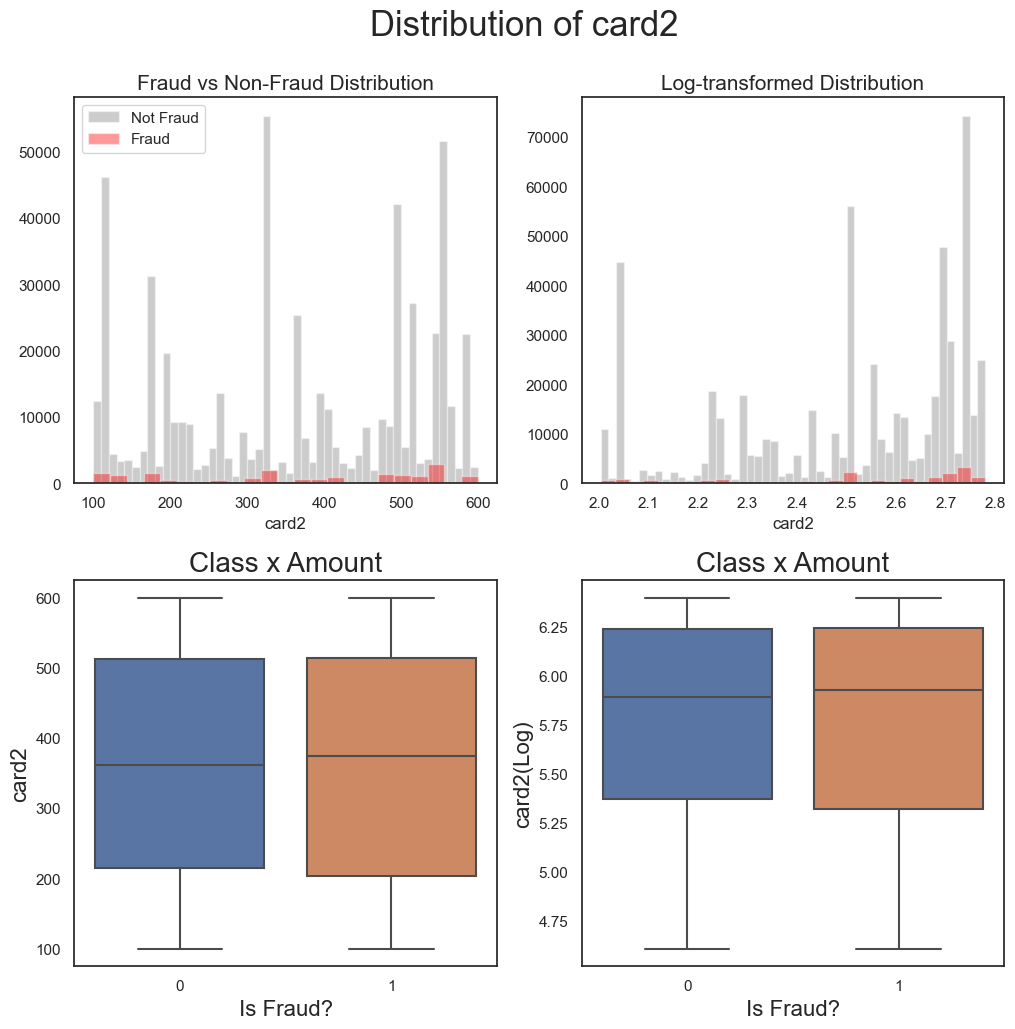

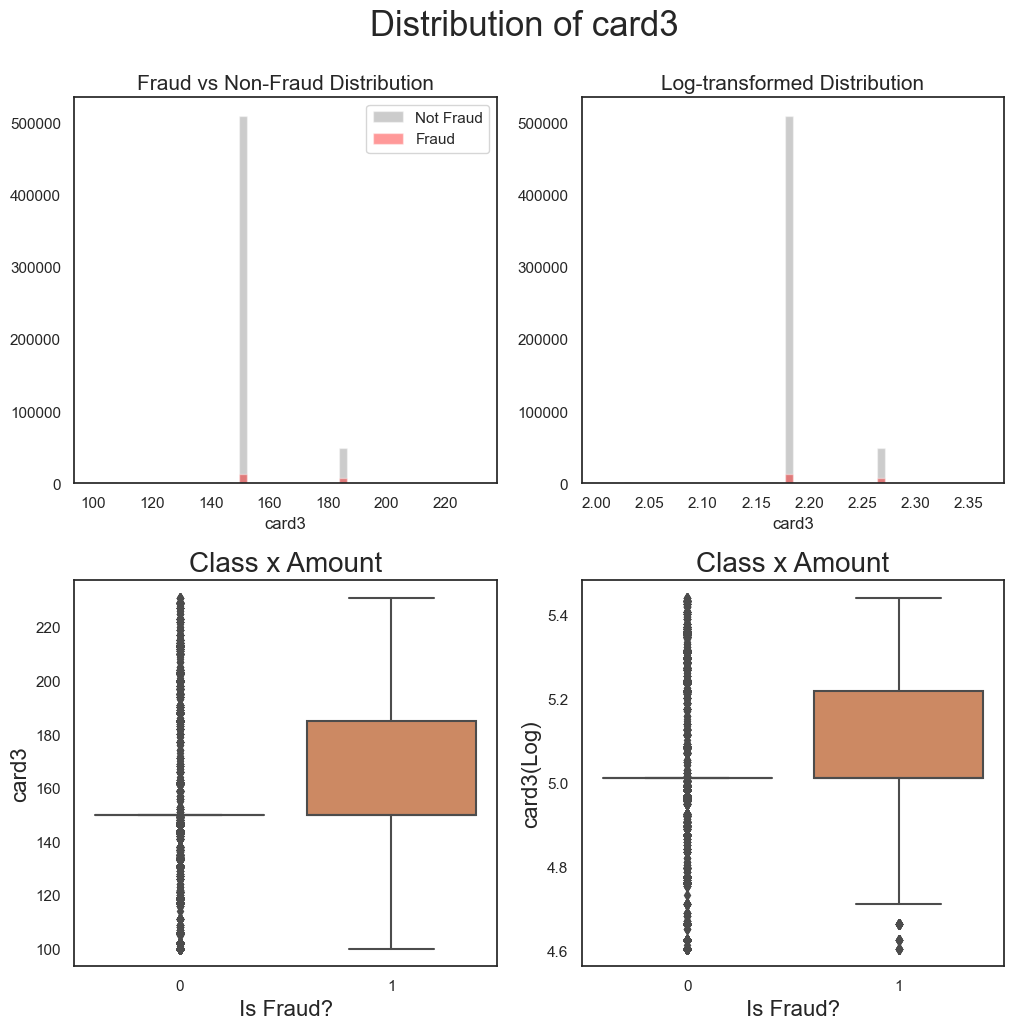

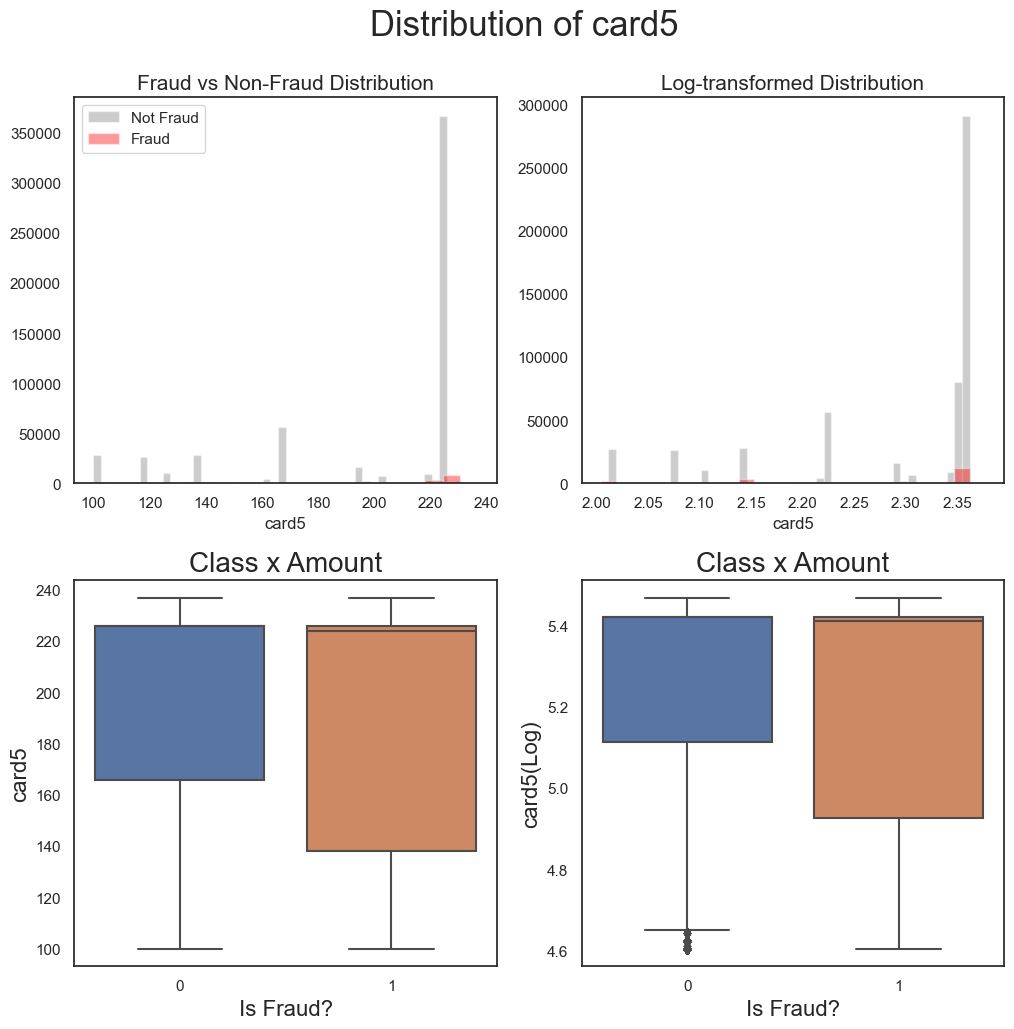

In [ ]:
numerical_plots(df=train_df, column='card2')
numerical_plots(df=train_df, column='card3')
numerical_plots(df=train_df, column='card5')

## 7.2 Address columns

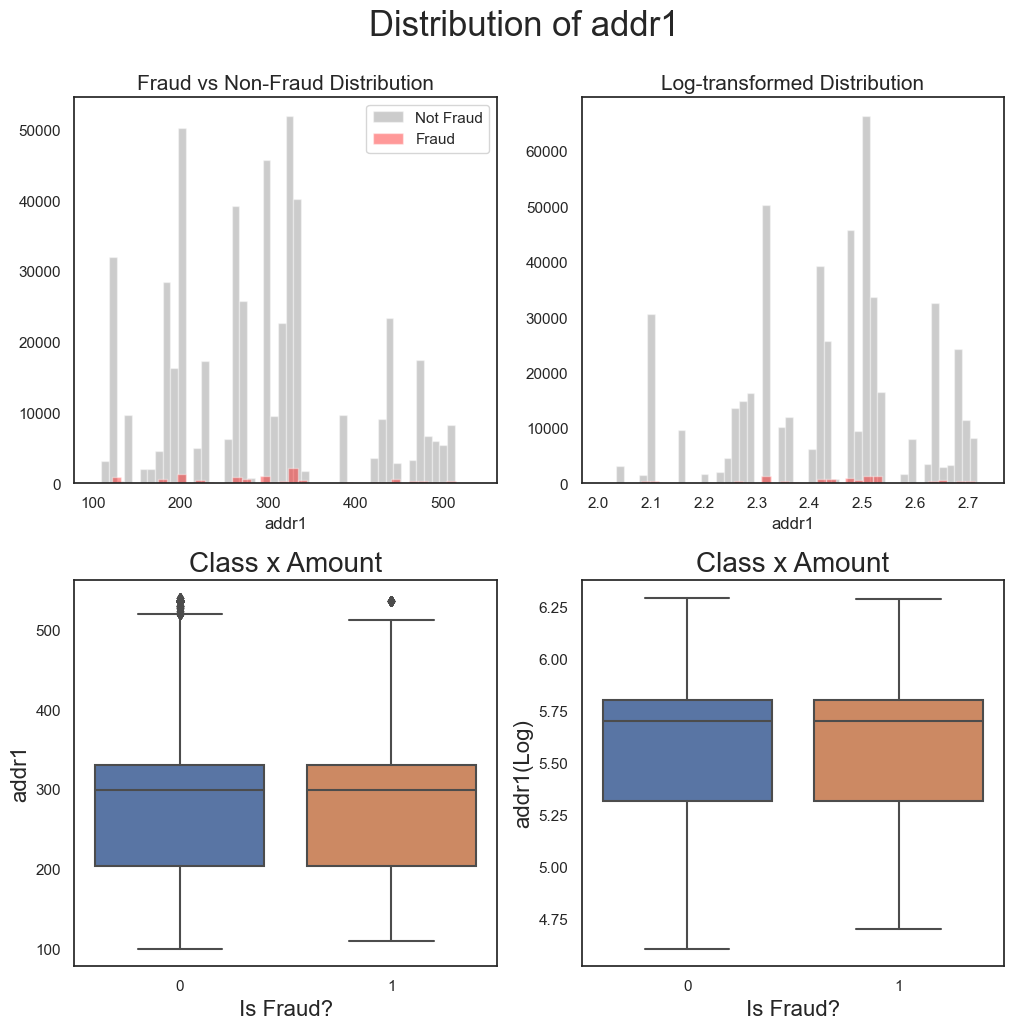

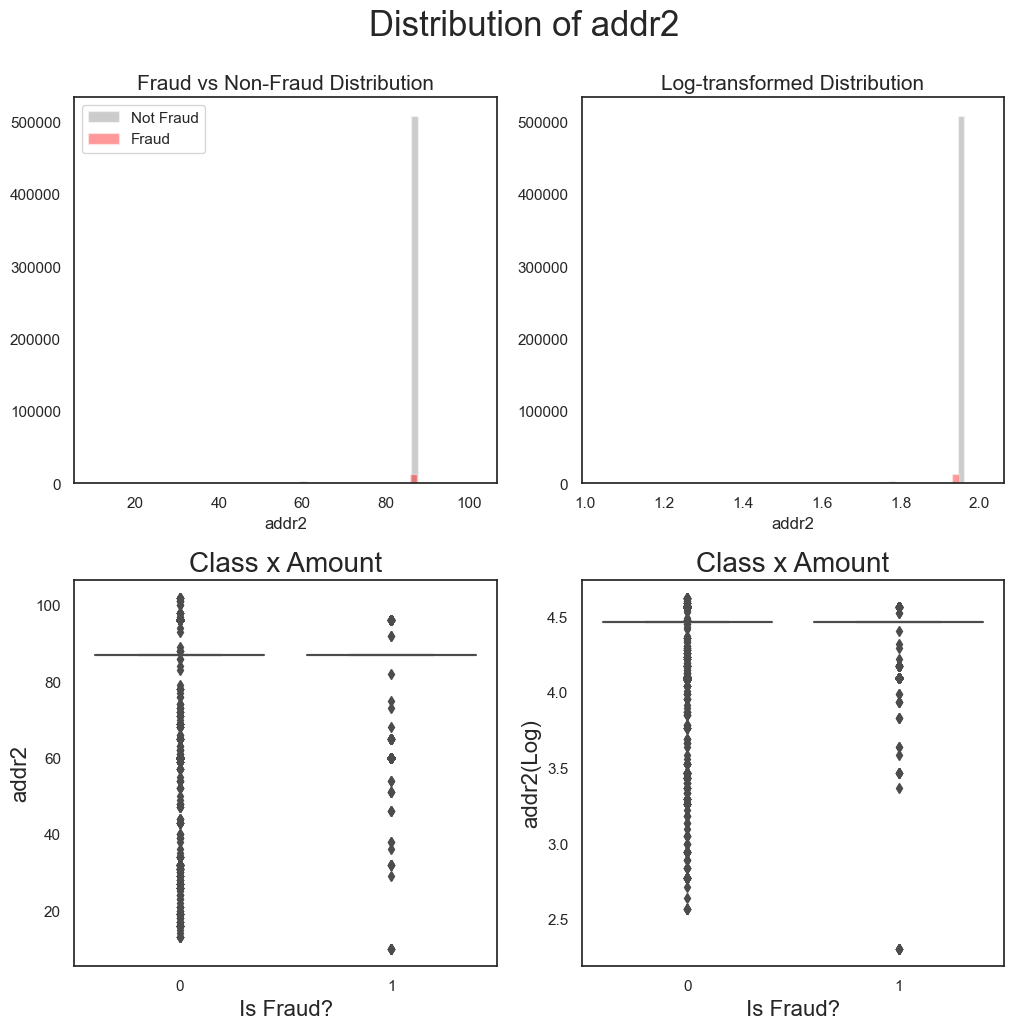

In [ ]:
numerical_plots(df=train_df, column='addr1')
numerical_plots(df=train_df, column='addr2')

The same situation is with card numeric and address columns. The analysis here won't say us much. But maybe connecting those features together may help.<br>
This issue will be taken into consideration in chapter 8.

## 7.4 Distance columns

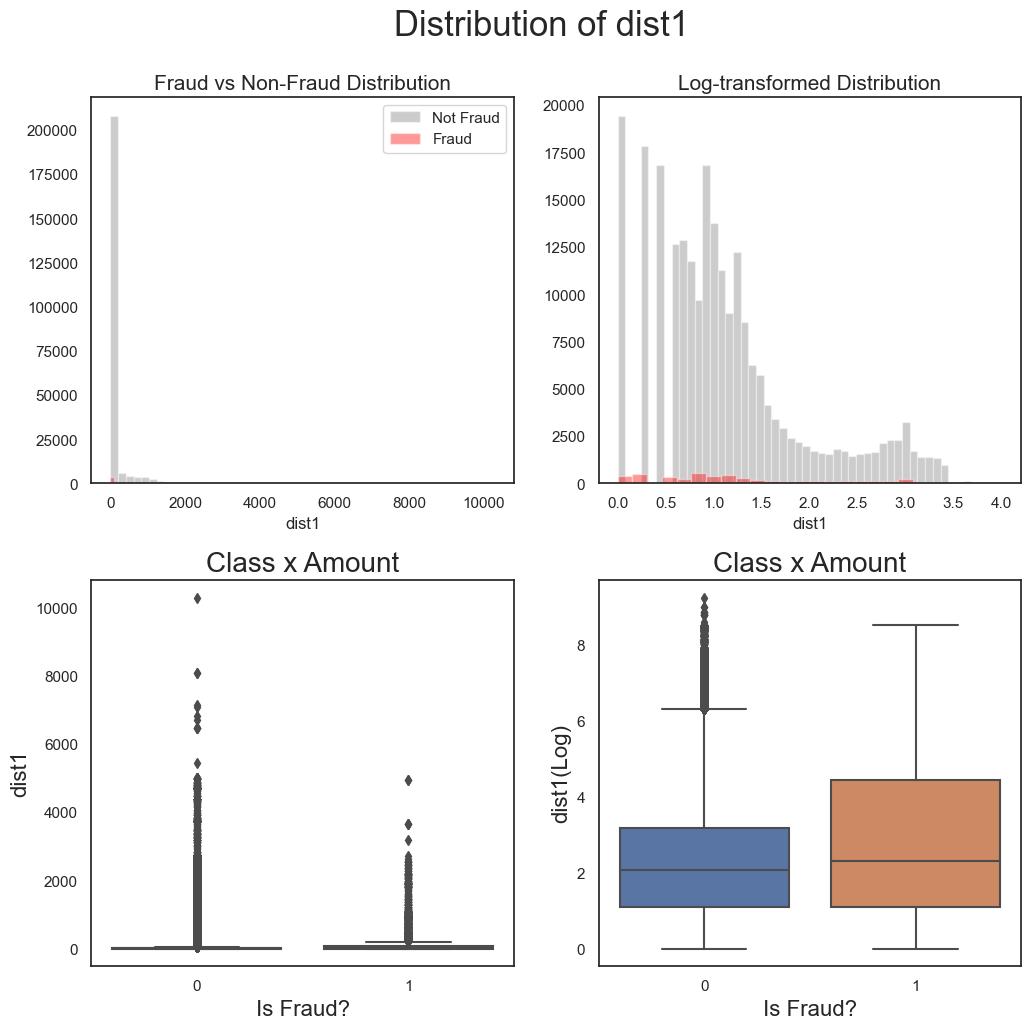

In [ ]:
numerical_plots(df=train_df, column='dist1')

Thanks to log transformation we see that the dist1 column is valuable and gives us much information.

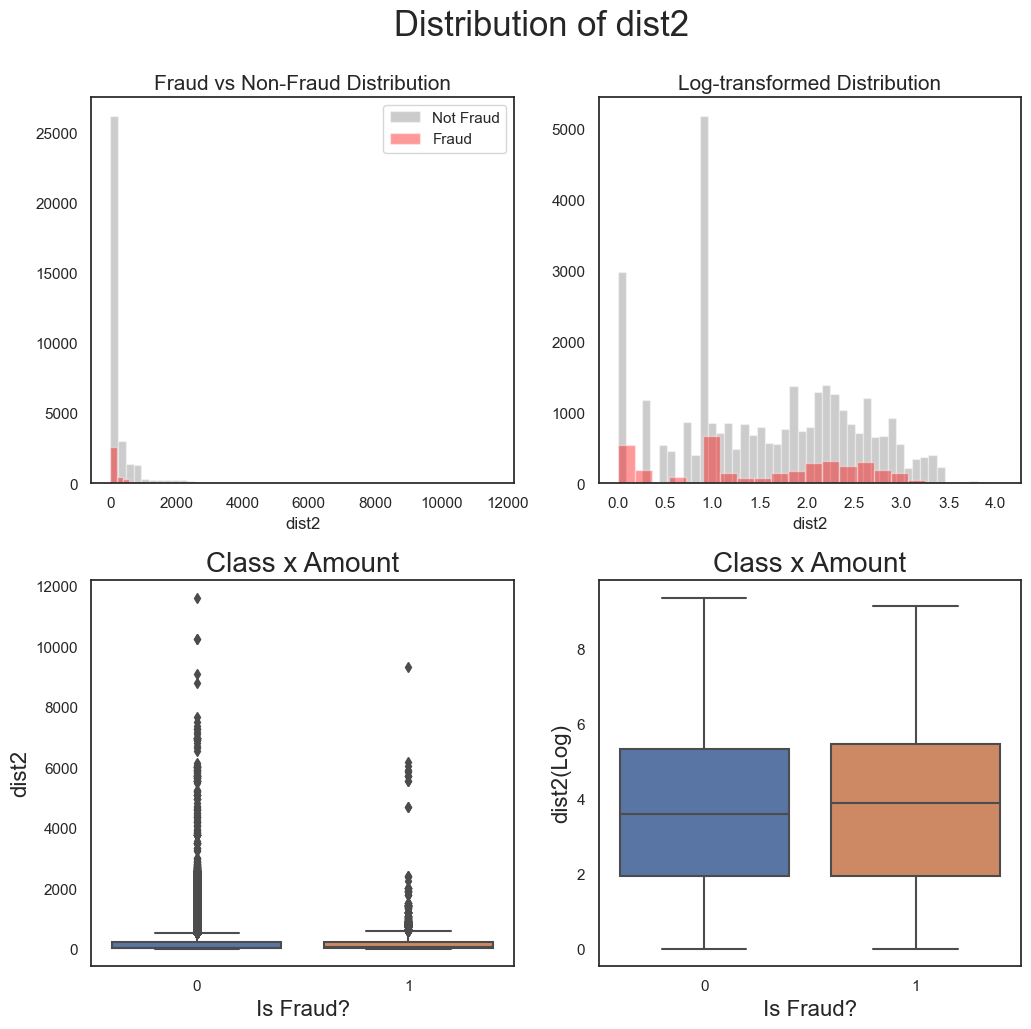

In [ ]:
numerical_plots(df=train_df, column='dist2')

In case of dist2 column distributions are rather similar.

## 7.5 C columns

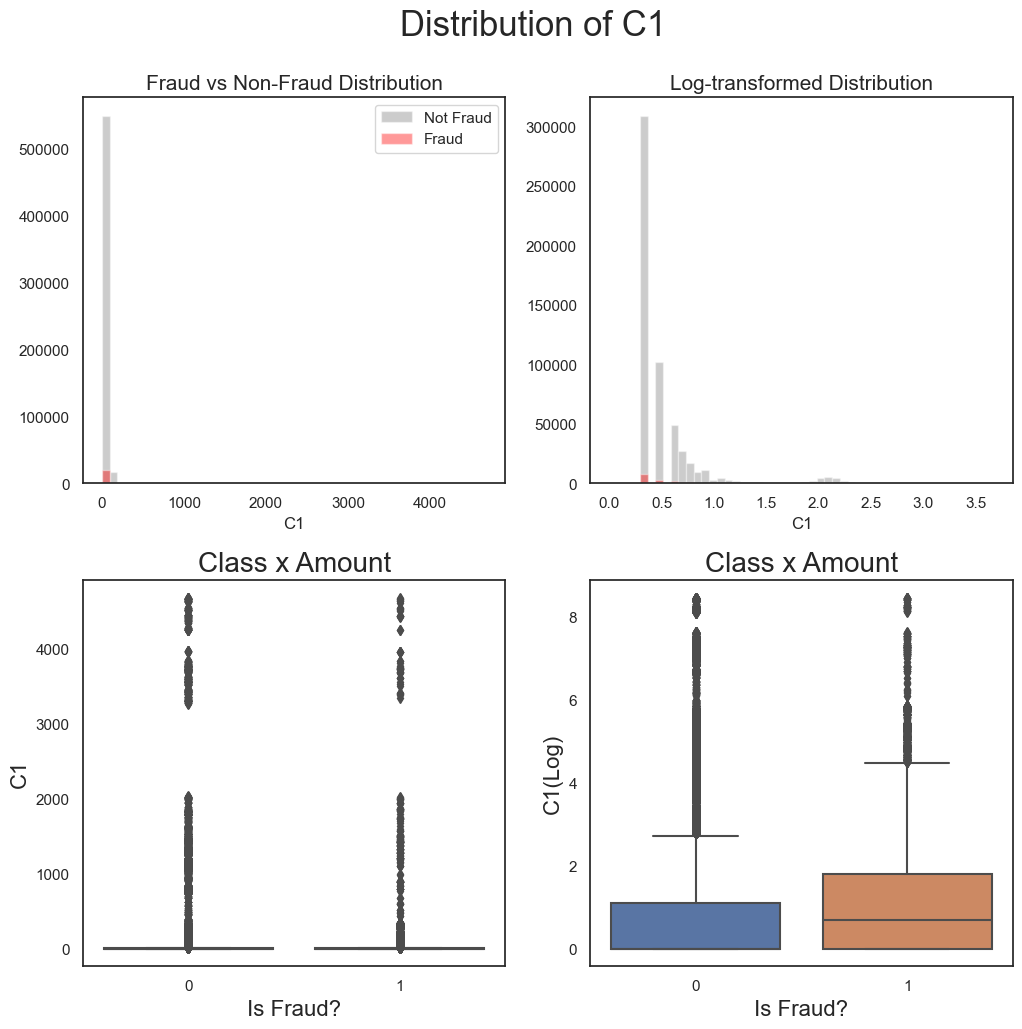

In [ ]:
numerical_plots(df=train_df, column='C1')

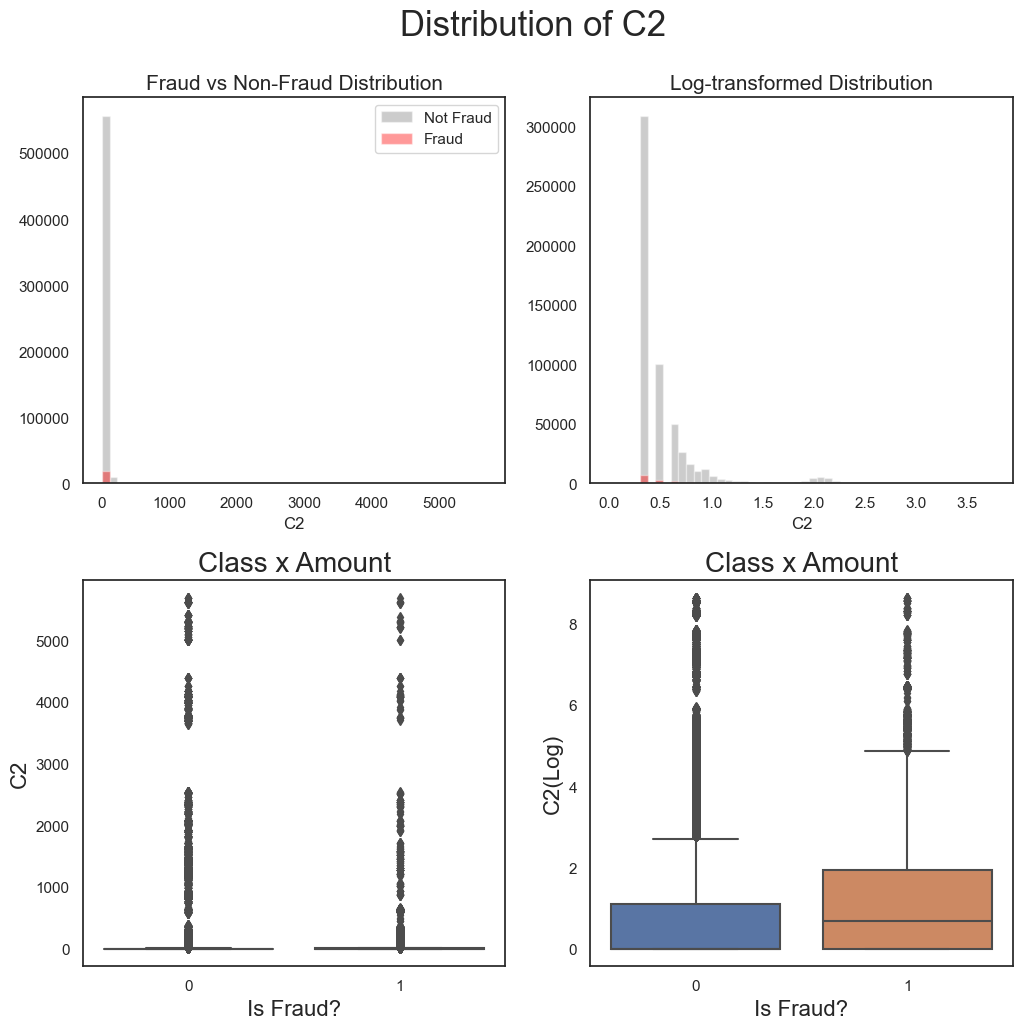

In [ ]:
numerical_plots(df=train_df, column='C2')

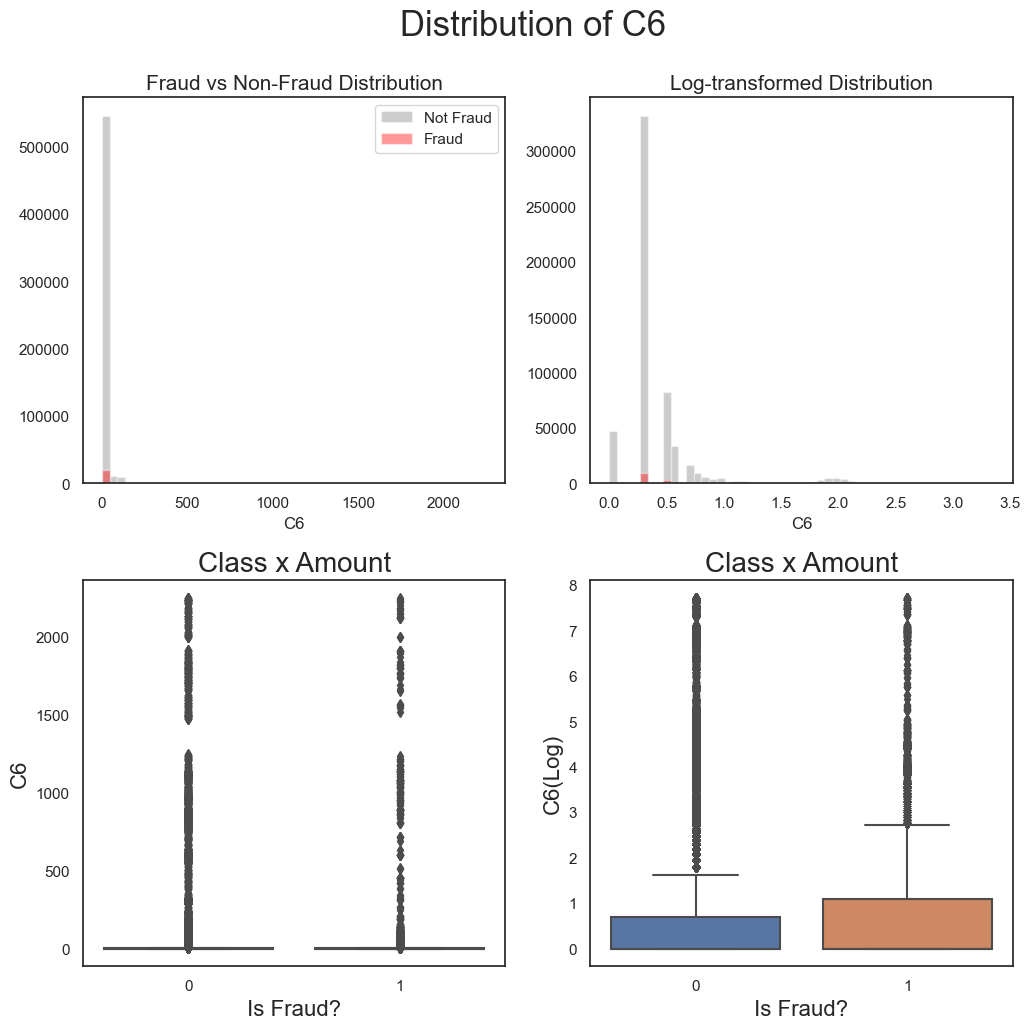

In [ ]:
numerical_plots(df=train_df, column='C6')

Those C columns seem to behave in an interesting way. <br>
The most interesting is the original C3 column, which takes higher values only when non-fraud.

## 7.6 D Columns

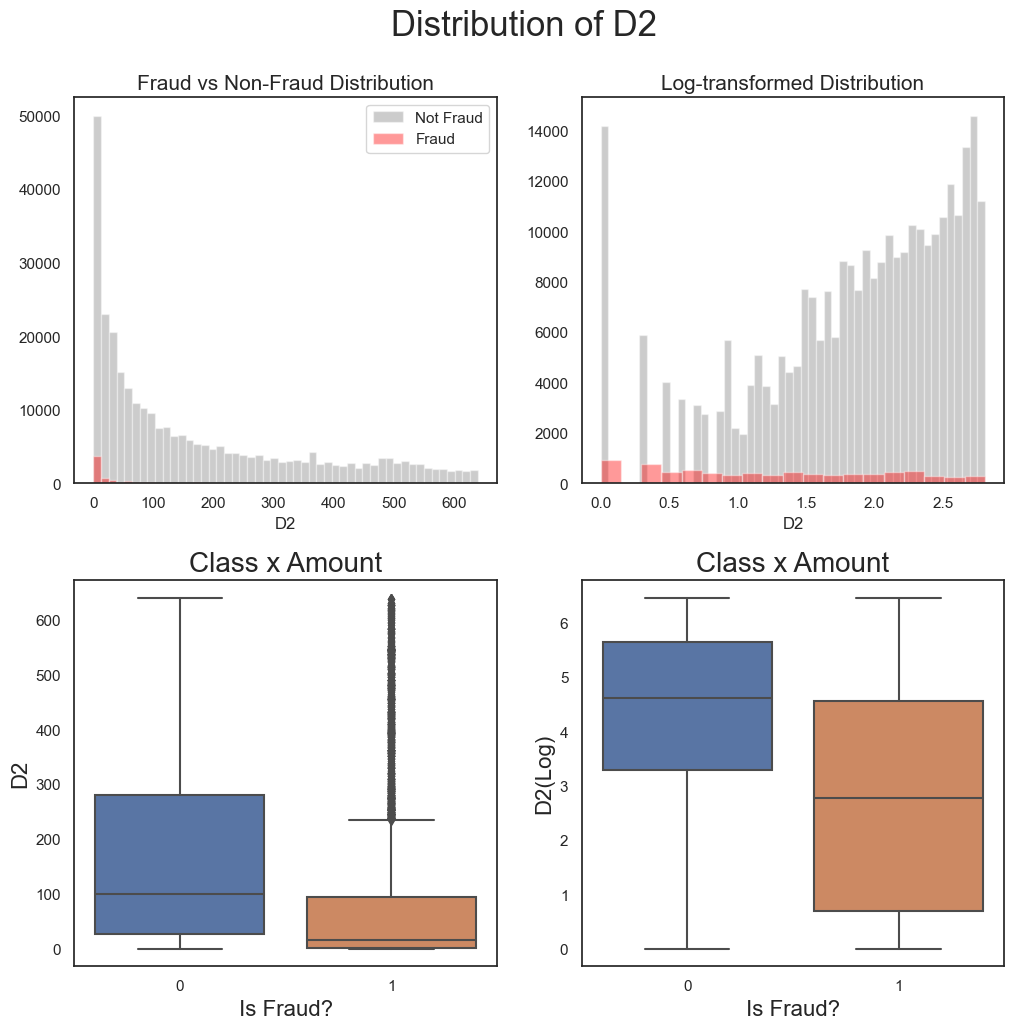

In [ ]:
numerical_plots(df=train_df, column='D2')

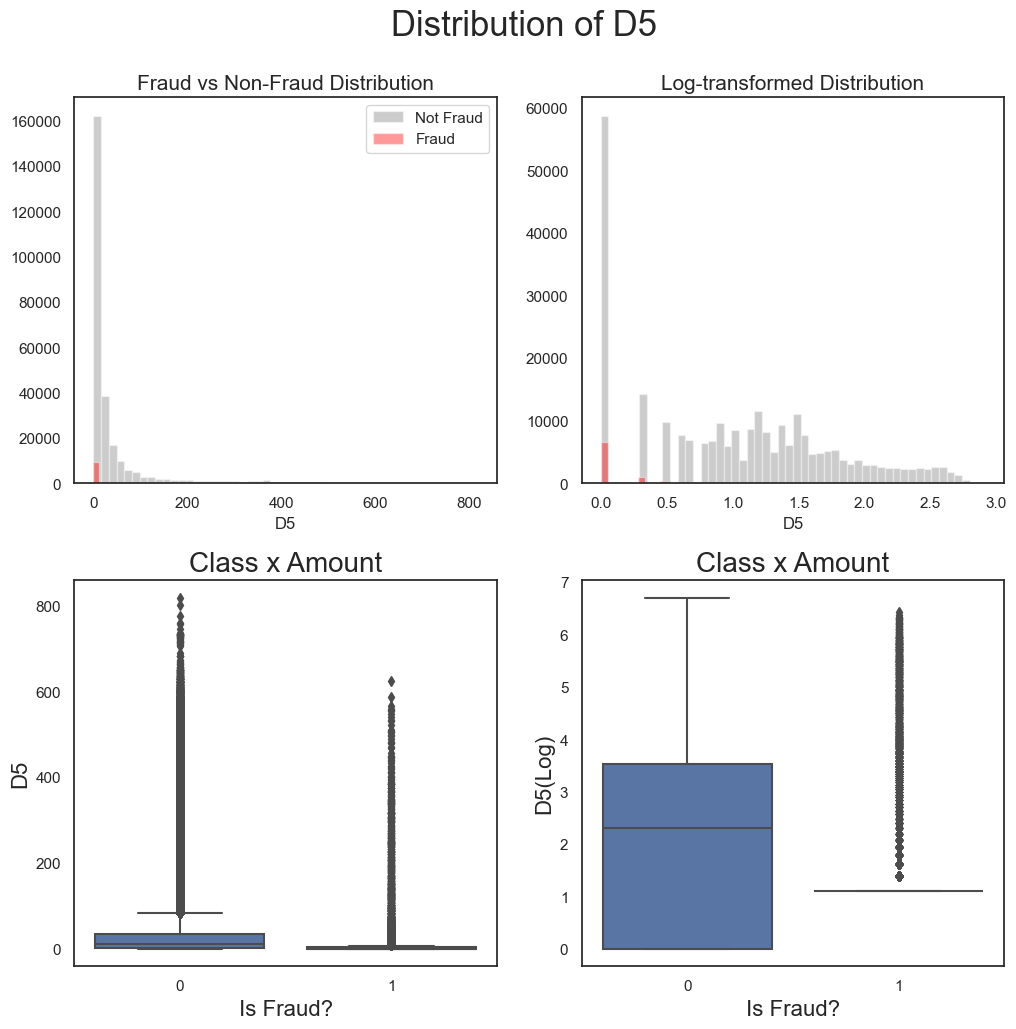

In [ ]:
numerical_plots(df=train_df, column='D5')

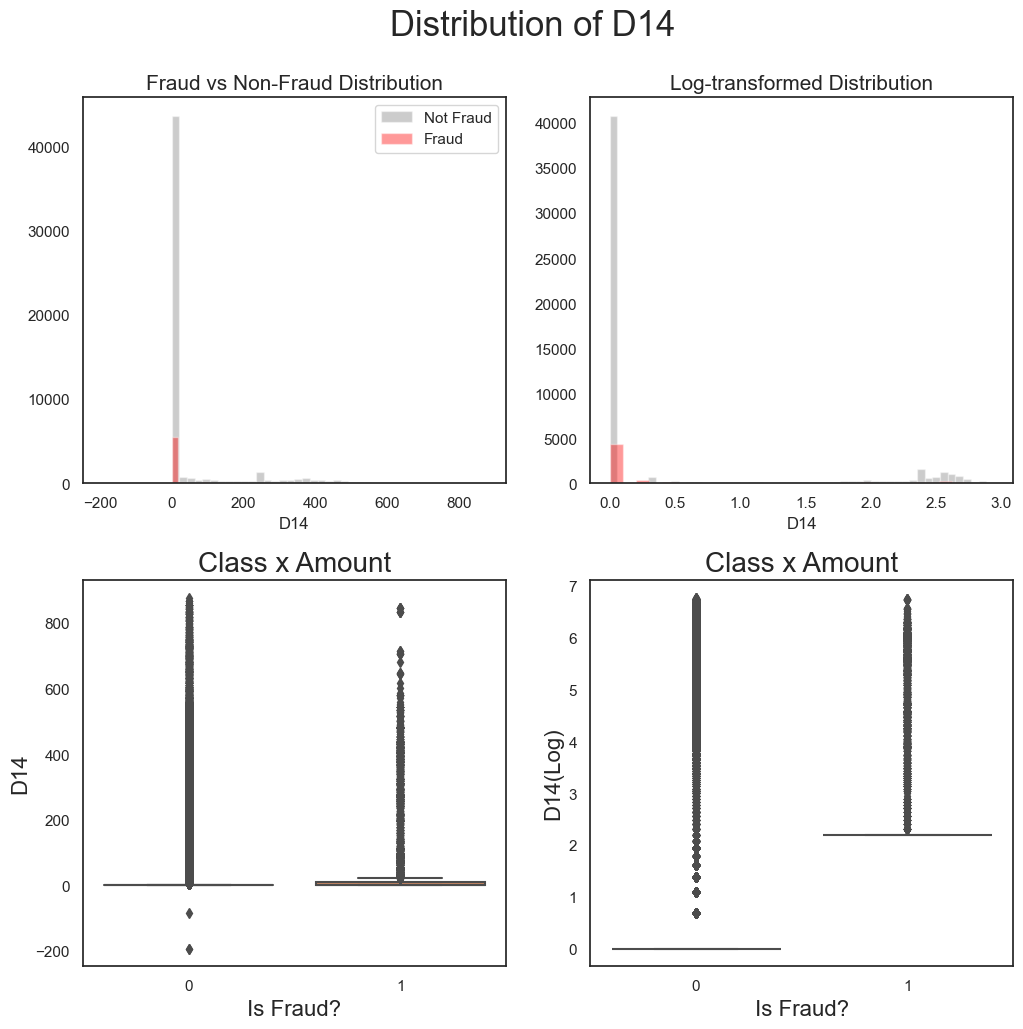

In [ ]:
numerical_plots(df=train_df, column='D14')

Among D features wide distribution may be observed. Some of them may be very useful. <br>
For example, D5 takes a wide range of values only when non_Fraud. <br>
On the other hand log(D2) takes a different distribution, which may be useful too.

Nevertheless, some research gave an answer, that D columns ate "time deltas" from some moment, till gathering the data.<br>
It means that values of D columns are increasing with time giving a false picture of values intended to be passed.<br>
The plot below shows how they are changing in time:

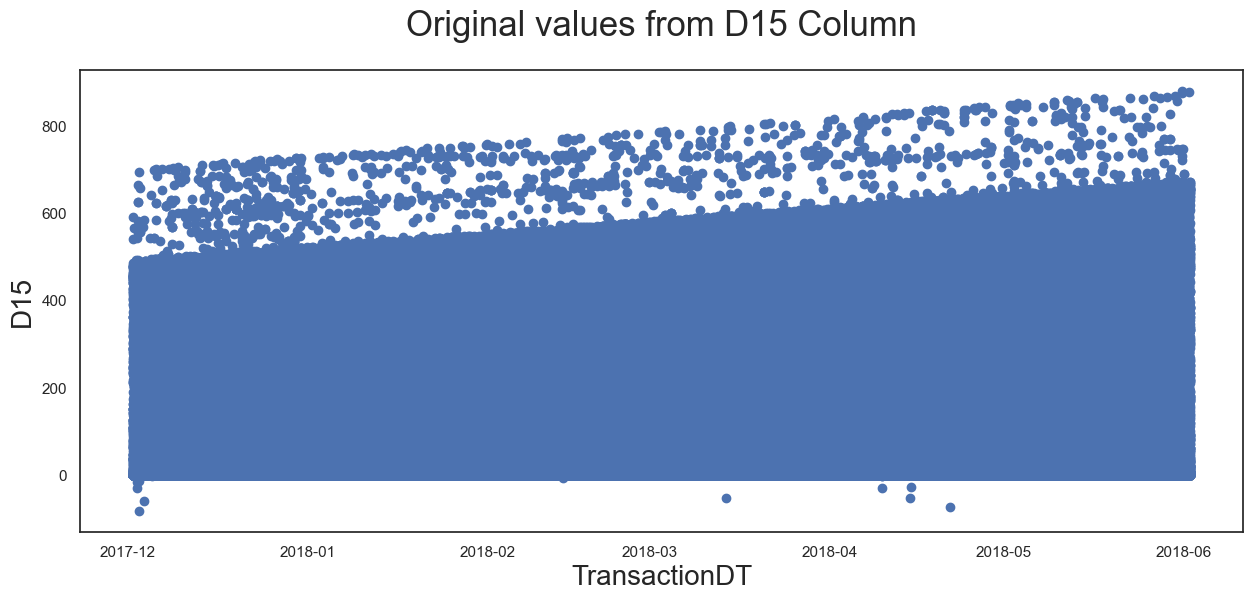

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(train_df.TransactionDT,train_df.D15)
plt.title('Original values from D15 Column', size=25, pad=25)
plt.xlabel('TransactionDT', size=20)
plt.ylabel('D15', size=20)
plt.show()

So transformation of D values by subtracting days, which passed from start of the experiment may actually help.

In [ ]:
for df in [train_df, test_df]:
    for i in range(1,16):
        if i in [1,2,3,5,9]: continue
        df['D'+str(i)] =  df['D'+str(i)] - df.TransactionDT_old/np.float32(24*60*60)

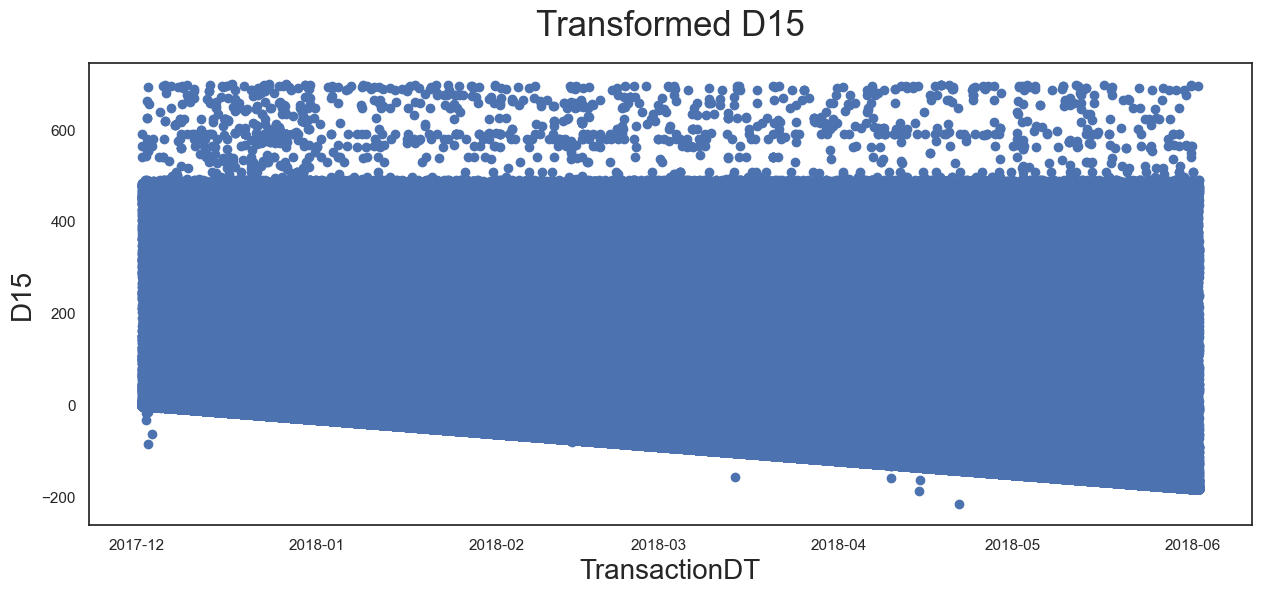

In [ ]:
# PLOT TRANSFORMED D
plt.figure(figsize=(15,6))
plt.scatter(train_df.TransactionDT,train_df.D15)
plt.title('Transformed D15', size=25, pad=20)
plt.xlabel('TransactionDT', size=20)
plt.ylabel('D15', size=20)
plt.show()

The plot above shows the transformed values of the D15 column. <br>
Now we can analyze plots of chosen D columns again:

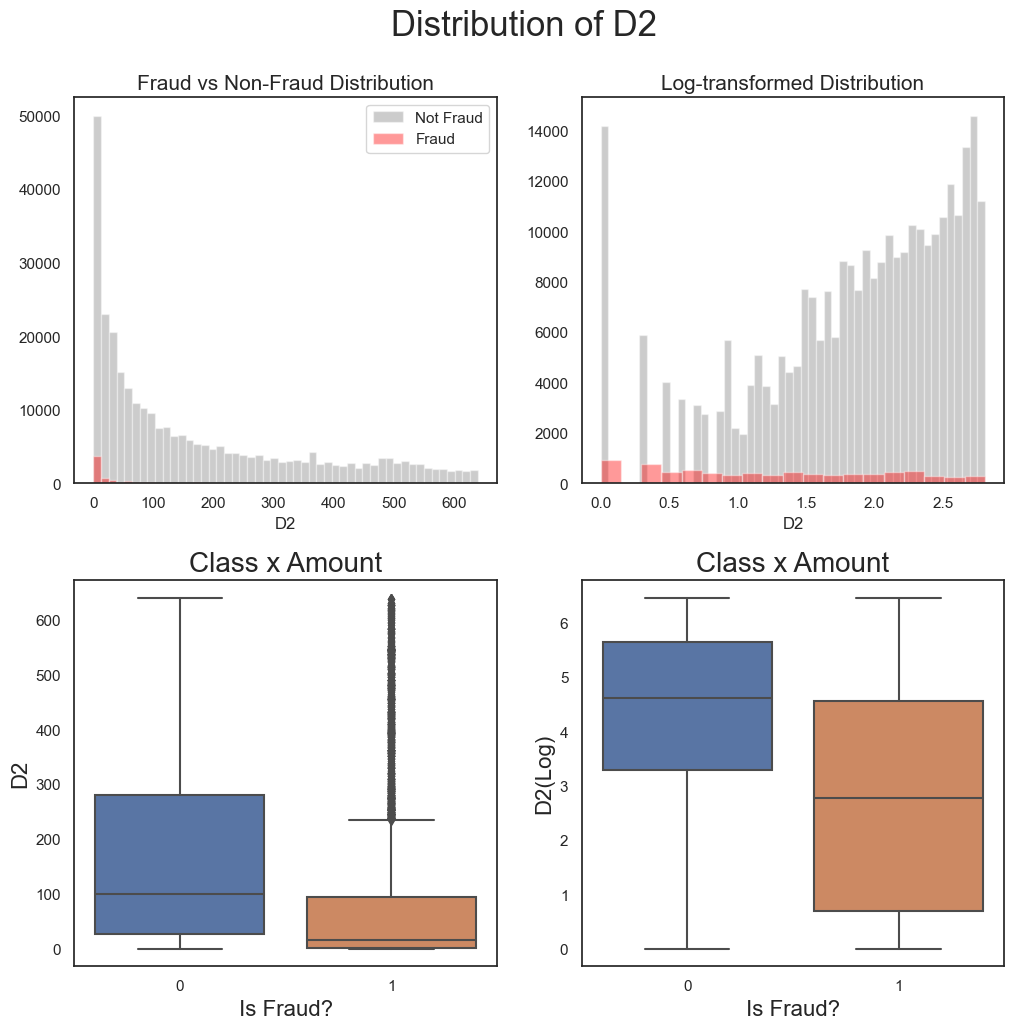

In [ ]:
numerical_plots(df=train_df, column='D2')

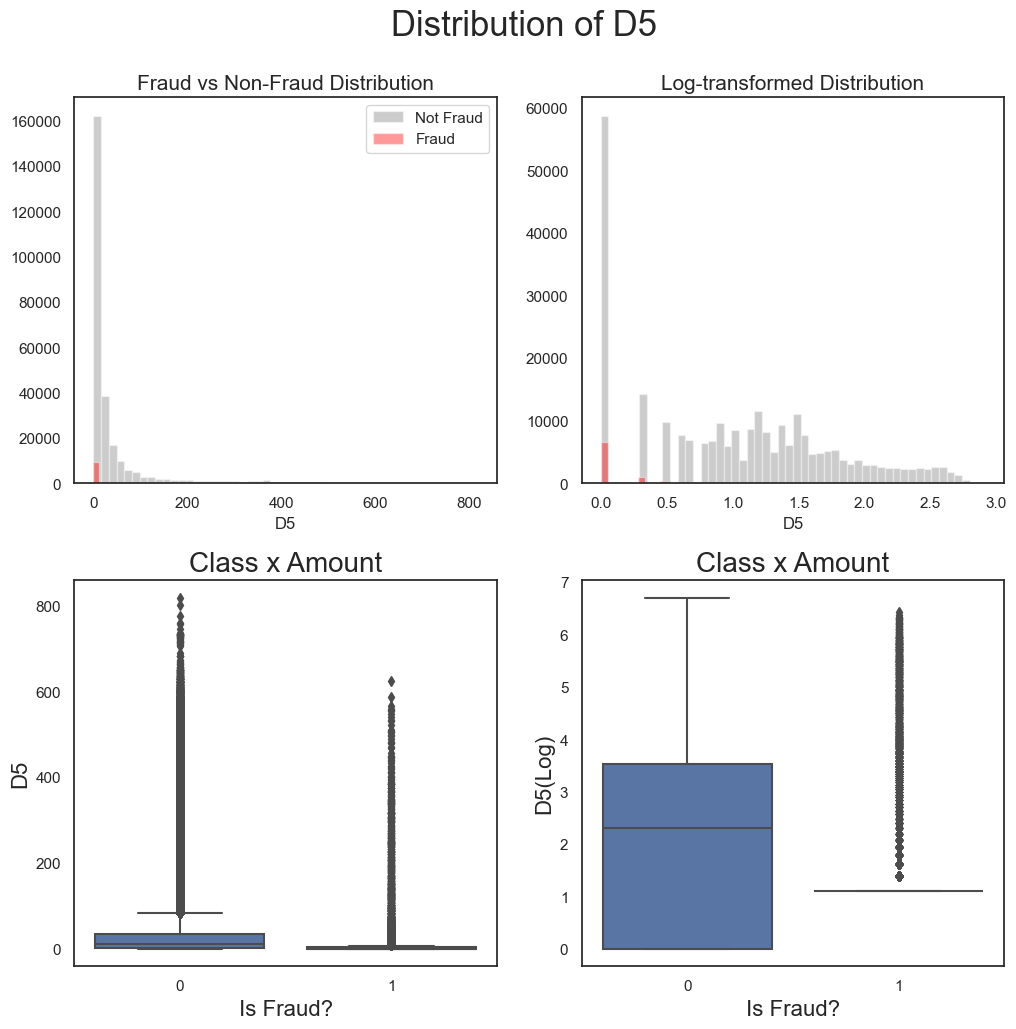

In [ ]:
numerical_plots(df=train_df, column='D5')

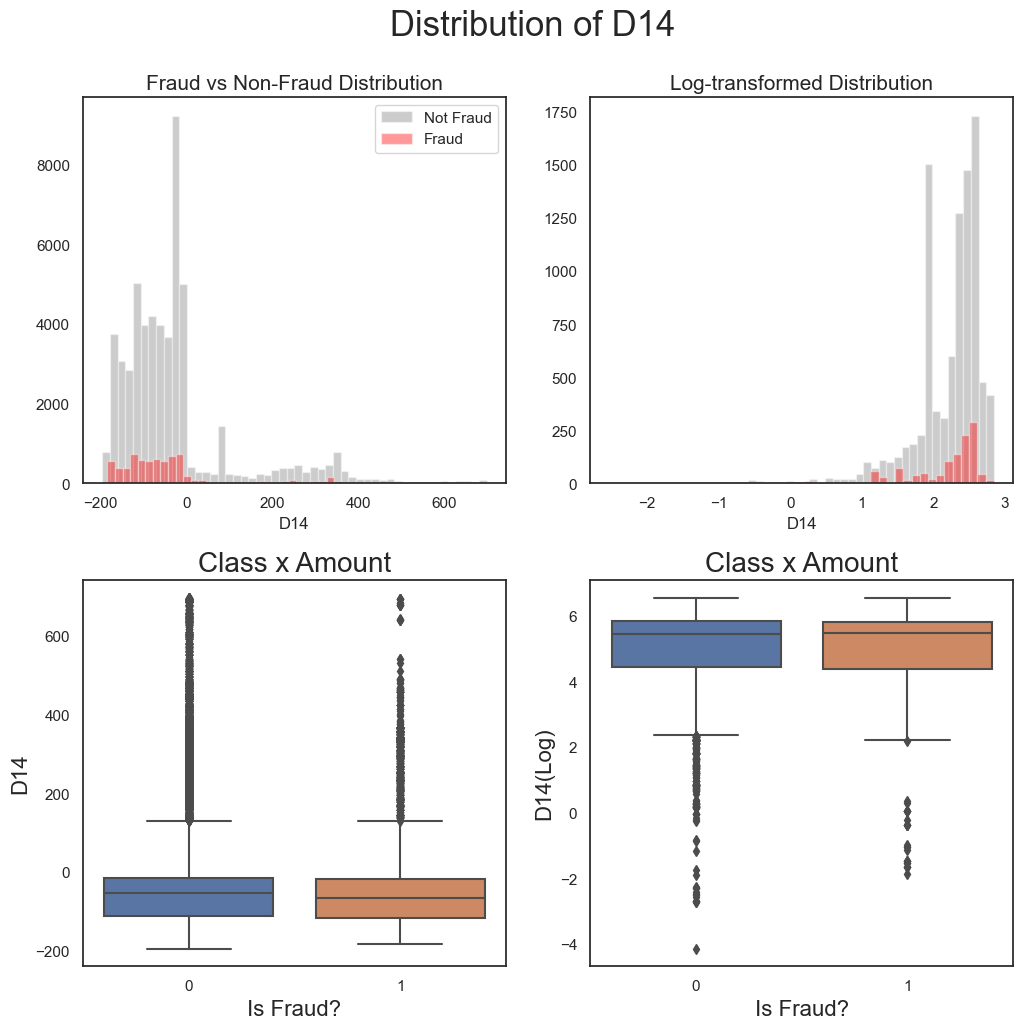

In [ ]:
numerical_plots(df=train_df, column='D14')

Now those values are much easier to be analyzed by model.

## 7.7 Transaction Amount with new tools

### 7.7.1 Decimal places (cents) analisys

The transaction amount was described before, but maybe there's more to pull from this column.

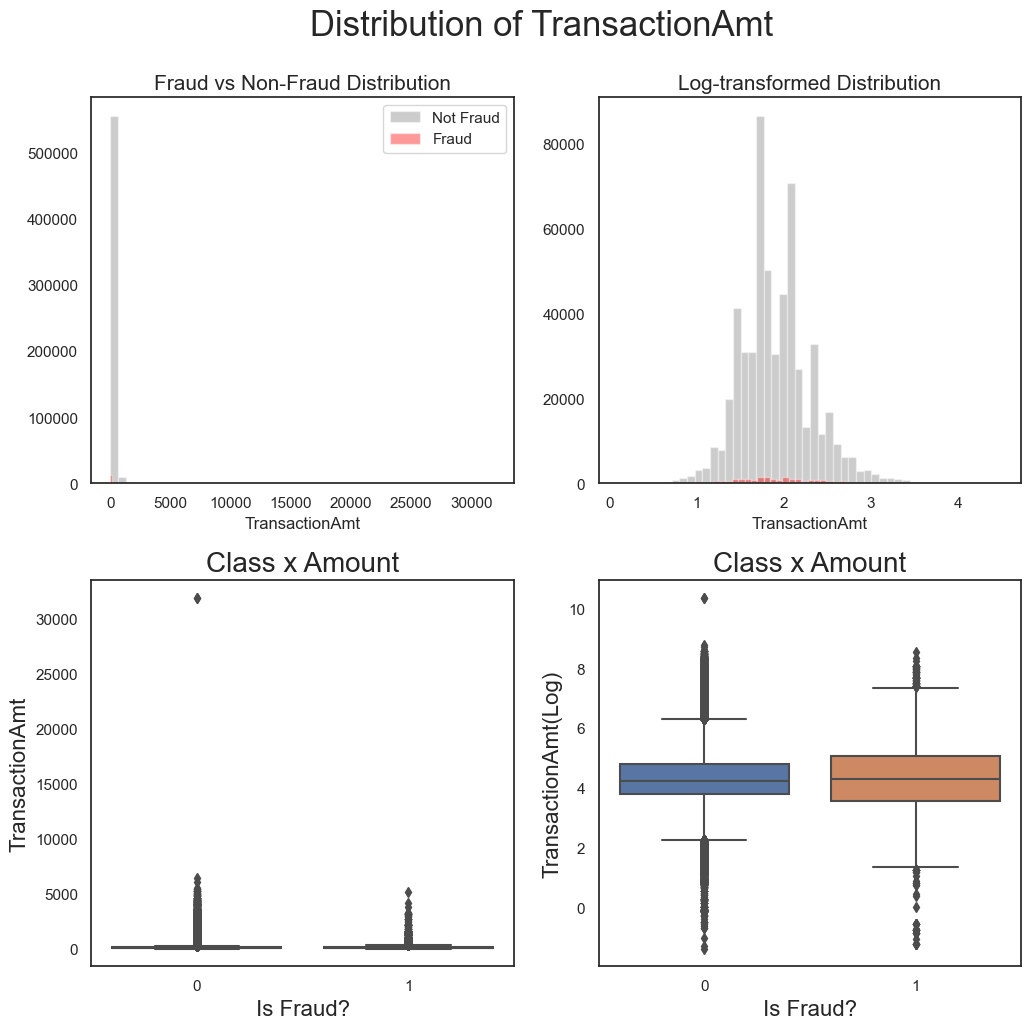

In [ ]:
numerical_plots(df=train_df, column='TransactionAmt')

Those plots didn't bring anything new, but maybe decimal places of the amount will be helpful somehow. <br>
They indicate the number of cents in the amount.

In [ ]:
train_df['TransactionAmt_cents'] = train_df['TransactionAmt'].apply(lambda x: math.modf(x)[0]*100)
test_df['TransactionAmt_cents'] = test_df['TransactionAmt'].apply(lambda x: math.modf(x)[0]*100)

In [ ]:
def density_plt(col, df=train_df):
    plt.figure(figsize=(14, 6))
    sns.kdeplot(df[df['isFraud'] == 0][col], label='isFraud 0');
    sns.kdeplot(df[df['isFraud'] == 1][col], label='isFraud 1');
    plt.title('Density plot of {}'.format(col), size=25, pad=20)
    plt.legend()

    plt.show()

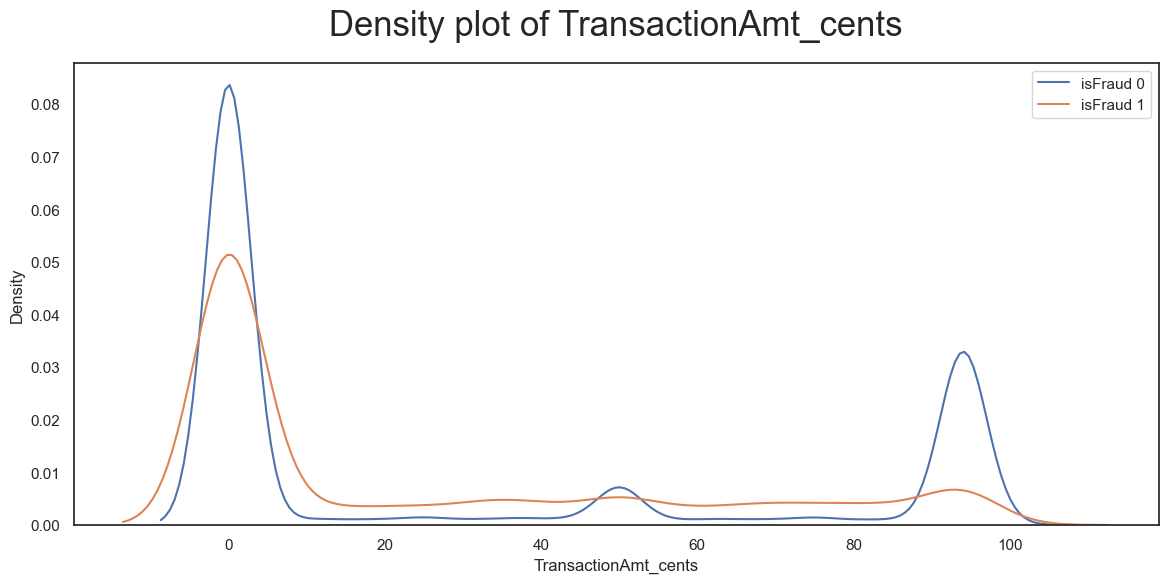

In [ ]:
density_plt('TransactionAmt_cents')

Some pattern here with density functions may be seen, so the feature shall be kept.

Another interesting thing here is the length of the new column. <br>
If there are 1 or 2 decimal places, then the transaction is from the US (or made in dollars).<br> 
On the other hand, when there are more decimal places, the transaction amount was exchanged from different currencies. Maybe this factor can be helpful.

In [ ]:
for df in [train_df, test_df]:
    df['TransactionAmt_not_exchanged'] = df['TransactionAmt_cents'].apply(lambda x: (x).is_integer()).astype('category')


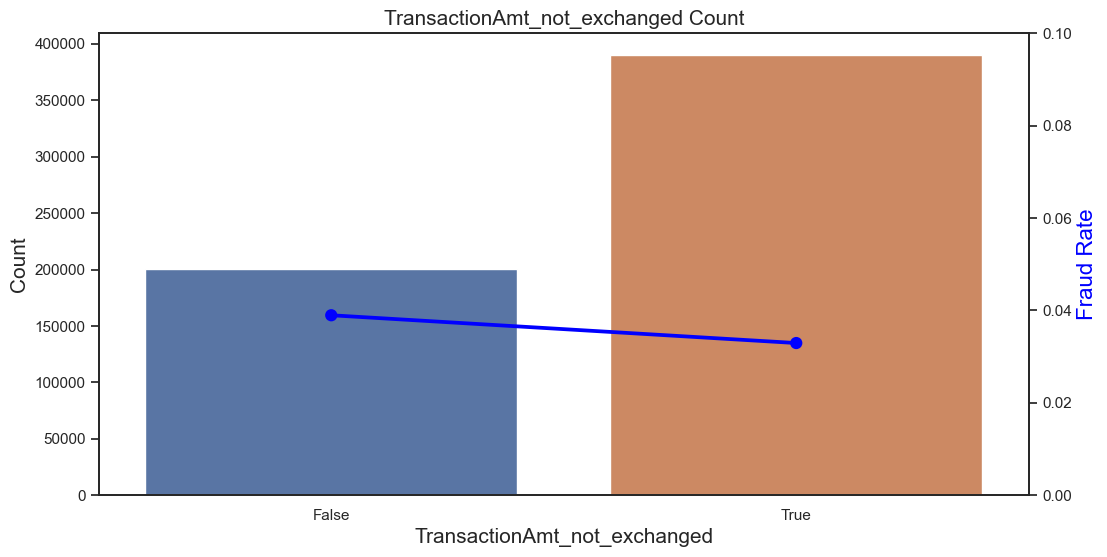

In [ ]:
plt.figure(figsize=(12,6))
    
g = sns.countplot(x = 'TransactionAmt_not_exchanged', data = train_df)
g.set_title('{} Count'.format('TransactionAmt_not_exchanged'), fontsize = 15)
g.set_xlabel("{}".format('TransactionAmt_not_exchanged'), fontsize=15)
g.set_ylabel("Count", fontsize=15)

variable_fraud_rate = train_df.groupby('TransactionAmt_not_exchanged')['isFraud'].value_counts(normalize = True).unstack()[1]

r = g.twinx()
r = sns.pointplot(x = list(variable_fraud_rate.index), y = variable_fraud_rate, color = "blue")
r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")
r.set_ylim(0, 0.1)

plt.show()

This plot isn't such a success. We see, that there are much more transactions in dollars or rounded.<br>
But they have a slightly lower fraud rate than transactions exchanged from different currencies.<br>
We will keep this factor because some information is given here, but it may be just deleted in the feature selection section.

### 7.7.2 Grouping analisys 

Another idea is to group transaction amounts by features related to payment. <br>
The most obvious feature is card1, but card4 work also just fine.

In [ ]:
for df in [train_df, test_df]:
    df['TransactionAmt_to_mean_card1'] = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('mean')
    df['TransactionAmt_to_mean_card4'] = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('mean')
    df['TransactionAmt_to_std_card1'] = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('std')
    df['TransactionAmt_to_std_card4'] = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('std')

In [ ]:
def density_plt_log(col, df=train_df):
    train_df['{}_log'.format(col)] = np.log(train_df[col])

    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    plt.suptitle('Density plots of {}'.format(col), size=25)
    plt.subplots_adjust(hspace=0.2)

    sns.kdeplot(df[df['isFraud'] == 0][col], label='isFraud 0', ax=ax[0])
    sns.kdeplot(df[df['isFraud'] == 1][col], label='isFraud 1', ax=ax[0])
    ax[0].set_title('TransactionAMT', size=20)
    ax[0].set_xlabel(" ", fontsize=15)
    ax[0].legend()

    sns.kdeplot(df[df['isFraud'] == 0]['{}_log'.format(col)], label='isFraud 0', ax=ax[1])
    sns.kdeplot(df[df['isFraud'] == 1]['{}_log'.format(col)], label='isFraud 1', ax=ax[1])
    ax[1].set_title('log(TransactionAMT)', size=20)
    ax[1].set_xlabel(" ", fontsize=15)
    ax[1].legend()

    plt.show()

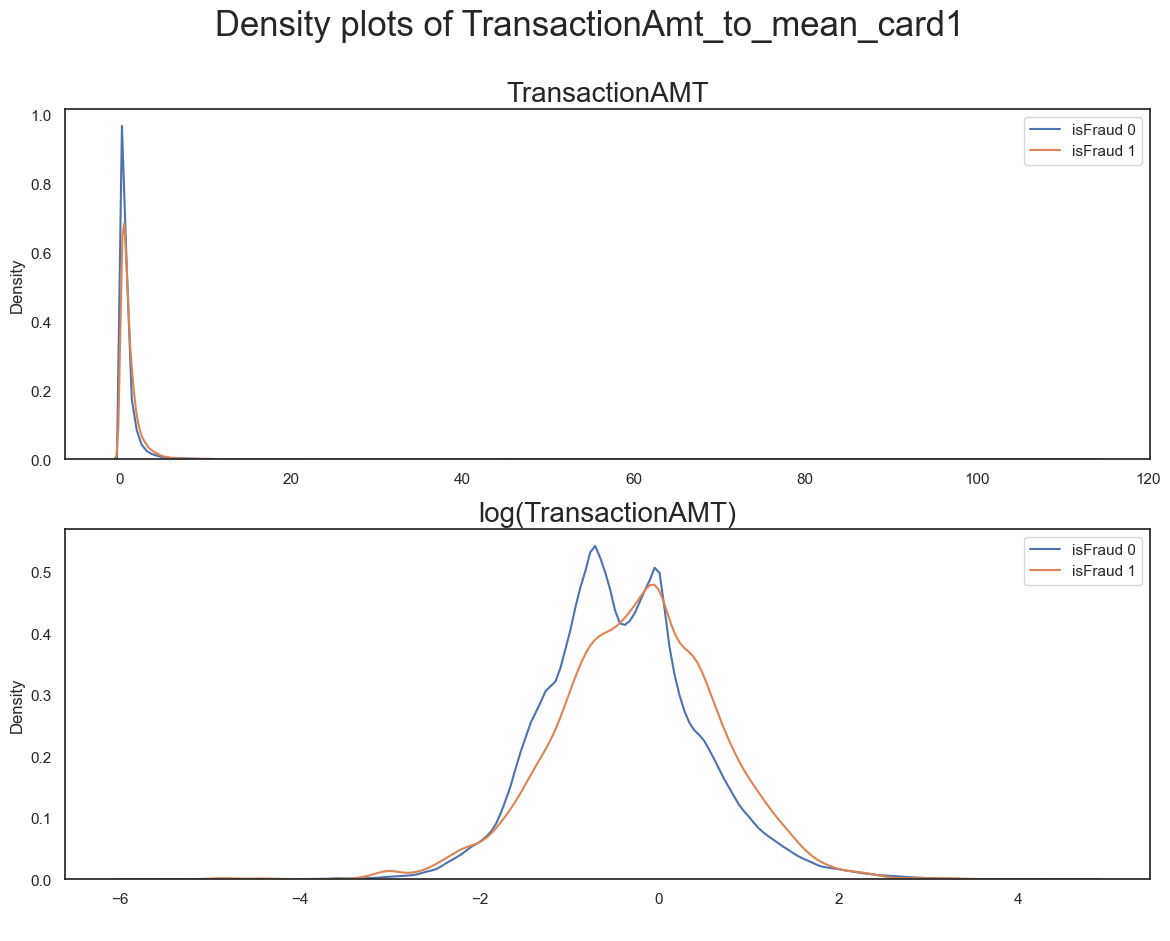

In [ ]:
density_plt_log('TransactionAmt_to_mean_card1')

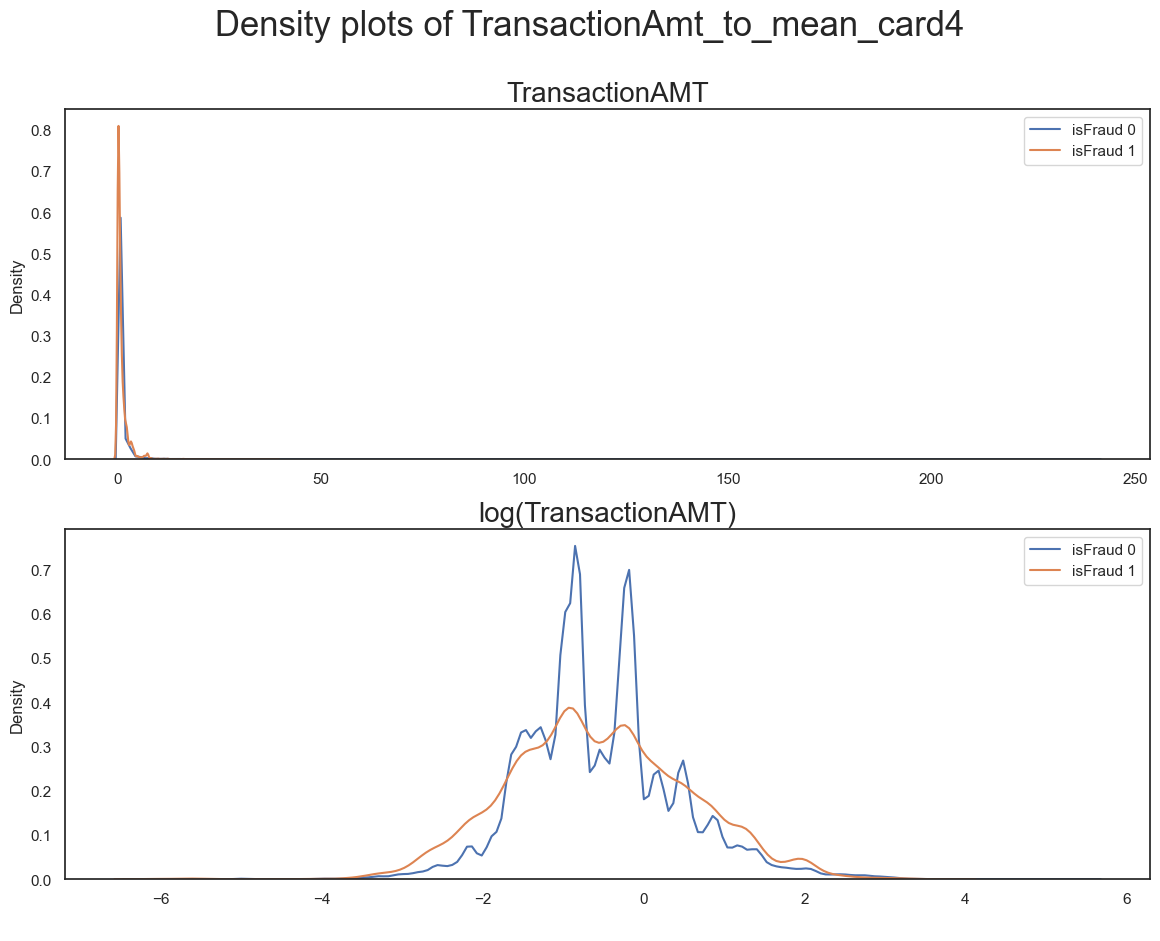

In [ ]:
density_plt_log('TransactionAmt_to_mean_card4')

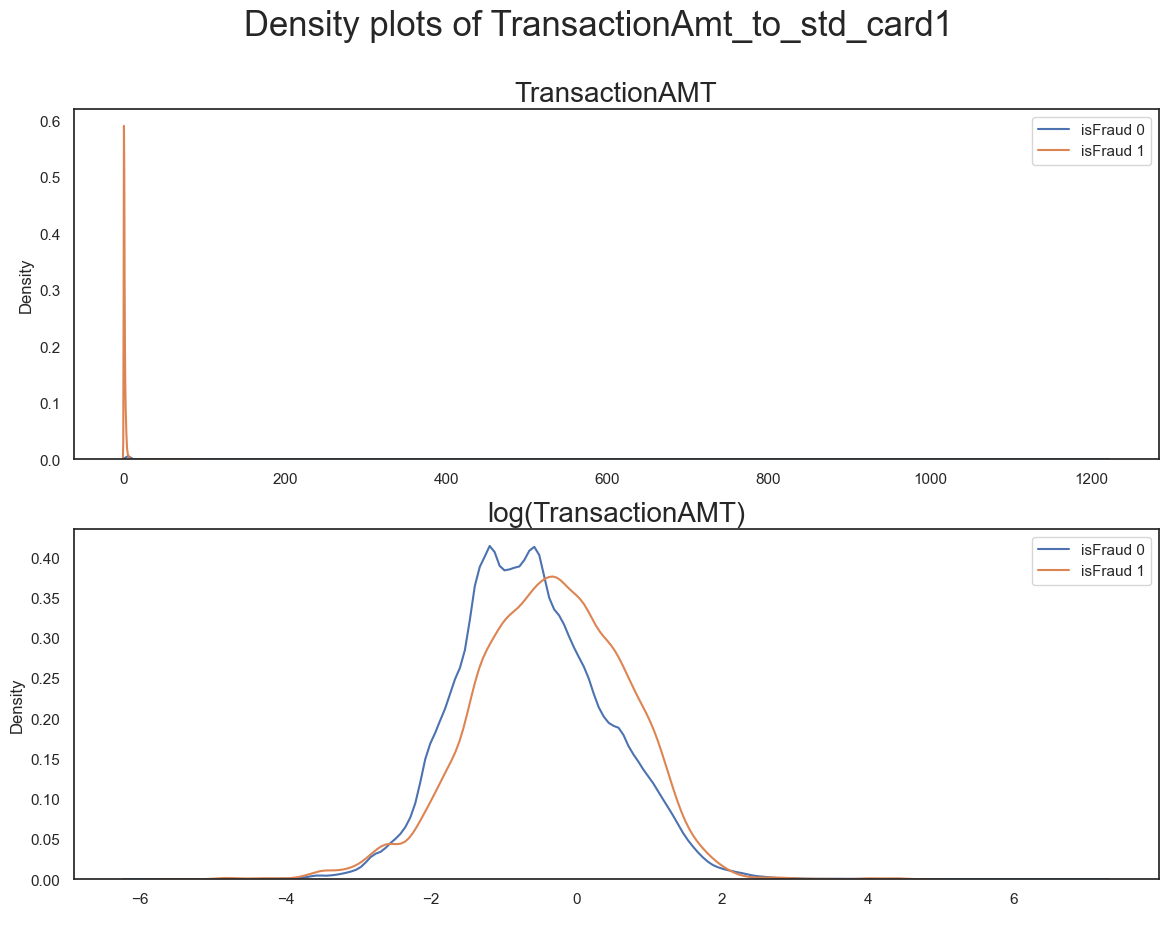

In [ ]:
density_plt_log('TransactionAmt_to_std_card1')

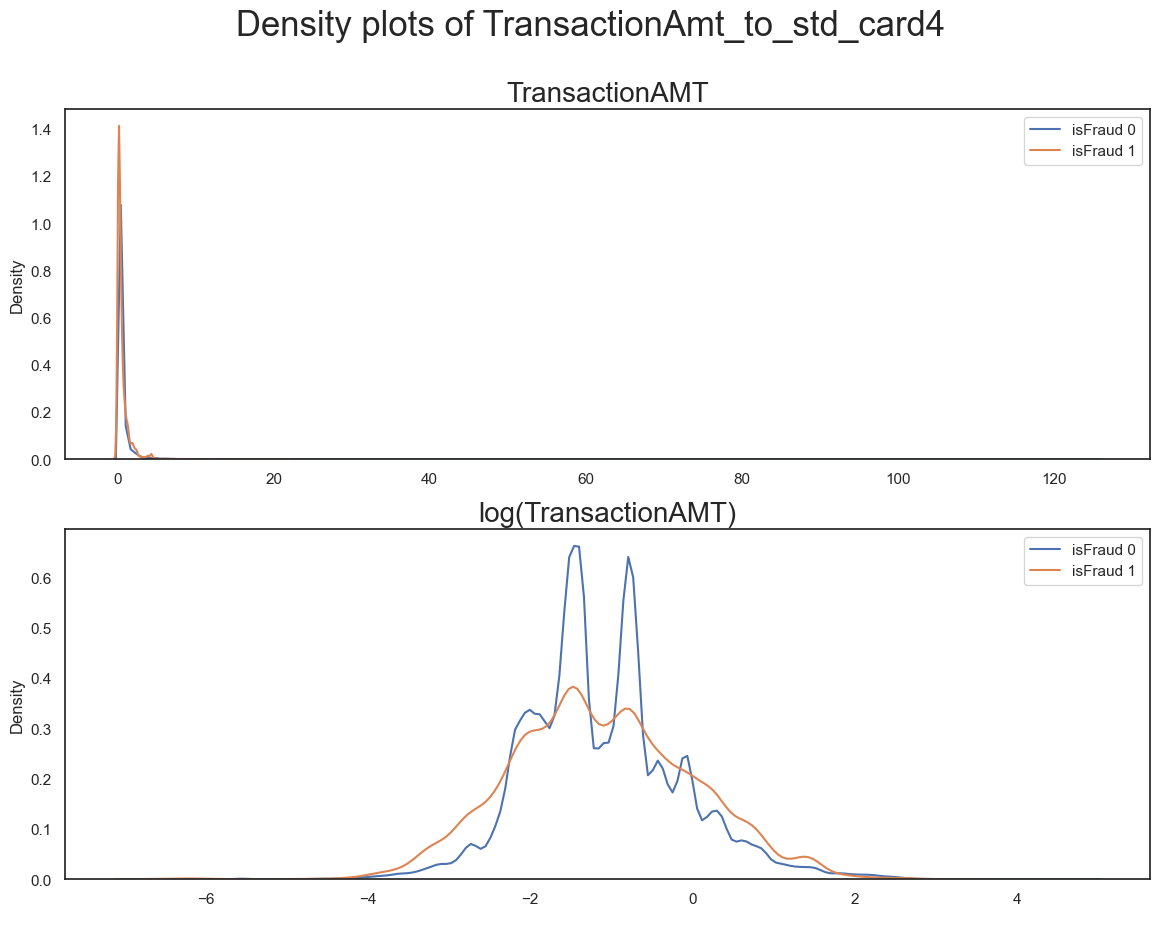

In [ ]:
density_plt_log('TransactionAmt_to_std_card4')

The Plots above may not be the most useful ones, but they definitely give us a message.<br>
And the message is that there is power in grouping and aggregating values.<br>
The next step will be to use this aggregation with id features.

# 8. Additional Columns

## 8.1 ID columns for aggregation

This is the moment when connecting columns together comes into place.<br>
From the information given by Vesta employees and deeper analysis comes a conclusion that columns: 'card1', 'card2', 'card3', 'card5', 'addr1', and 'addr2' give together a feature, which may be called an ID.<br>
This knowledge is powerful for 2 reasons:
* By knowing someone's (card) ID, we can easier track part of a fraud.
* We may use ID and some minor merged columns to introduce some aggregation (for example transaction amount) and gather even more from this information.

In [ ]:
for df in [train_df, test_df]:
    df['id1'] = df['card1'].astype(str)+'_'+df['card2'].astype(str)
    df['id1'] = df['id1'].astype('category')

    df['id2'] = df['id1'].astype(str)+'_'+df['card3'].astype(str)+'_'+df['card5'].astype(str)
    df['id2'] = df['id2'].astype('category')

    df['id3'] = df['id2'].astype(str)+'_'+df['addr1'].astype(str)+'_'+df['addr2'].astype(str)
    df['id3'] = df['id3'].astype('category')

    df['id4'] = df['id3'].astype(str)+'_'+df['P_emaildomain'].astype(str)
    df['id4'] = df['id4'].astype('category')

    df['id5'] = df['id3'].astype(str)+'_'+df['R_emaildomain'].astype(str)
    df['id5'] = df['id5'].astype('category')

    df['bank_type'] = df['card3'].astype(str) +'_'+ df['card5'].astype(str)
    df['bank_type'] = df['bank_type'].astype('category')

ids_all = ['id1', 'id2', 'id3', 'id4', 'id5', 'bank_type']


So few factors have been created, such as bank type and some IDs or groups of IDs.<br>
Now we may check do they give some valuable information.<br>
But not with them alone, because there will be too many unique values - they shall be deleted after all.<br>
Interesting is the aggregation performed on them. The aggregation is performed on the full dataset, not only the train table.

In [ ]:
def aggregate_id(main_columns, uids, aggregation_type=['mean'], train_df=train_df, test_df=test_df, 
              fillna=True, usena=False, plot=False):
    print('New column names:')
    aggregated_columnss = []
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregation_type:
                
                new_col_name = 'agg_'+main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                # This part would be used only when NaNs would be filled bu -1. it wont happen here, so it is taken out
                # if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                
                if fillna:
                    train_df[new_col_name].fillna(fill_nan,inplace=True)
                    test_df[new_col_name].fillna(fill_nan,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                aggregated_columnss.append(new_col_name)
    if plot: return(aggregated_columnss)

New column names:
'agg_TransactionAmt_id1_mean' , 'agg_TransactionAmt_id1_std' , 'agg_C4_id1_mean' , 'agg_C4_id1_std' , 'agg_C10_id1_mean' , 'agg_C10_id1_std' , 'agg_D10_id1_mean' , 'agg_D10_id1_std' , 'agg_D15_id1_mean' , 'agg_D15_id1_std' , 

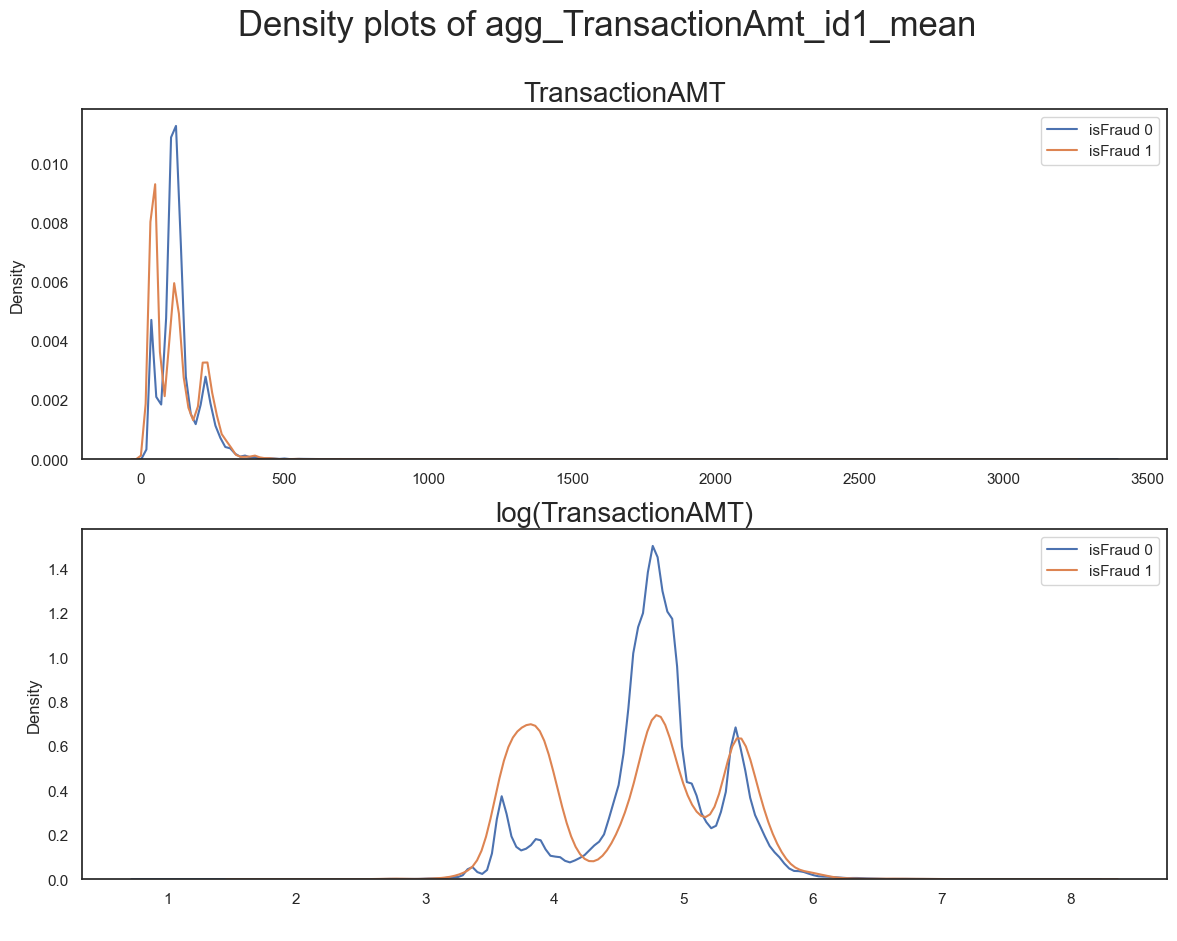

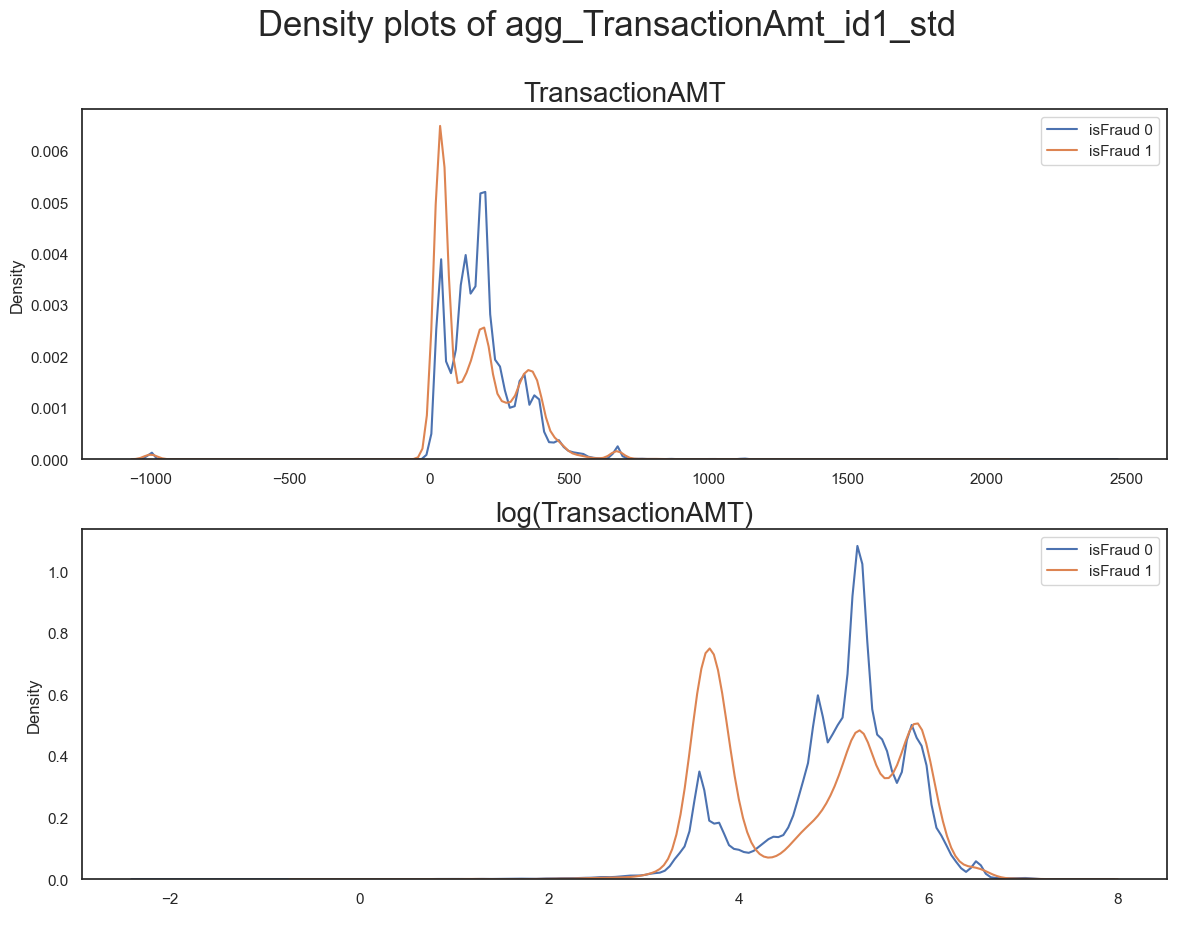

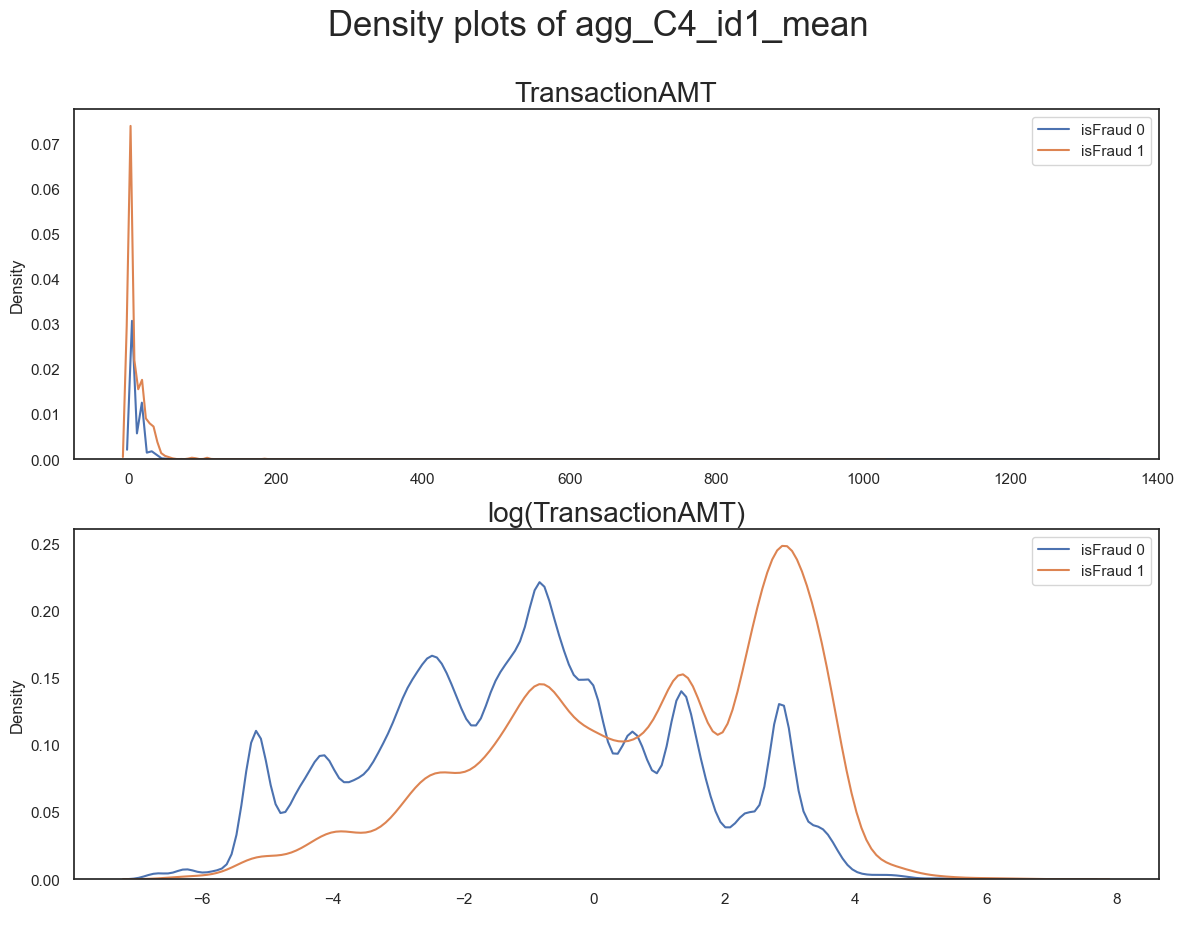

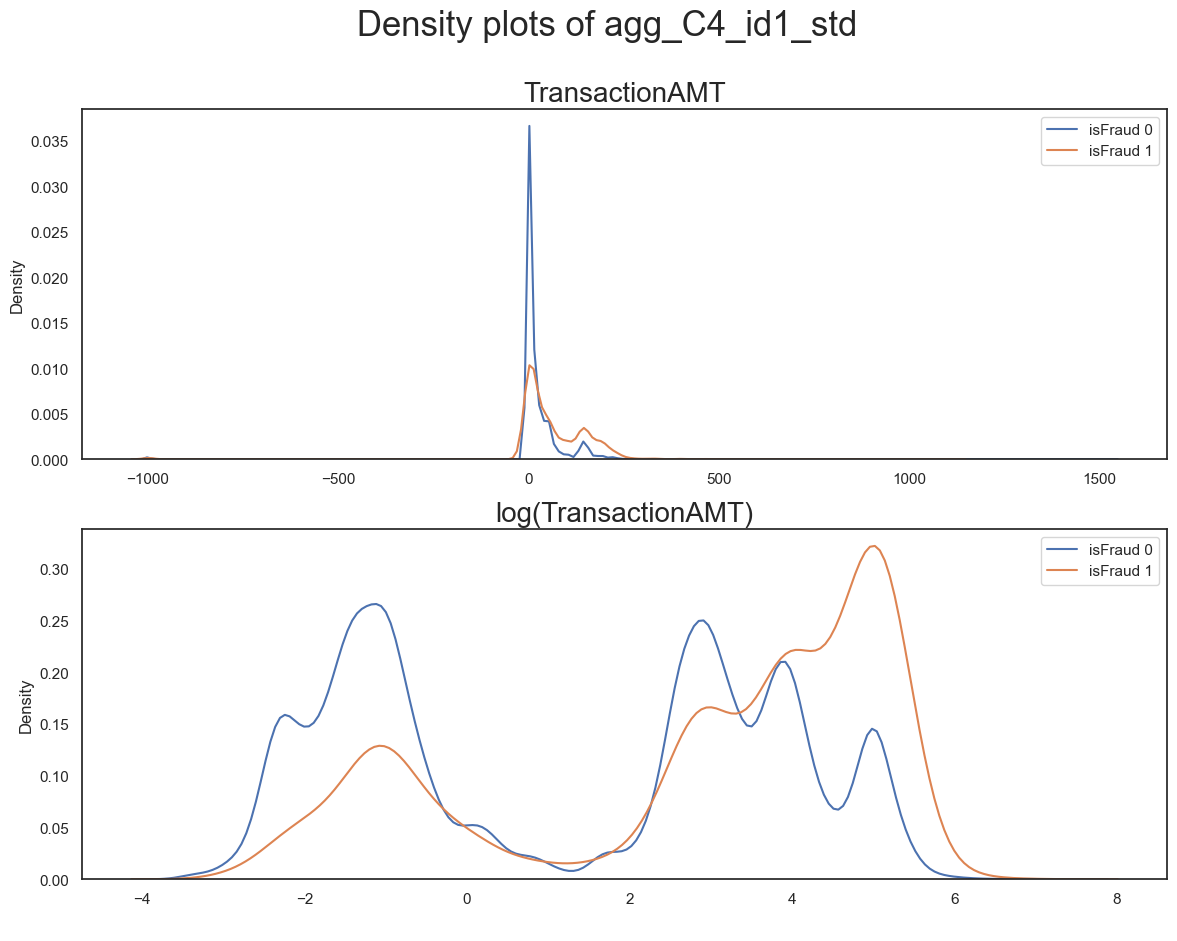

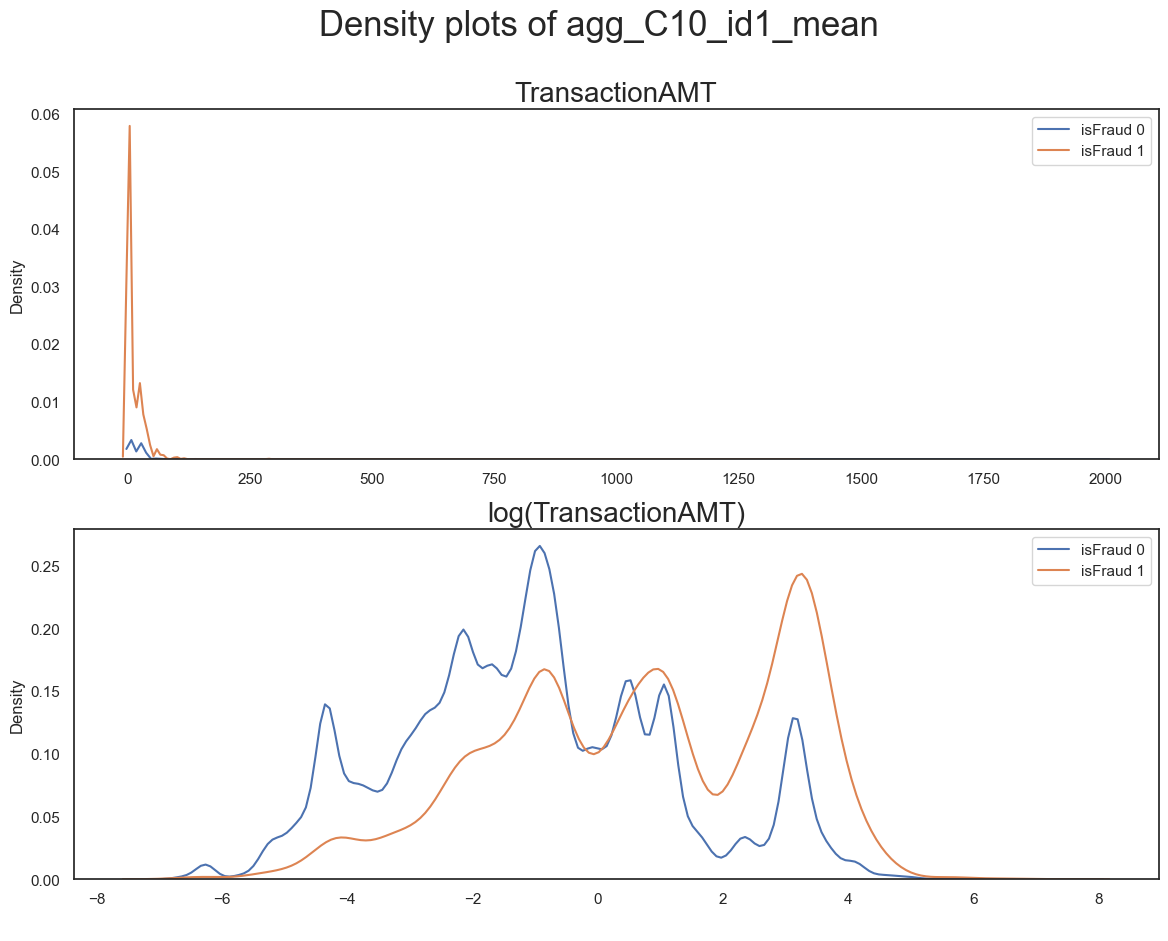

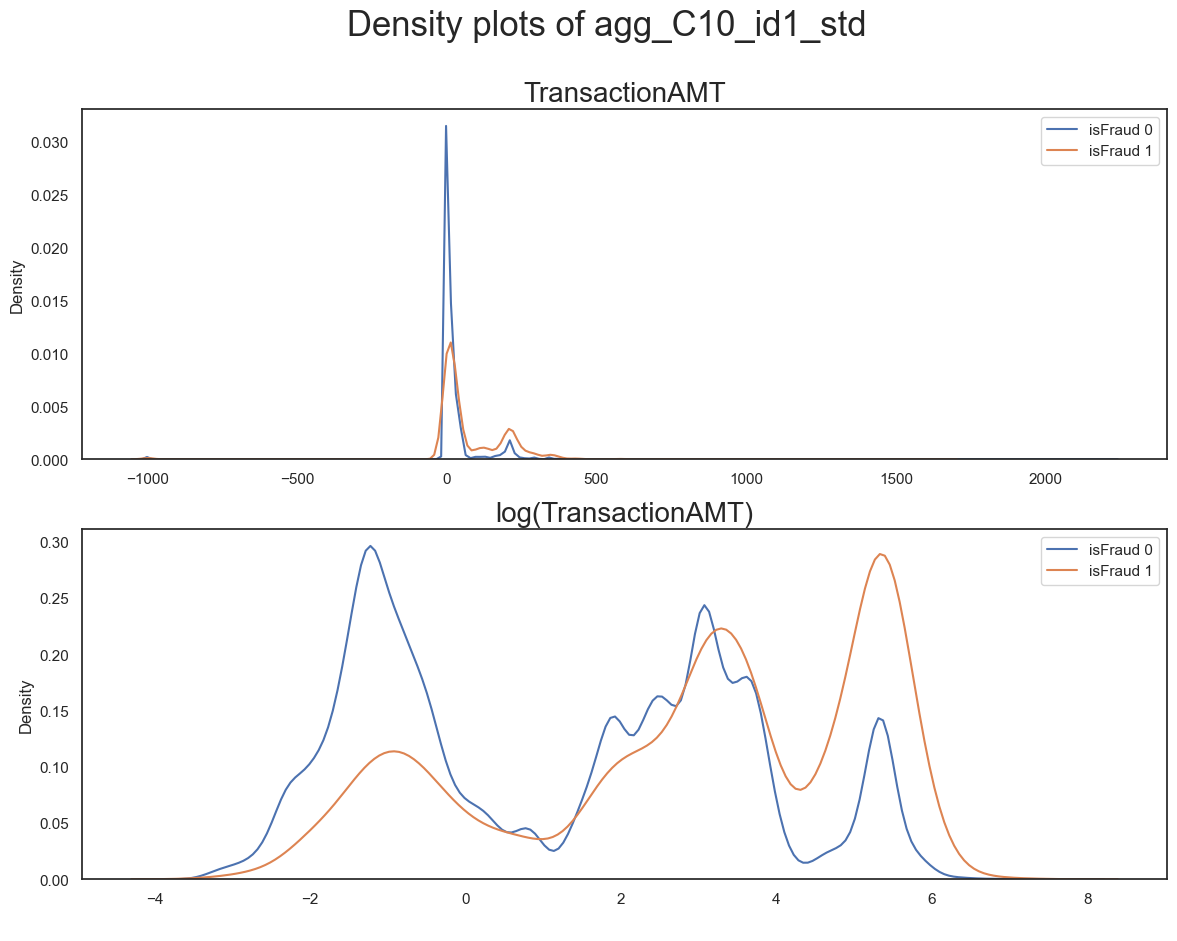

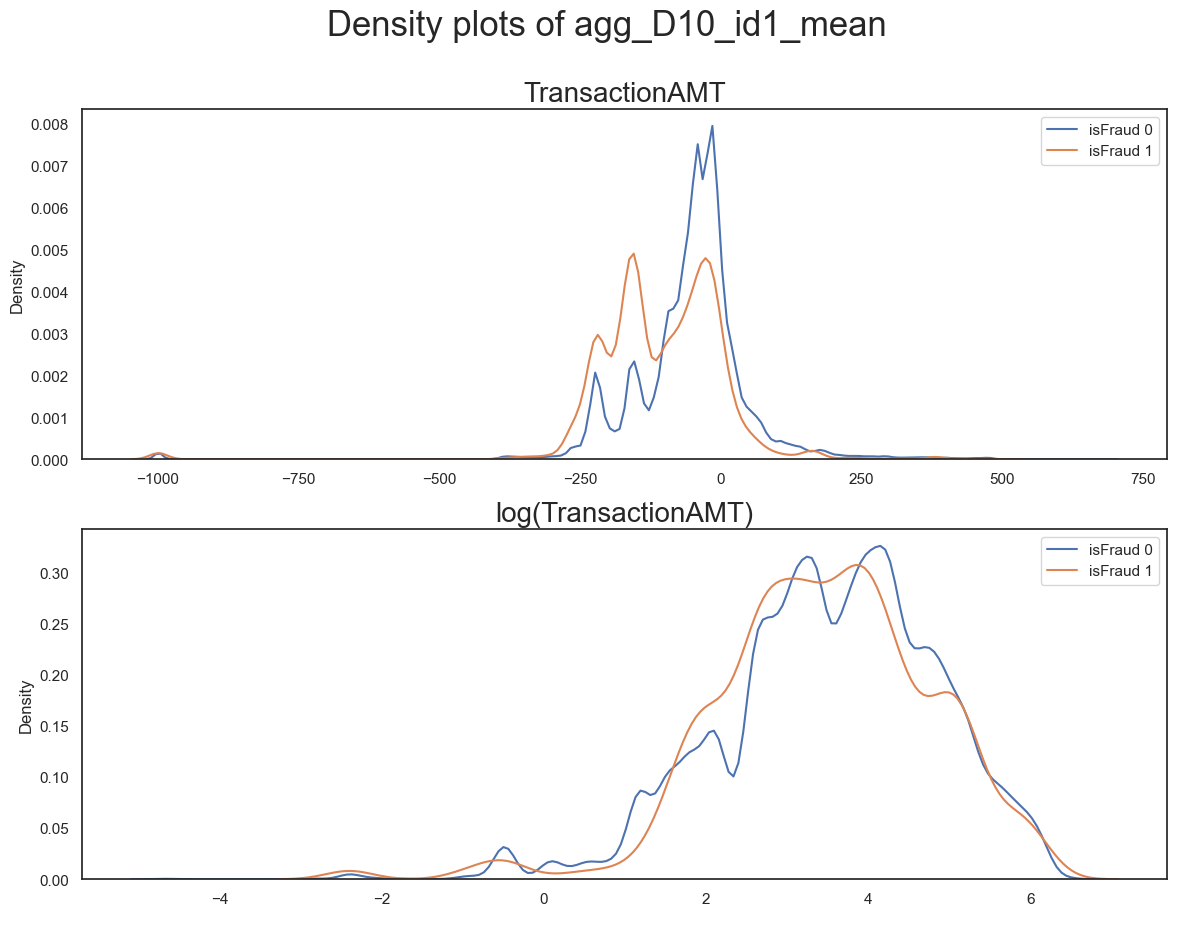

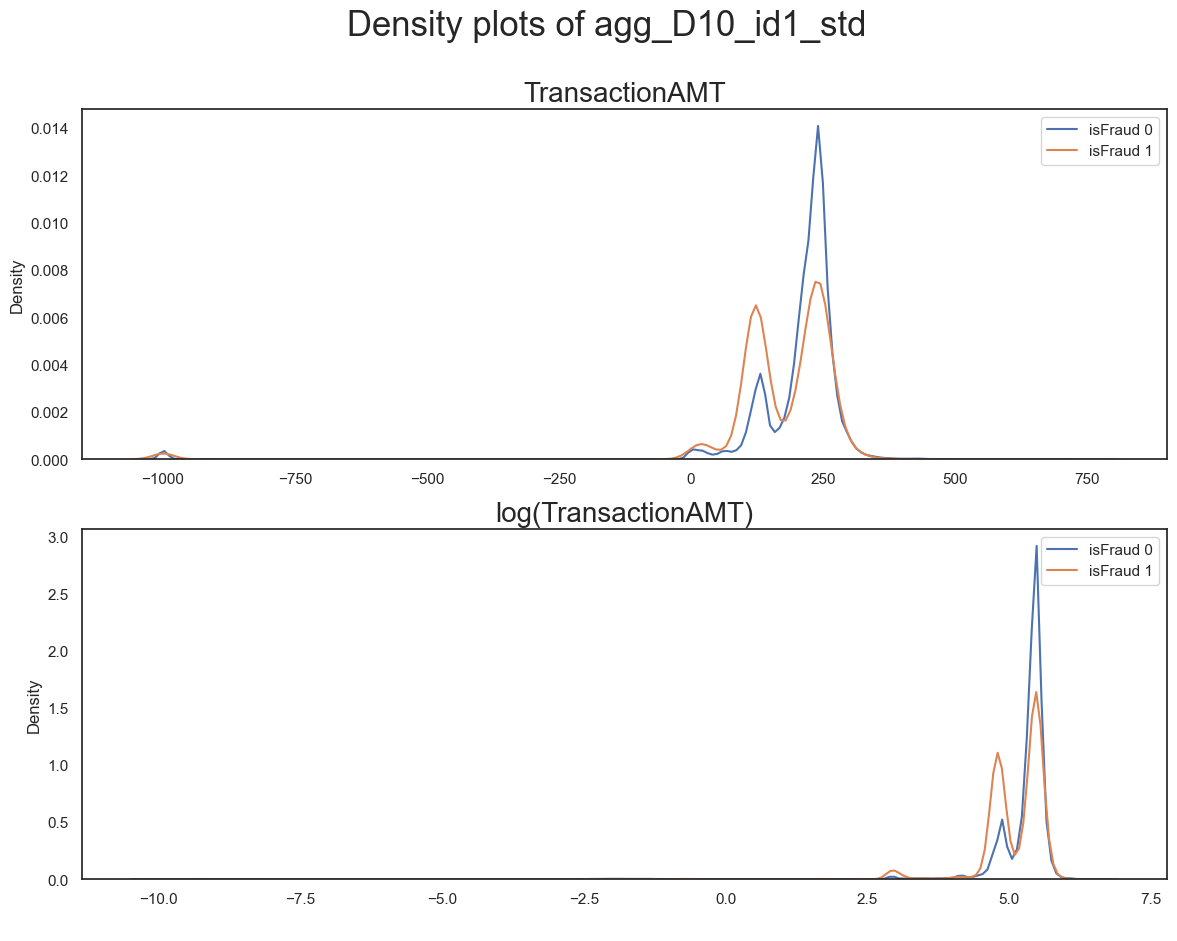

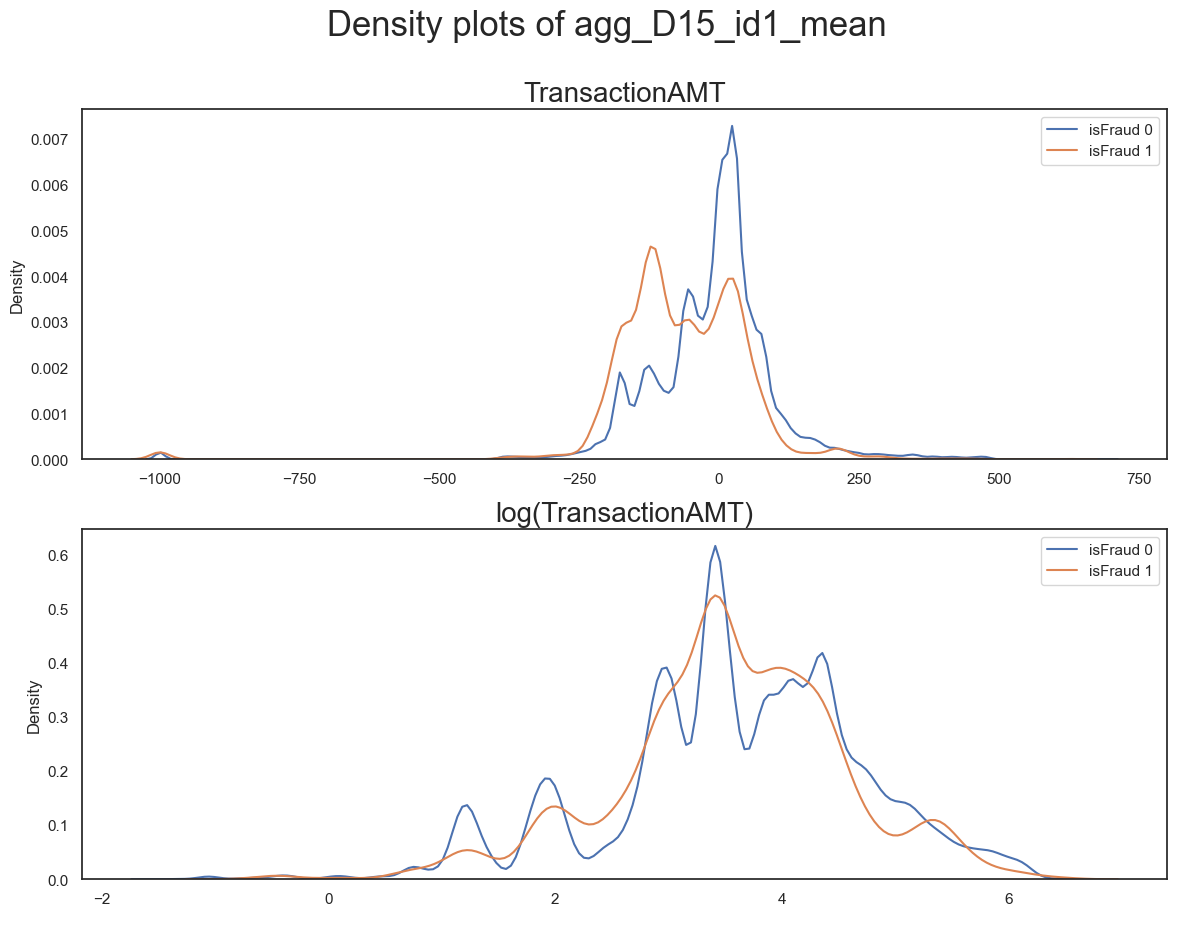

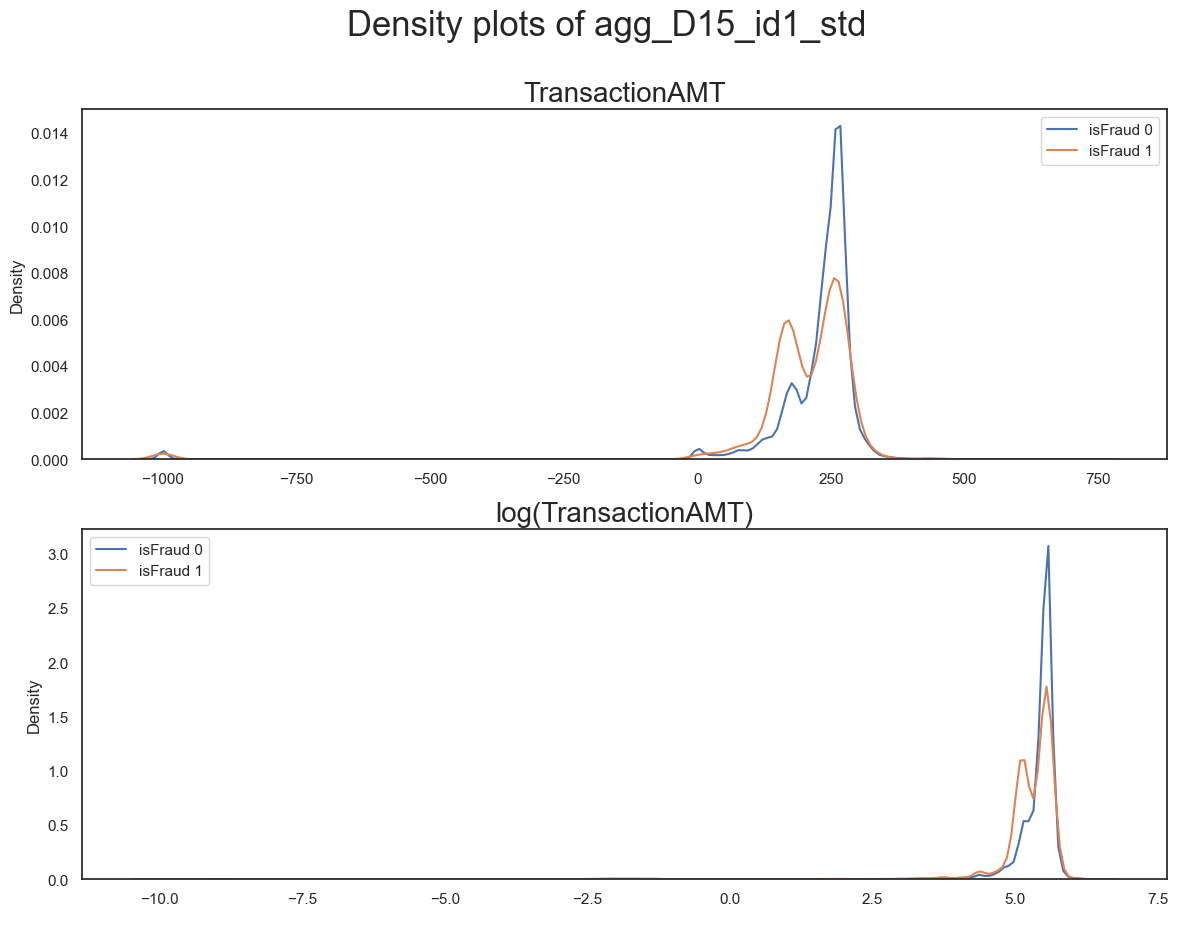

In [ ]:
for col in aggregate_id(['TransactionAmt','C4','C10','D10','D15'],['id1'],['mean','std'], plot=True):
    density_plt_log(col)

The plots above are only a fraction of what may be generated using this aggregation method.<br>
And what is most important is that they all seem to be useful in our model!

There are plenty of aggregation options to be generated here.<br>
To avoid repetitions of similar columns a PCA dimension reduction method was used.<br>
Additionally previously aggregated C and D columns shall be deleted to avoid unnecessary repetitions.

In [ ]:
for df in [train_df, test_df]:
    df.drop(columns=list(df.filter(regex='agg_C|agg_D|log|mean|std').columns), inplace=True)

In [ ]:
def common_elements(a, b):
    a_set = set(a)
    b_set = set(b)
    
    lst = list(a_set & b_set) 
    return lst

In [ ]:
def PCA_aggregated_cols(col_type, train_df=train_df, test_df=test_df):

    x = common_elements(train_df.columns, [col_type+str(i) for i in range(len(train_df.columns))])
    if col_type!='TransactionAmt':
        aggregate_id([col_type+str(i) for i in range(1,len(x)+1)],ids_all,['mean', 'std'])
    else:
        aggregate_id(['TransactionAmt'],ids_all,['mean', 'std'])

    df_agg = pd.concat([train_df.filter(regex='agg_'+col_type), test_df.filter(regex='agg_'+col_type)])

    for df in [train_df, test_df]:
        df.drop(columns=list(df.filter(regex='agg_'+col_type).columns), inplace=True)

    pca = PCA(n_components=int(df_agg.shape[1]/6))
    pca.fit(df_agg)
    pca_samples = pca.transform(df_agg)

    df_agg_temp = pd.DataFrame(pca_samples, index=df_agg.index)
    df_agg_temp.columns = ['agg_'+col_type+'_{}'.format(i) for i in range(int(df_agg.shape[1]/6))]

    return df_agg_temp

In [ ]:
agg_df_C = PCA_aggregated_cols('C')

New column names:
'agg_C1_id1_mean' , 'agg_C1_id1_std' , 'agg_C1_id2_mean' , 'agg_C1_id2_std' , 'agg_C1_id3_mean' , 'agg_C1_id3_std' , 'agg_C1_id4_mean' , 'agg_C1_id4_std' , 'agg_C1_id5_mean' , 'agg_C1_id5_std' , 'agg_C1_bank_type_mean' , 'agg_C1_bank_type_std' , 'agg_C2_id1_mean' , 'agg_C2_id1_std' , 'agg_C2_id2_mean' , 'agg_C2_id2_std' , 'agg_C2_id3_mean' , 'agg_C2_id3_std' , 'agg_C2_id4_mean' , 'agg_C2_id4_std' , 'agg_C2_id5_mean' , 'agg_C2_id5_std' , 'agg_C2_bank_type_mean' , 'agg_C2_bank_type_std' , 'agg_C3_id1_mean' , 'agg_C3_id1_std' , 'agg_C3_id2_mean' , 'agg_C3_id2_std' , 'agg_C3_id3_mean' , 'agg_C3_id3_std' , 'agg_C3_id4_mean' , 'agg_C3_id4_std' , 'agg_C3_id5_mean' , 'agg_C3_id5_std' , 'agg_C3_bank_type_mean' , 'agg_C3_bank_type_std' , 'agg_C4_id1_mean' , 'agg_C4_id1_std' , 'agg_C4_id2_mean' , 'agg_C4_id2_std' , 'agg_C4_id3_mean' , 'agg_C4_id3_std' , 'agg_C4_id4_mean' , 'agg_C4_id4_std' , 'agg_C4_id5_mean' , 'agg_C4_id5_std' , 'agg_C4_bank_type_mean' , 'agg_C4_bank_type_std' 

In [ ]:
train_df = pd.merge(train_df, agg_df_C, how='left', left_index=True, right_index=True)
test_df = pd.merge(test_df, agg_df_C, how='left', left_index=True, right_index=True)

del agg_df_C

In [ ]:
agg_df_D = PCA_aggregated_cols('D')

New column names:
'agg_D1_id1_mean' , 'agg_D1_id1_std' , 'agg_D1_id2_mean' , 'agg_D1_id2_std' , 'agg_D1_id3_mean' , 'agg_D1_id3_std' , 'agg_D1_id4_mean' , 'agg_D1_id4_std' , 'agg_D1_id5_mean' , 'agg_D1_id5_std' , 'agg_D1_bank_type_mean' , 'agg_D1_bank_type_std' , 'agg_D2_id1_mean' , 'agg_D2_id1_std' , 'agg_D2_id2_mean' , 'agg_D2_id2_std' , 'agg_D2_id3_mean' , 'agg_D2_id3_std' , 'agg_D2_id4_mean' , 'agg_D2_id4_std' , 'agg_D2_id5_mean' , 'agg_D2_id5_std' , 'agg_D2_bank_type_mean' , 'agg_D2_bank_type_std' , 'agg_D3_id1_mean' , 'agg_D3_id1_std' , 'agg_D3_id2_mean' , 'agg_D3_id2_std' , 'agg_D3_id3_mean' , 'agg_D3_id3_std' , 'agg_D3_id4_mean' , 'agg_D3_id4_std' , 'agg_D3_id5_mean' , 'agg_D3_id5_std' , 'agg_D3_bank_type_mean' , 'agg_D3_bank_type_std' , 'agg_D4_id1_mean' , 'agg_D4_id1_std' , 'agg_D4_id2_mean' , 'agg_D4_id2_std' , 'agg_D4_id3_mean' , 'agg_D4_id3_std' , 'agg_D4_id4_mean' , 'agg_D4_id4_std' , 'agg_D4_id5_mean' , 'agg_D4_id5_std' , 'agg_D4_bank_type_mean' , 'agg_D4_bank_type_std' 

In [ ]:
train_df = pd.merge(train_df, agg_df_D, how='left', left_index=True, right_index=True)
test_df = pd.merge(test_df, agg_df_D, how='left', left_index=True, right_index=True)

del agg_df_D

In [ ]:
agg_df_TransactionAmt = PCA_aggregated_cols('TransactionAmt')

New column names:
'agg_TransactionAmt_id1_mean' , 'agg_TransactionAmt_id1_std' , 'agg_TransactionAmt_id2_mean' , 'agg_TransactionAmt_id2_std' , 'agg_TransactionAmt_id3_mean' , 'agg_TransactionAmt_id3_std' , 'agg_TransactionAmt_id4_mean' , 'agg_TransactionAmt_id4_std' , 'agg_TransactionAmt_id5_mean' , 'agg_TransactionAmt_id5_std' , 'agg_TransactionAmt_bank_type_mean' , 'agg_TransactionAmt_bank_type_std' , 

In [ ]:
train_df = pd.merge(train_df, agg_df_TransactionAmt, how='left', left_index=True, right_index=True)
test_df = pd.merge(test_df, agg_df_TransactionAmt, how='left', left_index=True, right_index=True)

del agg_df_TransactionAmt

## 8.2 Additional aggregations

Finally, I will use some additional aggregations, which occurred to be useful during the tests.

In [ ]:
def additional_aggregation(main_columns, uids, train_df=train_df, test_df=test_df):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [ ]:
additional_aggregation(['P_emaildomain','dist1','TransactionDTMonth','id_02','TransactionAmt_cents'], ['id1'])
additional_aggregation(['C13','V314'], ['id1'])
additional_aggregation(['V127','V136','V309','V307','V320'], ['id1'])

id1_P_emaildomain_ct, id1_dist1_ct, id1_TransactionDTMonth_ct, id1_id_02_ct, id1_TransactionAmt_cents_ct, id1_C13_ct, id1_V314_ct, id1_V127_ct, id1_V136_ct, id1_V309_ct, id1_V307_ct, id1_V320_ct, 

## 8.3 Number of NaN's per row

Feature, which may bring some help is the number of nulls per row. Many features come in pairs or bigger groups. <br>
So there is a chance of a spike of transactions for a certain number of nulls in a row.

In [ ]:
train_df['n_NaN'] = train_df.isnull().sum(axis=1)
test_df['n_NaN'] = test_df.isnull().sum(axis=1)

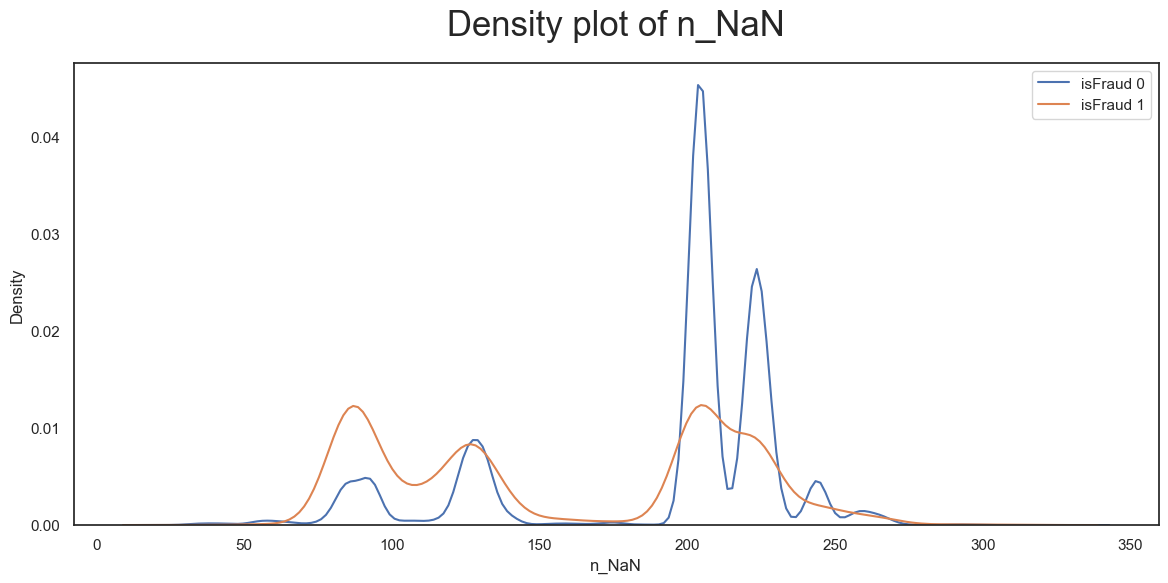

In [ ]:
density_plt(col='n_NaN', df=train_df)

It is a success. We may observe that for certain values of nulls per column, there are spikes of fraud or non-fraud transactions.

# 9. Conclusions for Data Analysys

1. We need to deal with a class imbalance problem with a fraud ratio much lower than the non-fraud ratio
2. The dataset contains many missing values
3. A basic understanding of given variables helps in feature engineering
4. Some of the features need to be transformed to better play their role in modeling
5. There is great power in aggregation. Plenty of new columns could be generated by aggregation based on categorical variables
6. Undersampling could be useful by deleting non-fraud transactions similar to those left in the dataset
7. In this document 129 new columns were added despite using the PCA dimension reduction algorithm
8. Null values were replaced by -999 during encoding. other values (like -1) could be tried to check the model response
9. There is also a place for data relaxation - a technique based on getting rid of significant values, which appears in the train dataset much more often than in the test dataset. Or the opposite.

# 10. Exporting the data 

In [ ]:
# Label Encoding
for df in [train_df, test_df]:
    for f in df.columns:
        if df[f].dtype=='category': 
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[f].values)) 
            df[f] = lbl.transform(list(df[f].values))

    df = df.fillna(fill_nan)

In [ ]:
train_df.to_pickle('train_nan('+str(fill_nan)+').pkl')
test_df.to_pickle('test_nan('+str(fill_nan)+').pkl')

Link for the next notebook: [CV](https://drive.google.com/file/d/10iux2mGq0aV49RCueW32Jsa4Q0PtwGQT/view?usp=share_link)